<a href="https://colab.research.google.com/github/tecexbarto/Emotions_project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORTACIONES Y SUBIDAS DE ARCHIVOS

## 1.1. Importación de librerías de Procesamiento de Datos


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emocion.json to emocion.json
Saving id_visitante-atracciones.json to id_visitante-atracciones.json
Saving id_visitante-duracion.json to id_visitante-duracion.json
Saving id_visitante-procedencia.json to id_visitante-procedencia.json
Saving id_visitante-ticket.json to id_visitante-ticket.json
Saving valoraciones.json to valoraciones.json


In [ ]:
import pandas as pd
import numpy as np
import json

## 1.2. Carga de Archivos


###ID VISITANTE ATRACCIONES

In [ ]:
#Nombre del archivo json con el que se trabajará
file_path = 'id_visitante-atracciones.json'

#Abrimos el archivo para leerlo y conseguir que se cierre adecuadamente con la función with
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

In [ ]:
#Creamos una estructura para poder insertar los json
json_atraccion = {"id_visitante": [], "t_id": [], "atraccion": [], "comienzo_atraccion": [], "tiempo_espera": []}

#Recorremos el json
for key, values in data.items():
    for item in values:
        json_atraccion["id_visitante"].append(key)
        json_atraccion["t_id"].append(item["t_id"])
        json_atraccion["atraccion"].append(item["atraccion"])
        json_atraccion["comienzo_atraccion"].append(item["comienzo_atraccion"])
        json_atraccion["tiempo_espera"].append(item["tiempo_de_espera"])

#Convertimos a dataframe nuestra estructura creada anteriormente
df_atraccion = pd.DataFrame(json_atraccion)

####Comprensión de la estructura de los datos

In [ ]:
df_atraccion.columns

Index(['id_visitante', 't_id', 'atraccion', 'comienzo_atraccion',
       'tiempo_espera'],
      dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| Id_visitante   | Identificador del visitante
| T_id   | Identificador de la fotografia  
| Atraccion   | Nombre de la atracción   |
| Comienzo_atraccion   | Horas que transcurren desde las 7:00 del 1/9/22 al momento en el que el visitante se sube a la atracción   |
| Tiempo_de_espera  | Tiempo en minutos que el visitante ha estado esperando para subirse a la atracción.   |

In [ ]:
df_atraccion.shape

(35887, 5)

In [ ]:
# Primeros registros
df_atraccion.head(100)

id_visitante                   t_id                atraccion  \
0             3  Training_10118481.jpg  Montaña Rusa de la Luna   
1             3  Training_15361067.jpg        Mansión Embrujada   
2             3  Training_16232328.jpg    Simulador Espacial 3D   
3             3  Training_27705571.jpg     Fiesta de los Dulces   
4             3  Training_63766171.jpg         Gran Caída Libre   
..          ...                    ...                      ...   
95            5  Training_36557536.jpg    Caravana de Aventuras   
96            5  Training_36725406.jpg      Laberinto de Sueños   
97            5  Training_41454428.jpg             Vuelo Mágico   
98            5  Training_69898122.jpg    Simulador Espacial 3D   
99            5   Training_9925349.jpg     Fiesta de los Dulces   

    comienzo_atraccion  tiempo_espera  
0                291.0              5  
1                180.0             11  
2                384.0             19  
3                625.0              9  
4                613.0             17  
..                 ...            ...  
95               535.0             18  
96               629.0             19  
97               395.0             15  
98               122.0             12  
99               709.0             15  

[100 rows x 5 columns]

In [ ]:
# Últimos registros
df_atraccion.tail(10)

id_visitante                      t_id                atraccion  \
35877         1779   PublicTest_87959338.jpg      Laberinto de Sueños   
35878         1780  PrivateTest_90663142.jpg          Araña Saltarina   
35879         1780   PublicTest_72207843.jpg             Vuelo Mágico   
35880         1781  PrivateTest_97342741.jpg  Mundo de las Maravillas   
35881         1782   PublicTest_20677546.jpg      Jardín de las Hadas   
35882         1783    PublicTest_2529039.jpg    Espejos de la Risueña   
35883         1784   PublicTest_27916929.jpg        Rápido del Trueno   
35884         1785   PublicTest_64107181.jpg       Carrusel Encantado   
35885         1786   PublicTest_81098275.jpg        Mansión Embrujada   
35886         1787   PublicTest_94828377.jpg                     None   

       comienzo_atraccion  tiempo_espera  
35877               613.0              3  
35878               527.0              9  
35879               430.0             16  
35880               619.0             12  
35881                71.0             13  
35882               421.0             18  
35883               185.0             18  
35884               106.0             16  
35885               679.0             16  
35886               417.0             13

In [ ]:
# Registros aleatorios
df_atraccion.sample(10)

id_visitante                     t_id            atraccion  \
26972          940    Training_33864091.jpg       Dragón Volador   
1182            37    Training_26680542.jpg      Araña Saltarina   
15641          471    Training_45823592.jpg  Rueda de la Fortuna   
8436           246    Training_20519586.jpg  Torbellino Espacial   
35653         1683  PublicTest_85599431.jpg       Safari Salvaje   
9333           272    Training_70260928.jpg      Araña Saltarina   
7901           231    Training_39549147.jpg  Laberinto de Sueños   
216              9    Training_81438547.jpg  Torbellino Espacial   
3642           106    Training_18588770.jpg  Aventuras Acuáticas   
14347          428    Training_30986342.jpg   Carrusel Encantado   

       comienzo_atraccion  tiempo_espera  
26972                30.0              3  
1182                661.0              4  
15641               198.0              9  
8436                440.0             16  
35653               403.0             20  
9333                220.0              6  
7901                540.0             11  
216                 629.0             16  
3642                519.0              9  
14347               254.0             13

In [ ]:
df_atraccion.dtypes

id_visitante           object
t_id                   object
atraccion              object
comienzo_atraccion    float64
tiempo_espera           int64
dtype: object

In [ ]:
df_atraccion.shape

(35887, 5)

In [ ]:
df_atraccion.nunique()

id_visitante           1787
t_id                  35885
atraccion                35
comienzo_atraccion      719
tiempo_espera            32
dtype: int64

In [ ]:
#Como la columna 'comienzo_atraccion' está definida como float y se desea que sea de tipo entero, procedemos a cambiar el tipo de dato
df_atraccion["comienzo_atraccion"] = pd.to_numeric(df_atraccion["comienzo_atraccion"], errors='coerce').astype('Int64')

In [ ]:
df_atraccion.dtypes

id_visitante          object
t_id                  object
atraccion             object
comienzo_atraccion     Int64
tiempo_espera          int64
dtype: object

####Limpieza de datos

#####Valores Negativos

In [ ]:
df_atraccion.describe()

comienzo_atraccion  tiempo_espera
count             35791.0   35887.000000
mean           358.423989      12.498036
std            207.869165       4.014144
min                  -1.0      -3.000000
25%                 179.0      10.000000
50%                 357.0      12.000000
75%                 538.0      15.000000
max                 719.0      28.000000

Al analizar los datos de atracción, se observa una similitud entre la media y la mediana tanto en el inicio de la atracción como en el tiempo de espera. Esta consistencia podría sugerir una distribución normal, respaldada por el hecho de que la desviación estándar está por debajo de la media, indicando una posible baja dispersión de los datos.

Un aspecto llamativo es la presencia de valores negativos tanto en el inicio de la atracción como en el tiempo de espera. Estos valores no tienen sentido en el contexto temporal y podrían deberse a errores en la recopilación de datos o a interpretaciones incorrectas. Por lo que en este caso, vamos a proceder a la eliminación de estos datos para que no interfieran en nuestro análisis.

In [ ]:
df_atraccion_limpio = df_atraccion.copy()

In [ ]:
df_atraccion_limpio.drop(df_atraccion_limpio[(df_atraccion_limpio["comienzo_atraccion"] < 0)].index, axis = 0, inplace = True)

In [ ]:
df_atraccion_limpio.drop(df_atraccion_limpio[(df_atraccion_limpio["tiempo_espera"] < 0)].index, axis = 0, inplace = True)

In [ ]:
df_atraccion_limpio.describe()

comienzo_atraccion  tiempo_espera
count             35659.0   35755.000000
mean           359.575254      12.504153
std            207.188697       4.005562
min                   2.0       0.000000
25%                 181.0      10.000000
50%                 359.0      12.000000
75%                 538.0      15.000000
max                 719.0      28.000000

In [ ]:
df_atraccion_limpio.shape

(35755, 5)

#####Valores Erróneos

El cliente, Pontia World indica en el dossier que no podía haber ninguna atracción en la que se subieran más de 500 personas en una hora, por lo que vamos a comprobar si se da este escenario en cualquiera de las atracciones. Para ello, creamos una columna que indica, para cada fila, cuántas veces aparece el mismo valor en la columna t_id dentro del grupo definido por las columnas 'atraccion' y 'comienzo_atraccion'.

In [ ]:
df_atraccion_incorrectos = df_atraccion_limpio.copy()
df_atraccion_incorrectos["ConteoPersonas"] = df_atraccion_limpio.groupby(["atraccion", "comienzo_atraccion"])["t_id"].transform("count")
df_atraccion_incorrectos = df_atraccion_incorrectos[df_atraccion_incorrectos["ConteoPersonas"] > 500]
df_atraccion_incorrectos.reset_index(drop=True, inplace=True)
df_atraccion_incorrectos.head(2)

Empty DataFrame
Columns: [id_visitante, t_id, atraccion, comienzo_atraccion, tiempo_espera, ConteoPersonas]
Index: []

In [ ]:
df_atraccion_incorrectos.shape

(0, 6)

#####Valores Nulos

In [ ]:
nulos_atraccion = df_atraccion_limpio.isnull().sum()
print(nulos_atraccion)

id_visitante             0
t_id                     0
atraccion             1136
comienzo_atraccion      96
tiempo_espera            0
dtype: int64


Por el momento, hemos decidido mantener los nulos de este dataset ya que esperamos que no nos limite a la hora de hacer nuestro análisis.

#####Duplicidad de t_id

En el apartado de comprensión de la estructura de datos pudimos observar que en la columna t_id existen valores duplicados. Es algo que debemos de solucionar, ya que en ese campo no puede haber valores duplicados puesto que es nuestro identificador único

In [ ]:
print(df_atraccion_limpio.shape)
print(df_atraccion_limpio["t_id"].nunique())

(35755, 5)
35753


In [ ]:
#procedemos a identificar los valores t_id duplicados, y los registros en los que aparecen
duplicados_atraccion = df_atraccion_limpio.duplicated(subset=['t_id'], keep=False)
filas_duplicadas_atraccion = df_atraccion_limpio[duplicados_atraccion]
filas_duplicadas_atraccion

id_visitante                   t_id                   atraccion  \
2484            74   Training_8475486.jpg      Carrera de Autos Locos   
15577          469  Training_52789098.jpg         Aventuras Acuáticas   
16312          495   Training_8475486.jpg             Araña Saltarina   
21163          675  Training_52789098.jpg  Carros Chocones Divertidos   

       comienzo_atraccion  tiempo_espera  
2484                  529             11  
15577                 478             16  
16312                 432              7  
21163                 386             12

In [ ]:
#como se trata únicamente de cuatro registros, optamos por eliminarlos
df_atraccion_limpio.drop(df_atraccion_limpio[(df_atraccion_limpio['t_id'] == 'Training_8475486.jpg') | (df_atraccion_limpio['t_id'] == 'Training_52789098.jpg')].index, inplace=True)

In [ ]:
#comprobamos ahora que ya coincide el número de filas con el número de t_id
print(df_atraccion_limpio.shape)
print(df_atraccion_limpio["t_id"].nunique())

(35751, 5)
35751


####Valores atípicos

Comprobamos si existen valores outliers en las columnas numéricas de este dataframe

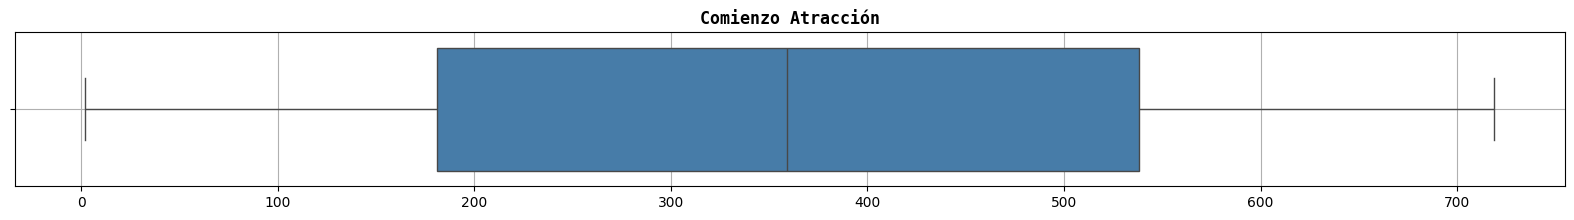

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
sns.boxplot(data=df_atraccion_limpio, x="comienzo_atraccion", color="#377eb8")
plt.title('Comienzo Atracción', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

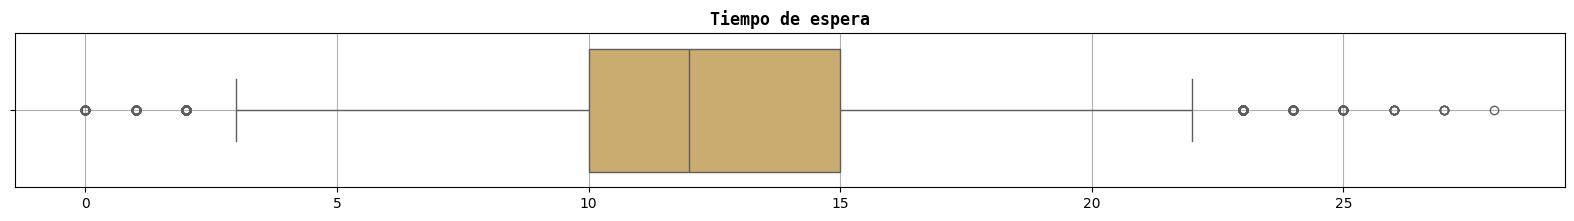

In [ ]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_atraccion_limpio, x="tiempo_espera", color="#d9b061")
plt.title('Tiempo de espera', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

Confirmamos que para el campo tiempo de espera, sí existen valores atípicos tanto inferiores como superiores. No obstante, predominan estos últimos

###ID VISITANTE DURACION

In [ ]:
#Nombre del archivo json con el que se trabajará
archivo = 'id_visitante-duracion.json'

#Abrimos el archivo para leerlo y conseguir que se cierre adecuadamente con la función with
with open(archivo, 'r') as archivo_json:
    json_borrador_duracion = json.load(archivo_json)

In [ ]:
#Creamos una estructura para poder insertar los json
json_duracion = {"id_visitante": [], "t_id": [], "duracion": []}

#Recorremos el json
for key, values in json_borrador_duracion.items():
    for item in values:
        json_duracion["id_visitante"].append(key)
        json_duracion["t_id"].append(item["t_id"])
        json_duracion["duracion"].append(item["duracion"])


#Convertimos a dataframe nuestra estructura creada anteriormente
df_duracion = pd.DataFrame(json_duracion)

####Comprensión de la estructura de los datos

In [ ]:
df_duracion.columns

Index(['id_visitante', 't_id', 'duracion'], dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| Id_visitante   | Identificador del visitante
| T_id   | Identificador de la fotografia  
| Duracion   | Tiempo en minutos de su estancia en el parque temático.   |

In [ ]:
df_duracion.shape

(35887, 3)

In [ ]:
# Primeros registros
df_duracion.head(10)

id_visitante                   t_id  duracion
0            3  Training_10118481.jpg       308
1            3  Training_15361067.jpg       344
2            3  Training_16232328.jpg       161
3            3  Training_27705571.jpg       260
4            3  Training_63766171.jpg       169
5            3  Training_66555113.jpg       231
6            3  Training_81499267.jpg       240
7            3  Training_94007493.jpg       257
8            3  Training_12950225.jpg       570
9            3  Training_42955258.jpg       341

In [ ]:
# Últimos registros
df_duracion.tail(10)

id_visitante                      t_id  duracion
35877         1779   PublicTest_87959338.jpg       352
35878         1780  PrivateTest_90663142.jpg       143
35879         1780   PublicTest_72207843.jpg       364
35880         1781  PrivateTest_97342741.jpg       193
35881         1782   PublicTest_20677546.jpg       437
35882         1783    PublicTest_2529039.jpg       419
35883         1784   PublicTest_27916929.jpg       206
35884         1785   PublicTest_64107181.jpg       368
35885         1786   PublicTest_81098275.jpg       425
35886         1787   PublicTest_94828377.jpg       464

In [ ]:
# Registros aleatorios
df_duracion.sample(10)

id_visitante                      t_id  duracion
1221            38     Training_54210751.jpg       387
17032          521     Training_77575993.jpg       419
14743          442     Training_18936489.jpg       279
18440          572      Training_6815367.jpg       370
31328         1198   PublicTest_68274080.jpg       307
12032          354      Training_4324027.jpg       400
16592          506     Training_31094188.jpg       432
3840           111     Training_60731782.jpg       260
27143          949  PrivateTest_11365666.jpg       180
32040         1249     Training_55588867.jpg       438

In [ ]:
df_duracion.dtypes

id_visitante    object
t_id            object
duracion         int64
dtype: object

####Limpieza de datos

#####Valores Negativos

In [ ]:
df_duracion.describe()

duracion
count  35887.000000
mean     359.748934
std      100.122517
min      -39.000000
25%      292.000000
50%      359.000000
75%      428.000000
max      811.000000

Al examinar los datos de duración, se observa un patrón similar al de la atracción. La media (351.59) y la mediana (355) están cercanas entre sí, lo que sugiere una posible distribución normal. A pesar de que la desviación estándar (92.07) es relativamente alta, sigue siendo mucho menor que la media.

Sin embargo, es importante señalar que los valores extremos están ampliamente separados, con un mínimo de -39 y un máximo de 540. La presencia de valores negativos en la duración de una atracción carece de sentido y puede deberse a errores en la recopilación de datos. En este caso, procedemos a eliminar estos valores negativos, ya que distorsionan la interpretación de la duración de la atracción.

In [ ]:
df_duracion_limpio = df_duracion.copy()

In [ ]:
df_duracion_limpio.drop(df_duracion_limpio[(df_duracion_limpio["duracion"] < 0)].index, axis = 0, inplace = True)

In [ ]:
df_duracion_limpio.describe()

duracion
count  35886.000000
mean     359.760046
std      100.101782
min        1.000000
25%      292.000000
50%      359.000000
75%      428.000000
max      811.000000

In [ ]:
df_duracion_limpio.shape

(35886, 3)

#####Valores Erróneos

Dentro de los valores erróneos que el cliente indicó, resaltaba el hecho de que los visitantes podrían estar en el parque un máximo de nueve horas en el parque.

In [ ]:
df_duracion_incorrectos = df_duracion_limpio[df_duracion_limpio["duracion"] > (60*9)]
df_duracion_incorrectos.head(2)

id_visitante                   t_id  duracion
8             3  Training_12950225.jpg       570
21            3  Training_87355987.jpg       573

In [ ]:
df_duracion_incorrectos.shape

(1279, 3)

In [ ]:
df_duracion_limpio.drop(df_duracion_incorrectos.index, inplace = True)
df_duracion_limpio.head(2)

id_visitante                   t_id  duracion
0            3  Training_10118481.jpg       308
1            3  Training_15361067.jpg       344

#####Valores Nulos

In [ ]:
nulos_duracion = df_duracion_limpio.isnull().sum()
print(nulos_duracion)

id_visitante    0
t_id            0
duracion        0
dtype: int64


#####Duplicidad de t_id

En el apartado de comprensión de la estructura de datos pudimos observar que en la columna t_id existen valores duplicados. Es algo que debemos de solucionar, ya que en ese campo no puede haber valores duplicados puesto que se trata de nuestra variable única

In [ ]:
print(df_duracion_limpio.shape)
print(df_duracion_limpio["t_id"].nunique())

(34607, 3)
34605


In [ ]:
#procedemos a identificar los valores t_id duplicados, y los registros en los que aparecen
duplicados_duracion = df_duracion_limpio.duplicated(subset=['t_id'], keep=False)
filas_duplicadas_duracion = df_duracion_limpio[duplicados_duracion]
filas_duplicadas_duracion

id_visitante                   t_id  duracion
2484            74   Training_8475486.jpg       346
15577          469  Training_52789098.jpg       336
16312          495   Training_8475486.jpg       507
21163          675  Training_52789098.jpg       160

In [ ]:
#como se trata únicamente de cuatro registros, optamos por eliminarlos
df_duracion_limpio.drop(df_duracion_limpio[(df_duracion_limpio['t_id'] == 'Training_8475486.jpg') | (df_duracion_limpio['t_id'] == 'Training_52789098.jpg')].index, inplace=True)

In [ ]:
#comprobamos ahora que ya coincide el número de filas con el número de t_id
print(df_duracion_limpio.shape)
print(df_duracion_limpio["t_id"].nunique())

(34603, 3)
34603


####Valores atípicos

Comprobamos si existen valores outliers en la columna numérica de este dataframe

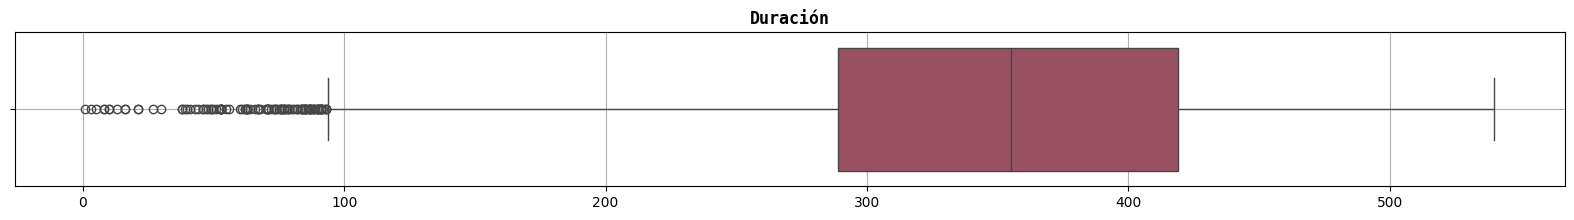

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
sns.boxplot(data=df_duracion_limpio, x="duracion", color="#a6445d")
plt.title('Duración', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

Podemos observar que sí existen valores atípicos en el campo de tiempo de espera, concretamente outliers inferiores

###ID VISITANTE PROCEDENCIA

In [ ]:
#Nombre del archivo json con el que se trabajará
archivo = 'id_visitante-procedencia.json'

#Abrimos el archivo para leerlo y conseguir que se cierre adecuadamente con la función with
with open(archivo, 'r') as archivo_json:
    json_borrador_procedencia = json.load(archivo_json)

In [ ]:
#Creamos una estructura para poder insertar los json
json_procedencia = {"id_visitante": [], "t_id": [], "procedencia": []}

#Recorremos el json
for key, valor in json_borrador_procedencia.items():
    for i in valor:
        json_procedencia["id_visitante"].append(key)
        json_procedencia["t_id"].append(i["t_id"])
        json_procedencia["procedencia"].append(i["procedencia"])


#Convertimos a dataframe nuestra estructura creada anteriormente
df_procedencia = pd.DataFrame(json_procedencia)

####Comprensión de la estructura de los datos

In [ ]:
df_procedencia.columns

Index(['id_visitante', 't_id', 'procedencia'], dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| Id_visitante   | Identificador del visitante
| T_id   | Identificador de la fotografia  
| Procedencia   | Procedencia del visitante   |

In [ ]:
df_procedencia.shape

(35887, 3)

In [ ]:
#podemos ver que parece haber un error en la recopilación de los datos en el campo de la procedencia, ya que no le encontramos sentido a que un mismo id visitante sea de tantas nacionalidades
df_procedencia.head(5)

id_visitante                   t_id  procedencia
0            3  Training_10118481.jpg    Filipinas
1            3  Training_15361067.jpg       España
2            3  Training_16232328.jpg  Puerto Rico
3            3  Training_27705571.jpg     Paraguay
4            3  Training_63766171.jpg    Argentina

In [ ]:
#a la hora de elegir la nacionalidad de cada id visitante, escogemos el criterio de la máxima frecuencia. Es decir, cada id visitante tendrá la nacionalidad que más se repita en sus regristros
df_procedencia["procedencia_nueva"]= df_procedencia.groupby('id_visitante')['procedencia'].transform(lambda x: x.mode()[0])
df_procedencia

id_visitante                     t_id  procedencia procedencia_nueva
0                3    Training_10118481.jpg    Filipinas            España
1                3    Training_15361067.jpg       España            España
2                3    Training_16232328.jpg  Puerto Rico            España
3                3    Training_27705571.jpg     Paraguay            España
4                3    Training_63766171.jpg    Argentina            España
...            ...                      ...          ...               ...
35882         1783   PublicTest_2529039.jpg       España            España
35883         1784  PublicTest_27916929.jpg    Filipinas         Filipinas
35884         1785  PublicTest_64107181.jpg     Alemania          Alemania
35885         1786  PublicTest_81098275.jpg    Filipinas         Filipinas
35886         1787  PublicTest_94828377.jpg      Francia           Francia

[35887 rows x 4 columns]

In [ ]:
#borramos la vieja columna de procedencia
df_procedencia.drop("procedencia", axis = 1, inplace = True)

In [ ]:
df_procedencia.rename(columns = {"procedencia_nueva" : "procedencia"}, inplace = True)

In [ ]:
df_procedencia_2 = df_procedencia.copy()
df_procedencia_2.drop(["t_id"], axis = 1, inplace = True)
#df_procedencia["porcentajes"] = df_procedencia["procedencia_nueva"].value_counts()/len(df_procedencia["procedencia_nueva"])
#df_procedencia

In [ ]:
df_procedencia_3 = df_procedencia_2.groupby("procedencia")["id_visitante"].count().reset_index()
df_procedencia_3.rename(columns = {"id_visitante": "recuento"}, inplace = True)

In [ ]:
df_procedencia_3

procedencia  recuento
0               Alemania       493
1              Argentina       335
2                Bolivia       167
3                 Brasil       213
4                 Canadá       141
5                  Chile       222
6                  China       244
7               Colombia       238
8             Costa Rica       170
9                   Cuba       179
10               Ecuador       158
11           El Salvador       128
12                España     32135
13        Estados Unidos        60
14             Filipinas        84
15               Francia        32
16             Guatemala        48
17     Guinea Ecuatorial        70
18         Guinea-Bissau        23
19                 Haití        27
20              Honduras        63
21                 India        48
22                Italia        12
23               Jamaica        46
24                México        98
25             Nicaragua        62
26                Panamá        82
27              Paraguay        57
28                  Perú        69
29           Puerto Rico        47
30  República Dominicana        45
31     Trinidad y Tobago        23
32               Uruguay        58
33             Venezuela        10

In [ ]:
# Primeros registros
df_procedencia.head(10)

id_visitante                   t_id procedencia
0            3  Training_10118481.jpg      España
1            3  Training_15361067.jpg      España
2            3  Training_16232328.jpg      España
3            3  Training_27705571.jpg      España
4            3  Training_63766171.jpg      España
5            3  Training_66555113.jpg      España
6            3  Training_81499267.jpg      España
7            3  Training_94007493.jpg      España
8            3  Training_12950225.jpg      España
9            3  Training_42955258.jpg      España

In [ ]:
# Últimos registros
df_procedencia.tail(10)

id_visitante                      t_id procedencia
35877         1779   PublicTest_87959338.jpg      España
35878         1780  PrivateTest_90663142.jpg      España
35879         1780   PublicTest_72207843.jpg      España
35880         1781  PrivateTest_97342741.jpg   Filipinas
35881         1782   PublicTest_20677546.jpg      España
35882         1783    PublicTest_2529039.jpg      España
35883         1784   PublicTest_27916929.jpg   Filipinas
35884         1785   PublicTest_64107181.jpg    Alemania
35885         1786   PublicTest_81098275.jpg   Filipinas
35886         1787   PublicTest_94828377.jpg     Francia

In [ ]:
# Registros aleatorios
df_procedencia.sample(10)

id_visitante                      t_id procedencia
31583         1214     Training_82124714.jpg   Nicaragua
17987          555     Training_34973037.jpg      España
15739          475     Training_71159478.jpg      España
32179         1258     Training_72405629.jpg      España
16275          494     Training_79842399.jpg      España
18088          559     Training_74637851.jpg      España
5538           160     Training_56096400.jpg      España
4429           129     Training_91731723.jpg      España
22020          710     Training_64468683.jpg      España
29283         1067  PrivateTest_83702219.jpg        Cuba

In [ ]:
df_procedencia.dtypes

id_visitante    object
t_id            object
procedencia     object
dtype: object

####Limpieza de datos

#####Valores Nulos

In [ ]:
nulos_procedencia = df_procedencia.isnull().sum()
print(nulos_procedencia)

id_visitante    0
t_id            0
procedencia     0
dtype: int64


In [ ]:
#Hacemos una copia del df para evitar modificar el original en caso de que sea necesario eliminar o agregar datos más adelante, preservando así la integridad del df original.
df_procedencia_limpio = df_procedencia.copy()

#####Duplicidad de t_id

En el apartado de comprensión de la estructura de datos pudimos observar que en la columna t_id existen valores duplicados. Es algo que debemos de solucionar, ya que en ese campo no puede haber valores duplicados


In [ ]:
print(df_procedencia_limpio.shape)
print(df_procedencia_limpio["t_id"].nunique())

(35887, 3)
35885


In [ ]:
##procedemos a identificar los valores t_id duplicados, y los registros en los que aparecen
duplicados_procedencia = df_procedencia_limpio.duplicated(subset=['t_id'], keep=False)
filas_duplicadas_procedencia = df_procedencia_limpio[duplicados_procedencia]
filas_duplicadas_procedencia

id_visitante                   t_id procedencia
2484            74   Training_8475486.jpg      España
15577          469  Training_52789098.jpg      España
16312          495   Training_8475486.jpg      España
21163          675  Training_52789098.jpg      España

In [ ]:
#como se trata únicamente de cuatro registros, optamos por eliminarlos
df_procedencia_limpio.drop(df_procedencia_limpio[(df_procedencia_limpio['t_id'] == 'Training_8475486.jpg') | (df_procedencia_limpio['t_id'] == 'Training_52789098.jpg')].index, inplace=True)

In [ ]:
#comprobamos ahora que ya coincide el número de filas con el número de t_id
print(df_procedencia_limpio.shape)
print(df_procedencia_limpio["t_id"].nunique())

(35883, 3)
35883


###ID VISITANTE TICKET

In [ ]:
#Nombre del archivo json con el que se trabajará
archivo = 'id_visitante-ticket.json'

#Abrimos el archivo para leerlo y conseguir que se cierre adecuadamente con la función with
with open(archivo, 'r') as archivo_json:
    json_borrador_ticket = json.load(archivo_json)

In [ ]:
#Creamos una estructura para poder insertar los json
json_ticket = {"id_visitante":[], "t_id": [], "tipo_entrada": [], "coste": [], "antelacion_compra": []}

#Recorremos el json
for key, valor in json_borrador_ticket.items():
    for i in valor:
        json_ticket["id_visitante"].append(key)
        json_ticket["t_id"].append(i["t_id"])
        json_ticket["tipo_entrada"].append(i["tipo_entrada"])
        json_ticket["coste"].append(i["coste"])
        json_ticket["antelacion_compra"].append(i["antelacion_de_compra"])

#Convertimos a dataframe nuestra estructura creada anteriormente
df_ticket = pd.DataFrame(json_ticket)

####Comprensión de la estructura de los datos

In [ ]:
df_ticket.columns

Index(['id_visitante', 't_id', 'tipo_entrada', 'coste', 'antelacion_compra'], dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| Id_visitante   | Identificador del visitante
| T_id   | Identificador de la fotografia  
| Tipo_de_entrada   | Tipo de la entrada comprada (familiar, individual, fast-pass, etc)   |
| Coste   | Coste de la entrada adquirida  |
| Antelacion_de_compra  | Numero de dias de antelacion con la que se compraron las entradas. Si el valor es 0 indica que la entrada se compro en taquilla  |

In [ ]:
df_ticket.shape

(35887, 5)

In [ ]:
# Primeros registros
df_ticket.head(10)

id_visitante                   t_id      tipo_entrada      coste  \
0            3  Training_10118481.jpg        Pase Anual  14.003708   
1            3  Training_15361067.jpg  Entrada Familiar  20.900902   
2            3  Training_16232328.jpg  Entrada Infantil  12.638039   
3            3  Training_27705571.jpg       Paquete VIP  18.491775   
4            3  Training_63766171.jpg  Entrada Familiar  18.233458   
5            3  Training_66555113.jpg  Entrada Infantil  19.404800   
6            3  Training_81499267.jpg        Pase Anual  27.838384   
7            3  Training_94007493.jpg  Entrada Infantil  20.054743   
8            3  Training_12950225.jpg        Pase Anual  25.969352   
9            3  Training_42955258.jpg       Pase Rápido  11.373024   

   antelacion_compra  
0                  0  
1                  2  
2                218  
3                 39  
4                135  
5                 75  
6                198  
7                273  
8                357  
9                 72

In [ ]:
# Últimos registros
df_ticket.tail(10)

id_visitante                      t_id        tipo_entrada      coste  \
35877         1779   PublicTest_87959338.jpg         Paquete VIP   9.425742   
35878         1780  PrivateTest_90663142.jpg    Entrada Familiar  11.089939   
35879         1780   PublicTest_72207843.jpg  Entrada Individual  21.892294   
35880         1781  PrivateTest_97342741.jpg         Pase Rápido  16.962235   
35881         1782   PublicTest_20677546.jpg          Pase Anual  17.398909   
35882         1783    PublicTest_2529039.jpg  Entrada Individual  18.443278   
35883         1784   PublicTest_27916929.jpg  Entrada Individual  11.500348   
35884         1785   PublicTest_64107181.jpg  Entrada Individual  13.871069   
35885         1786   PublicTest_81098275.jpg    Entrada Familiar  16.697862   
35886         1787   PublicTest_94828377.jpg         Paquete VIP  21.836315   

       antelacion_compra  
35877                177  
35878                 24  
35879                 97  
35880                196  
35881                112  
35882                265  
35883                 42  
35884                  0  
35885                 23  
35886                208

In [ ]:
# Registros aleatorios
df_ticket.sample(10)

id_visitante                      t_id        tipo_entrada      coste  \
12268          361     Training_79451002.jpg          Pase Anual  19.593056   
2393            71  PrivateTest_79776183.jpg  Entrada Individual  20.339081   
3721           108     Training_87181860.jpg  Entrada Individual  19.418679   
18143          561     Training_92481366.jpg         Pase Rápido  15.416514   
26170          898  PrivateTest_80596336.jpg    Entrada Infantil  16.717158   
13854          412     Training_37445659.jpg          Pase Anual  16.865120   
24946          838      Training_3711128.jpg         Pase Rápido  13.892018   
17644          542     Training_54325429.jpg    Entrada Infantil  14.124919   
24219          806     Training_45521963.jpg          Pase Anual  18.359115   
35822         1745  PrivateTest_35859907.jpg    Entrada Familiar  21.213624   

       antelacion_compra  
12268                 59  
2393                 280  
3721                   0  
18143                  0  
26170                135  
13854                  0  
24946                 36  
17644                  0  
24219                 88  
35822                270

In [ ]:
df_ticket.dtypes

id_visitante          object
t_id                  object
tipo_entrada          object
coste                float64
antelacion_compra      int64
dtype: object

In [ ]:
df_ticket.sample(5)

id_visitante                     t_id      tipo_entrada      coste  \
17582          540    Training_18018852.jpg  Entrada Familiar  16.500743   
34949         1551  PublicTest_98770281.jpg  Entrada Familiar  24.231972   
23090          756  PublicTest_63413374.jpg       Paquete VIP  22.741880   
34798         1531    Training_52277832.jpg  Entrada Infantil  10.589334   
13680          407    Training_47869727.jpg  Entrada Infantil  13.586027   

       antelacion_compra  
17582                 63  
34949                  0  
23090                335  
34798                 54  
13680                  2

####Limpieza de datos

#####Valores Negativos

In [ ]:
df_ticket.describe()

coste  antelacion_compra
count  35887.000000       35887.000000
mean      16.982639         118.791094
std        4.975322         121.386544
min       -2.255834           0.000000
25%       13.606043           0.000000
50%       17.003763          85.000000
75%       20.338335         225.000000
max       39.326885         364.000000

El costo promedio de un ticket es de aproximadamente 16.98, con una standard deviation de 4.97. La dispersión de los datos es relativamente baja, sugiriendo una consistencia en los costos. Además, se observa un valor mínimo negativo de -2.26 para el costo de un ticket, lo cual es inusual y probablemente sea un error en la recopilación de datos.

En cuanto a la antelación promedio de compra es de aproximadamente 118.79 días, con una desviación estándar de 121.38 días. La alta desviación estándar sugiere una variabilidad significativa en los períodos de antelación.

Para este caso, corregimos el valor negativo en el costo de los tickets (-2.26) para mantener la integridad de los datos.

In [ ]:
df_ticket_limpio = df_ticket.copy()

In [ ]:
df_ticket_limpio.drop(df_ticket_limpio[(df_ticket_limpio["coste"] < 0)].index, axis = 0, inplace = True)

In [ ]:
df_ticket_limpio.head(2)

id_visitante                   t_id      tipo_entrada      coste  \
0            3  Training_10118481.jpg        Pase Anual  14.003708   
1            3  Training_15361067.jpg  Entrada Familiar  20.900902   

   antelacion_compra  
0                  0  
1                  2

In [ ]:
df_ticket_limpio.describe()

coste  antelacion_compra
count  35874.000000        35874.00000
mean      16.989147          118.80897
std        4.964447          121.39316
min        0.154042            0.00000
25%       13.610500            0.00000
50%       17.005271           85.00000
75%       20.339482          225.00000
max       39.326885          364.00000

In [ ]:
df_ticket_limpio.shape

(35874, 5)

#####Valores Erróneos

Pontia World nos ha indicado que las entradas fast-pass se venden como máximo con 3 días de antelación, guardamos en una variable las entradas fast pass con una antelacion de la compra superior a 3 dias para poder eliminar los datos erróneos de forma correcta

In [ ]:
df_ticket_incorrectos = (df_ticket_limpio[(df_ticket_limpio["tipo_entrada"] == "Pase Rápido") & (df_ticket_limpio["antelacion_compra"] > 3)]).reset_index()
df_ticket_incorrectos.drop("index", axis=1, inplace=True)
df_ticket_incorrectos.head(2)

id_visitante                   t_id tipo_entrada      coste  \
0            3  Training_42955258.jpg  Pase Rápido  11.373024   
1            3  Training_83065372.jpg  Pase Rápido  11.643215   

   antelacion_compra  
0                 72  
1                 12

In [ ]:
df_ticket_incorrectos.shape

(3780, 5)

In [ ]:
df_ticket_limpio.shape

(35874, 5)

In [ ]:
#df_ticket_limpio.drop(df_ticket_incorrectos.index, inplace = True)

df_ticket_limpio.drop(df_ticket_limpio[(df_ticket_limpio["tipo_entrada"] == "Pase Rápido") & (df_ticket_limpio["antelacion_compra"] > 3)].index, axis = 0, inplace = True)
df_ticket_limpio.head(2)

id_visitante                   t_id      tipo_entrada      coste  \
0            3  Training_10118481.jpg        Pase Anual  14.003708   
1            3  Training_15361067.jpg  Entrada Familiar  20.900902   

   antelacion_compra  
0                  0  
1                  2

In [ ]:
df_ticket_limpio.shape

(32094, 5)

#####Valores Nulos

In [ ]:
nulos_ticket= df_ticket_limpio.isnull().sum()
print(nulos_ticket)

id_visitante         0
t_id                 0
tipo_entrada         0
coste                0
antelacion_compra    0
dtype: int64


#####Duplicidad de t_id

En el apartado de comprensión de la estructura de datos pudimos observar que en la columna t_id existen valores duplicados. Es algo que debemos de solucionar, ya que en ese campo no puede haber valores duplicados


In [ ]:
print(df_ticket_limpio.shape)
print(df_ticket_limpio["t_id"].nunique())

(32094, 5)
32092


In [ ]:
#procedemos a identificar los valores t_id duplicados, y los registros en los que aparecen
duplicados_ticket = df_ticket_limpio.duplicated(subset=['t_id'], keep=False)
filas_duplicadas_ticket = df_ticket_limpio[duplicados_ticket]
filas_duplicadas_ticket

id_visitante                   t_id        tipo_entrada      coste  \
2484            74   Training_8475486.jpg          Pase Anual  14.161830   
15577          469  Training_52789098.jpg    Entrada Infantil  14.762603   
16312          495   Training_8475486.jpg  Entrada Individual  18.737504   
21163          675  Training_52789098.jpg         Paquete VIP  21.153139   

       antelacion_compra  
2484                 230  
15577                 13  
16312                  0  
21163                  0

In [ ]:
#como se trata únicamente de cuatro registros, optamos por eliminarlos
df_ticket_limpio.drop(df_ticket_limpio[(df_ticket_limpio['t_id'] == 'Training_8475486.jpg') | (df_ticket_limpio['t_id'] == 'Training_52789098.jpg')].index, inplace=True)

In [ ]:
#comprobamos ahora que ya coincide el número de filas con el número de t_id
print(df_ticket_limpio.shape)
print(df_ticket_limpio["t_id"].nunique())

(32090, 5)
32090


####Valores atípicos

Comprobamos si existen valores outliers en las columnas numéricas de este dataframe

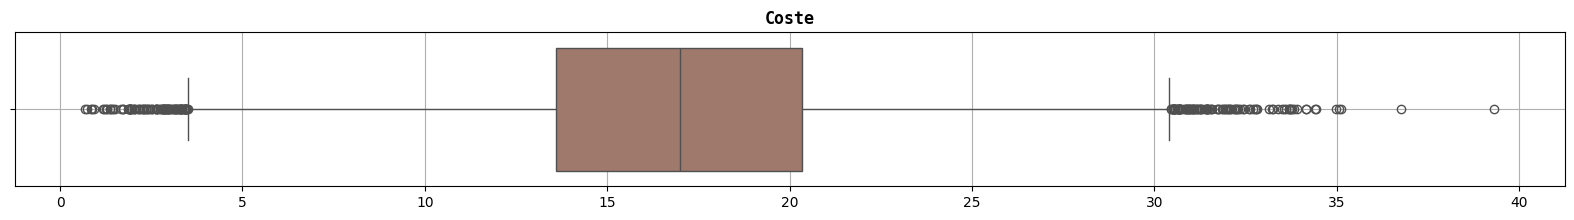

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
sns.boxplot(data=df_ticket_limpio, x="coste", color="#a67564")
plt.title('Coste', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

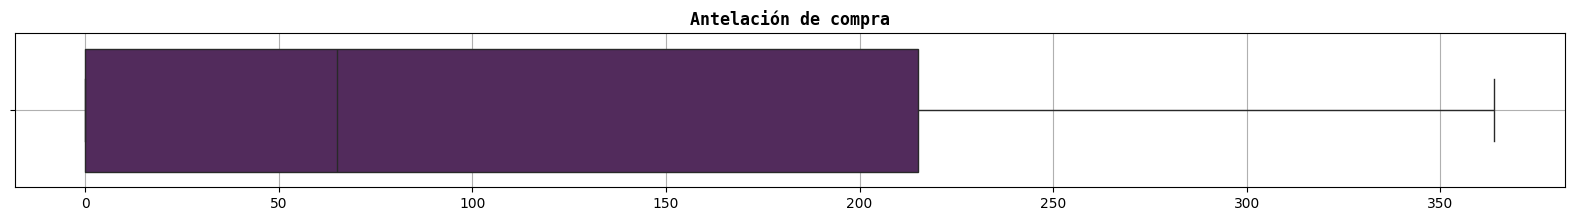

In [ ]:
plt.figure(figsize=(20, 2))
sns.boxplot(data=df_ticket_limpio, x="antelacion_compra", color="#572364")
plt.title('Antelación de compra', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

Podemos observar que sí existen valores atípicos en el campo de coste, tanto inferiores como superiores

###VALORACIONES

In [ ]:
#Nombre del archivo json con el que se trabajará
archivo = 'valoraciones.json'

#Abrimos el archivo para leerlo y conseguir que se cierre adecuadamente con la función with
with open(archivo, 'r') as archivo_json:
    json_borrador_valoraciones = json.load(archivo_json)

In [ ]:
#Creamos una estructura para poder insertar los json
json_valoraciones = {"t_id": [], "valoracion": []}

#Recorremos el json
for key, valor in json_borrador_valoraciones.items():
      json_valoraciones["t_id"].append(key)
      json_valoraciones["valoracion"].append(valor)


#Convertimos a dataframe nuestra estructura creada anteriormente
df_valoracion = pd.DataFrame(json_valoraciones)

####Comprensión de la estructura de los datos

In [ ]:
df_valoracion.columns

Index(['t_id', 'valoracion'], dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| T_id   | Identificador de la fotografia  
| Valoracion   | Puntuacion que el visitante le ha dado a la atraccion   |

In [ ]:
df_valoracion.shape

(35885, 2)

In [ ]:
# Primeros registros
df_valoracion.head(10)

t_id  valoracion
0  Training_10118481.jpg           2
1  Training_10120469.jpg           6
2  Training_10131352.jpg           0
3  Training_10161559.jpg           4
4   Training_1021836.jpg           6
5  Training_10269675.jpg           3
6  Training_10278738.jpg           6
7  Training_10290703.jpg           0
8  Training_10295477.jpg           1
9  Training_10315441.jpg           4

In [ ]:
# Últimos registros
df_valoracion.tail(10)

t_id  valoracion
35875  PublicTest_97429032.jpg           2
35876  PublicTest_97536839.jpg           7
35877  PublicTest_97902387.jpg           7
35878  PublicTest_97957698.jpg           5
35879  PublicTest_97995446.jpg           5
35880  PublicTest_98089595.jpg           2
35881  PublicTest_98567249.jpg           7
35882  PublicTest_98972870.jpg          10
35883  PublicTest_99242645.jpg           5
35884  PublicTest_99446963.jpg           0

In [ ]:
# Registros aleatorios
df_valoracion.tail(10)

t_id  valoracion
35875  PublicTest_97429032.jpg           2
35876  PublicTest_97536839.jpg           7
35877  PublicTest_97902387.jpg           7
35878  PublicTest_97957698.jpg           5
35879  PublicTest_97995446.jpg           5
35880  PublicTest_98089595.jpg           2
35881  PublicTest_98567249.jpg           7
35882  PublicTest_98972870.jpg          10
35883  PublicTest_99242645.jpg           5
35884  PublicTest_99446963.jpg           0

In [ ]:
df_valoracion.dtypes

t_id          object
valoracion     int64
dtype: object

####Limpieza de datos

#####Valores Negativos

In [ ]:
df_valoracion.describe()

valoracion
count  35885.000000
mean       4.983921
std        3.153761
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000

La valoración promedio es aproximadamente 4.98, con una desviación estándar de 3.15. Esto sugiere cierta variabilidad en las opiniones de los visitantes. La valoración mínima registrada es 0, y la máxima es 10. Los percentiles indican que el 25% de las valoraciones son 2 o menos, el 50% son 5 (mediana), y el 75% son 8 o menos.

#####Valores Erróneos

El apartado de valores negativos, también nos ayuda a verificar que las valoraciones, tal y como nos indica el cliente Pontia World, no son inferiores a 0 o superiores a 10.

#####Valores Nulos

In [ ]:
nulos_valoracion = df_valoracion.isnull().sum()
print(nulos_valoracion)

t_id          0
valoracion    0
dtype: int64


In [ ]:
#Hacemos una copia del df para evitar modificar el original en caso de que sea necesario eliminar o agregar datos más adelante preservando así la integridad del df original.
df_valoracion_limpio = df_valoracion.copy()

#####Duplicidad de t_id

En esta ocasión no encontramos valores duplicados en la columna de t_id

In [ ]:
print(df_valoracion_limpio.shape)
print(df_valoracion_limpio["t_id"].nunique())

(35885, 2)
35885


####Valores atípicos

Comprobamos si existen valores outliers en la columna numérica de este dataframe


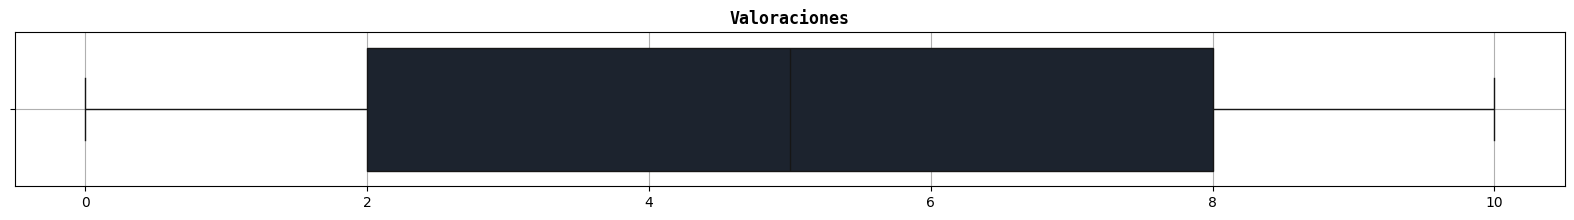

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
sns.boxplot(data=df_valoracion_limpio, x="valoracion", color="#192231")
plt.title('Valoraciones', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

No se aprecian valores atípicos de ningún tipo en esta columna

###EMOCIONES

In [ ]:
# Nombre del archivo json con el que se trabajará
archivo_emociones = 'emocion.json'

# Abrimos el archivo para leerlo y asegurarnos de que se cierre adecuadamente con la función with
with open(archivo_emociones, 'r') as json_file:
    dataF = json.load(json_file)

In [ ]:
# Creamos una estructura para poder insertar los datos del json en un dataframe
json_emocion = {"t_id": [], "emocion": [], "tiempo_recogida": []}

# Recorremos el json
for key, values in dataF.items():
    json_emocion["t_id"].append(values["t_id"])
    json_emocion["emocion"].append(values["emocion"])
    json_emocion["tiempo_recogida"].append(values["tiempo_recogida"])

# Convertimos a DataFrame nuestra estructura creada anteriormente
df_emocion = pd.DataFrame(json_emocion)

####Comprension de la estuctura de los datos

In [ ]:
df_emocion.columns

Index(['t_id', 'emocion', 'tiempo_recogida'], dtype='object')

| Variable  | Definicion |
|-----------|-----------|
| T_id   | Identificador de la fotografia  
| Emocion   | Emocion etiquetada en la fotografia   |
| Tiempo_recogida   | Horas que transcurren desde las 7:00 del 1/9/22 al momento en el que se toma la fotografia  |

In [ ]:
df_emocion.shape

(35885, 3)

In [ ]:
# Primeros registros
df_emocion.head(10)

t_id emocion  tiempo_recogida
0  Training_10118481.jpg   angry              291
1  Training_10120469.jpg   angry              425
2  Training_10131352.jpg   angry              499
3  Training_10161559.jpg   angry              715
4   Training_1021836.jpg   angry              301
5  Training_10269675.jpg   angry              415
6  Training_10278738.jpg   angry              458
7  Training_10290703.jpg   angry              104
8  Training_10295477.jpg   angry              184
9  Training_10315441.jpg   angry              221

In [ ]:
# Últimos registros
df_emocion.tail(10)

t_id   emocion  tiempo_recogida
35875  PublicTest_97429032.jpg  surprise               42
35876  PublicTest_97536839.jpg  surprise              656
35877  PublicTest_97902387.jpg  surprise              253
35878  PublicTest_97957698.jpg  surprise               41
35879  PublicTest_97995446.jpg  surprise              543
35880  PublicTest_98089595.jpg  surprise              469
35881  PublicTest_98567249.jpg  surprise              299
35882  PublicTest_98972870.jpg  surprise              255
35883  PublicTest_99242645.jpg  surprise              573
35884  PublicTest_99446963.jpg  surprise              466

In [ ]:
# Registros aleatorios
df_emocion.sample(10)

t_id   emocion  tiempo_recogida
33060  PrivateTest_79427116.jpg   neutral              511
8320      Training_95694963.jpg      fear               90
10402     Training_32858405.jpg     happy              601
35169  PrivateTest_32600033.jpg  surprise              321
23195     Training_56274922.jpg       sad              103
31932    PublicTest_3469437.jpg      None              547
26420     Training_34796285.jpg  surprise              544
29560   PublicTest_82685854.jpg     angry              150
16105     Training_16126119.jpg   neutral              120
10350     Training_32185021.jpg     happy              477

In [ ]:
df_emocion.dtypes

t_id               object
emocion            object
tiempo_recogida     int64
dtype: object

####Limpieza de datos

#####Valores Negativos

In [ ]:
df_emocion.describe()

tiempo_recogida
count     35885.000000
mean        359.592197
std         207.274279
min           2.000000
25%         181.000000
50%         359.000000
75%         539.000000
max         719.000000

El tiempo promedio de recogida es de aproximadamente 359 minutos (alrededor de 6 horas), con una desviación estándar de 207 minutos. Esto sugiere cierta variabilidad en los tiempos de recogida. El rango completo de tiempos, desde 2 hasta 719 minutos, refleja una amplia gama de experiencias en cuanto a los tiempos de espera para la recogida.

#####Valores Nulos

In [ ]:
nulos_emocion = df_emocion.isnull().sum()
print(nulos_emocion)

t_id                 0
emocion            351
tiempo_recogida      0
dtype: int64


En este proyecto, la columna "emoción" se destaca como la métrica principal, y por lo tanto, es esencial abordar los valores nulos presentes en esta columna. Con el propósito de corregir esta situación, optamos por recargar los archivos originales que constituyen nuestro raw data. Este enfoque busca verificar si la reintroducción de los datos desde su origen rellenar los valores nulos que afectan la columna "emoción".

In [ ]:
import os
from google.colab import files
import zipfile as z

archivos = files.upload()

#NOMBRE DE LOS ARCHIVOS ZIP A EXTRAER
archivo_test = "test.zip"
archivo_train = "train.zip"

#Extraemos los dos archivos
with z.ZipFile(archivo_test, 'r') as archivo_extraido:
    archivo_extraido.extractall()

with z.ZipFile(archivo_train, 'r') as archivo_extraido:
    archivo_extraido.extractall()

Saving test.zip to test.zip
Saving train.zip to train.zip


In [ ]:
# Ruta de las carpetas "train" y "test" en tu sistema local
train = 'test'
test = 'train'

# Nombre del archivo json con el que se trabajará
archivo_emociones = 'emocion.json'

#Hacemos una copia del df para evitar modificar el original en caso de que sea necesario eliminar o agregar datos más adelante
#preservando así la integridad del df original.
df_emocion_limpio = df_emocion.copy()

In [ ]:
#Sacamos las filas donde hay nulos
filas_none = df_emocion_limpio[df_emocion_limpio['emocion'].isnull()]

# Recorremos las carpetas y asociamos las emociones
for carpeta in train,test:
  #Recorremos las subcarpetas contenidas en cada carpeta de train y test
    for subcarpeta in os.listdir(carpeta):
      #Hacemos el join para que al leer las imagenes no da error de existencia de directorios
        path_emocion = os.path.join(carpeta, subcarpeta)
        emociones = subcarpeta #
        #Leemos todas las imágenes de cadad emocion
        for filename in os.listdir(path_emocion):
          # Buscamos las filas con "None" en la columna "emocion"
              if(filename in filas_none['t_id'].values):
                # Actualizamos la columna "emocion" en el DataFrame original
                df_emocion_limpio.loc[df_emocion_limpio['t_id'] == filename, 'emocion'] = emociones

# Muestra el DataFrame resultante
display(df_emocion_limpio)

t_id   emocion  tiempo_recogida
0        Training_10118481.jpg     angry              291
1        Training_10120469.jpg     angry              425
2        Training_10131352.jpg     angry              499
3        Training_10161559.jpg     angry              715
4         Training_1021836.jpg     angry              301
...                        ...       ...              ...
35880  PublicTest_98089595.jpg  surprise              469
35881  PublicTest_98567249.jpg  surprise              299
35882  PublicTest_98972870.jpg  surprise              255
35883  PublicTest_99242645.jpg  surprise              573
35884  PublicTest_99446963.jpg  surprise              466

[35885 rows x 3 columns]

In [ ]:
nulos_emocion = df_emocion_limpio.isnull().sum()
print(nulos_emocion)

t_id               0
emocion            0
tiempo_recogida    0
dtype: int64


####Valores atípicos

Comprobamos si existen valores outliers en la columna numérica de este dataframe


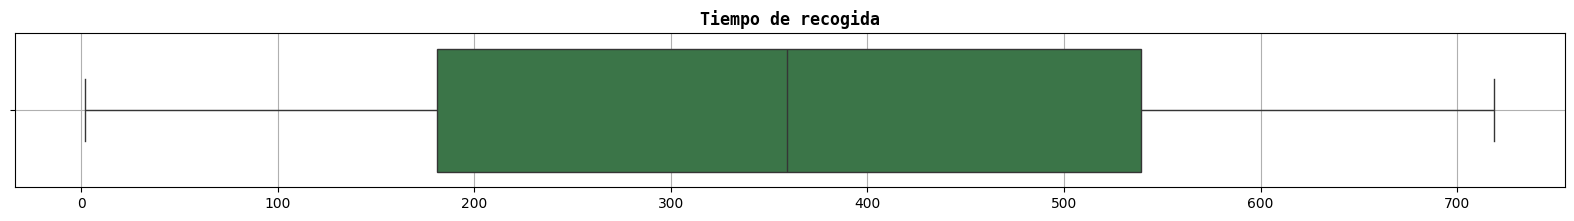

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
sns.boxplot(data=df_emocion_limpio, x="tiempo_recogida", color="#317f43")
plt.title('Tiempo de recogida', fontsize=12, fontfamily="monospace", fontweight="bold")
plt.xlabel('')
plt.ylabel('')
plt.grid()

plt.show()

En esta ocasión no se aprecian outliers en ninguno de los lados

#ANÁLISIS DE VALORES ERRÓNEOS

En esta sección vamos a analizar lo que ha supuesto la limpieza de datos que hemos realizado en apartados anteriores, esto es importante ya que debemos asegurarnos que las emociones han quedado correctamente representadas.

Comenzamos recopilando las emociones que hemos perdido debido a los visitantes que se ha recopilado que han estado más de nueve horas en el parque

In [ ]:
df_errores_duracionemocion = pd.merge(df_emocion_limpio,df_duracion_incorrectos, how="inner",on="t_id")
df_errores_duracionemocion.head(2)

t_id emocion  tiempo_recogida id_visitante  duracion
0  Training_10524198.jpg   angry              311           20       564
1  Training_12095508.jpg   angry               56           78       584

In [ ]:
df_errores_duracionemocion.shape

(1279, 5)

In [ ]:
emocion_agrupada_duracion = df_errores_duracionemocion.groupby(by="emocion").size().reset_index(name='count')
print(emocion_agrupada_duracion)

    emocion  count
0     angry    158
1   disgust     21
2      fear    189
3     happy    338
4   neutral    203
5       sad    235
6  surprise    135


Además, recopilamos las emociones perdidas gracias a los tickets de Pase Rápido que se han vendido con una antelación superior a tres días.

In [ ]:
df_errores_ticketemocion = pd.merge(df_emocion_limpio,df_ticket_incorrectos, how="inner",on="t_id")
df_errores_ticketemocion.head(2)

t_id emocion  tiempo_recogida id_visitante tipo_entrada  \
0  Training_10295477.jpg   angry              184           11  Pase Rápido   
1  Training_10315441.jpg   angry              221           12  Pase Rápido   

       coste  antelacion_compra  
0  13.436528                149  
1  29.028055                146

In [ ]:
df_errores_ticketemocion.shape

(3780, 7)

In [ ]:
emocion_agrupada_ticket = df_errores_ticketemocion.groupby(by="emocion").size().reset_index(name='count')
print(emocion_agrupada_ticket)

    emocion  count
0     angry    523
1   disgust     60
2      fear    542
3     happy    923
4   neutral    633
5       sad    653
6  surprise    446


Finalmente, queremos analizar de todas las emociones que hemos perdido debido a estos errores, cuáles eran datos erróneos tanto en el df_duración como el df_ticket.

In [ ]:
df_errores_juntos = pd.merge(df_duracion_incorrectos,df_ticket_incorrectos, how="inner",on="t_id")
df_errores_juntos = pd.merge(df_emocion,df_errores_juntos, how="inner",on="t_id")
df_errores_juntos.head(2)

t_id emocion  tiempo_recogida id_visitante_x  duracion  \
0  Training_19282935.jpg   angry              540             61       578   
1  Training_23150659.jpg   angry               20            234       554   

  id_visitante_y tipo_entrada      coste  antelacion_compra  
0             61  Pase Rápido  15.104910                236  
1            234  Pase Rápido  12.514174                 16

In [ ]:
df_errores_juntos.shape

(127, 9)

In [ ]:
df_errores_juntos.isnull().sum()

t_id                 0
emocion              1
tiempo_recogida      0
id_visitante_x       0
duracion             0
id_visitante_y       0
tipo_entrada         0
coste                0
antelacion_compra    0
dtype: int64

In [ ]:
emocion_agrupada_juntos = df_errores_juntos.groupby(by="emocion").size().reset_index(name='count')
print(emocion_agrupada_juntos)

    emocion  count
0     angry     11
1   disgust      2
2      fear     19
3     happy     44
4   neutral     14
5       sad     24
6  surprise     12


Tras analizar los registros, hemos identificado 1274 casos que exceden la duración máxima de 9 horas y 3780 registros en los que la compra del pase rápido supera los 3 días. No se ha detectado ningún registro en el que se haya alcanzado una carga simultánea de más de 500 personas en la atracción, ni tampoco se ha encontrado ninguna valoración inferior a 0 o superior a 10.

Hay 127 valores que tienen tanto valores erróneos en el tipo de entrada y la duración que han estado en el parque. De estos mismos valores erróneos, solo hemos encontrado un valor nulo. Decidimos eliminar dichas filas ya que, aunque no tienen un número significativo de valores nulos, sí contienen varios valores erróneos que podrían comprometer la integridad del conjunto de datos.

Además, teniendo en cuenta que la presencia de estos valores incorrectos podría distorsionar significativamente nuestros análisis y conclusiones, ya que, la inclusión de datos inexactos podría llevar a la formulación de hipótesis erróneas y, en última instancia, a la toma de decisiones basada en información no confiable, hemos decidido extender la limpieza a otras instancias de datos incorrectos que podrían existir en el conjunto de datos. Esta medida adicional es una precaución necesaria, ya que la presencia de datos incorrectos, aunque en menor cantidad, podría tener un impacto sustancial en la interpretación de resultados y en la validez de las conclusiones obtenidas.

Cabe destacar que somos conscientes de que la eliminación de datos puede afectar el tamaño y la representatividad del conjunto de datos, pero consideramos que esta acción es necesaria para mantener la calidad y la confiabilidad de los resultados de nuestro análisis. Por lo tanto, reducido nuestro dataset en alrededor de un 14%, eliminando las siguientes emociones:

```
1217 -- happy
862 -- sad
822 -- neutral
712 -- fear
670 -- angry
569 -- surprise
79 -- disgust
```

#CREACIÓN DE COLUMNAS DE FECHAS

Creemos conveniente incorporar varias columnas en el df_emoción, concretamente, columnas de fechas, que nos serán útiles en posteriores análisis.

In [ ]:
df_emocion_limpio["tiempo_recogida_dia"] = round(df_emocion_limpio["tiempo_recogida"] / 24 + 1, 0)
df_emocion_limpio["tiempo_recogida_hora"] = (df_emocion_limpio["tiempo_recogida"] + 7) % 24
df_emocion_limpio.loc[df_emocion_limpio["tiempo_recogida_hora"] == 0, "tiempo_recogida_hora"] = 1
df_emocion_limpio

t_id   emocion  tiempo_recogida  \
0        Training_10118481.jpg     angry              291   
1        Training_10120469.jpg     angry              425   
2        Training_10131352.jpg     angry              499   
3        Training_10161559.jpg     angry              715   
4         Training_1021836.jpg     angry              301   
...                        ...       ...              ...   
35880  PublicTest_98089595.jpg  surprise              469   
35881  PublicTest_98567249.jpg  surprise              299   
35882  PublicTest_98972870.jpg  surprise              255   
35883  PublicTest_99242645.jpg  surprise              573   
35884  PublicTest_99446963.jpg  surprise              466   

       tiempo_recogida_dia  tiempo_recogida_hora  
0                     13.0                    10  
1                     19.0                     1  
2                     22.0                     2  
3                     31.0                     2  
4                     14.0                    20  
...                    ...                   ...  
35880                 21.0                    20  
35881                 13.0                    18  
35882                 12.0                    22  
35883                 25.0                     4  
35884                 20.0                    17  

[35885 rows x 5 columns]

In [ ]:
df_emocion_limpio["tiempo_recogida_dia"] = pd.to_numeric(df_emocion_limpio["tiempo_recogida_dia"], errors='coerce').astype('int64')

In [ ]:
df_emocion_limpio.dtypes

t_id                    object
emocion                 object
tiempo_recogida          int64
tiempo_recogida_dia      int64
tiempo_recogida_hora     int64
dtype: object

In [ ]:
#convertimos el formato de la nueva columna a dia
df_emocion_limpio["fecha_tiempo_recogida"] = pd.to_datetime(df_emocion_limpio["tiempo_recogida_dia"], format='%d')
#usamos to_timedelta para calcular la diferencia absoluta entre 2022 y 1900, con .dt accedemos al datetime y con .day accedemos al día
df_emocion_limpio["fecha_tiempo_recogida"] = pd.to_datetime("2022-09-01") + pd.to_timedelta(df_emocion_limpio["fecha_tiempo_recogida"].dt.day - 1, unit='D')

In [ ]:
df_emocion_limpio.head(2)

t_id emocion  tiempo_recogida  tiempo_recogida_dia  \
0  Training_10118481.jpg   angry              291                   13   
1  Training_10120469.jpg   angry              425                   19   

   tiempo_recogida_hora fecha_tiempo_recogida  
0                    10            2022-09-13  
1                     1            2022-09-19

In [ ]:
df_emocion_limpio.isnull().sum()

t_id                     0
emocion                  0
tiempo_recogida          0
tiempo_recogida_dia      0
tiempo_recogida_hora     0
fecha_tiempo_recogida    0
dtype: int64

In [ ]:
df_emocion_limpio.head(2)

t_id emocion  tiempo_recogida  tiempo_recogida_dia  \
0  Training_10118481.jpg   angry              291                   13   
1  Training_10120469.jpg   angry              425                   19   

   tiempo_recogida_hora fecha_tiempo_recogida  
0                    10            2022-09-13  
1                     1            2022-09-19

#3. UNIÓN DE DATASETS

Una vez limpiados los datos, procedemos a hacer un merge para unir todas las tablas en una sola

In [ ]:
#antes de hacer el join, para evitar que el campo id_visitante se repita en varias ocasiones en el df_final, procedemos a borrar la columna id_visitante en todas los df, exceptuando uno
df_atraccion_merge = df_atraccion_limpio.copy()
df_duracion_merge = df_duracion_limpio.copy()
df_procedencia_merge = df_procedencia_limpio.copy()

In [ ]:
df_atraccion_merge = df_atraccion_merge.drop("id_visitante", axis=1)
df_duracion_merge = df_duracion_merge.drop("id_visitante", axis=1)
df_procedencia_merge = df_procedencia_merge.drop("id_visitante", axis=1)

In [ ]:
df_final = pd.merge(df_atraccion_merge, df_duracion_merge, on='t_id', how = 'inner') \
                 .merge(df_procedencia_merge, on='t_id', how = 'inner') \
                 .merge(df_ticket_limpio, on='t_id', how = 'inner') \
                 .merge(df_valoracion_limpio, on='t_id', how = 'inner') \
                 .merge(df_emocion_limpio, on='t_id', how = 'inner')

##Comprensión de la estructura de los datos

In [ ]:
df_final.columns

Index(['t_id', 'atraccion', 'comienzo_atraccion', 'tiempo_espera', 'duracion',
       'procedencia', 'id_visitante', 'tipo_entrada', 'coste',
       'antelacion_compra', 'valoracion', 'emocion', 'tiempo_recogida',
       'tiempo_recogida_dia', 'tiempo_recogida_hora', 'fecha_tiempo_recogida'],
      dtype='object')

In [ ]:
df_final.shape

(30824, 16)

In [ ]:
df_final.head()

t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   
2  Training_16232328.jpg    Simulador Espacial 3D                 384   
3  Training_27705571.jpg     Fiesta de los Dulces                 625   
4  Training_63766171.jpg         Gran Caída Libre                 613   

   tiempo_espera  duracion procedencia id_visitante      tipo_entrada  \
0              5       308      España            3        Pase Anual   
1             11       344      España            3  Entrada Familiar   
2             19       161      España            3  Entrada Infantil   
3              9       260      España            3       Paquete VIP   
4             17       169      España            3  Entrada Familiar   

       coste  antelacion_compra  valoracion emocion  tiempo_recogida  \
0  14.003708                  0           2   angry              291   
1  20.900902                  2           5   angry              180   
2  12.638039                218           0   angry              384   
3  18.491775                 39           4   angry              625   
4  18.233458                135           2   angry              613   

   tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  
0                   13                    10            2022-09-13  
1                    8                    19            2022-09-08  
2                   17                     7            2022-09-17  
3                   27                     8            2022-09-27  
4                   27                    20            2022-09-27

In [ ]:
df_final.tail()

t_id              atraccion  comienzo_atraccion  \
30819   PublicTest_2529039.jpg  Espejos de la Risueña                 421   
30820  PublicTest_27916929.jpg      Rápido del Trueno                 185   
30821  PublicTest_64107181.jpg     Carrusel Encantado                 106   
30822  PublicTest_81098275.jpg      Mansión Embrujada                 679   
30823  PublicTest_94828377.jpg                   None                 417   

       tiempo_espera  duracion procedencia id_visitante        tipo_entrada  \
30819             18       419      España         1783  Entrada Individual   
30820             18       206   Filipinas         1784  Entrada Individual   
30821             16       368    Alemania         1785  Entrada Individual   
30822             16       425   Filipinas         1786    Entrada Familiar   
30823             13       464     Francia         1787         Paquete VIP   

           coste  antelacion_compra  valoracion   emocion  tiempo_recogida  \
30819  18.443278                265           4  surprise              421   
30820  11.500348                 42           8  surprise              185   
30821  13.871069                  0          10  surprise              106   
30822  16.697862                 23           0  surprise              679   
30823  21.836315                208           6  surprise              417   

       tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  
30819                   19                    20            2022-09-19  
30820                    9                     1            2022-09-09  
30821                    5                    17            2022-09-05  
30822                   29                    14            2022-09-29  
30823                   18                    16            2022-09-18

In [ ]:
df_final.sample(10)

t_id                   atraccion  \
1445     Training_15492038.jpg         Cine 4D Emocionante   
29799  PublicTest_18496904.jpg     Mundo de las Maravillas   
16362  PublicTest_33060882.jpg      Carrera de Autos Locos   
4543     Training_26169838.jpg         Laberinto de Sueños   
11624    Training_13311993.jpg           Rápido del Trueno   
7554     Training_63260845.jpg      Carrera de Autos Locos   
24159    Training_80754241.jpg     Barco Pirata Misterioso   
7399     Training_83918790.jpg             Selva Encantada   
25913    Training_76797592.jpg  Vuelta al Mundo en 80 Días   
8684     Training_29054231.jpg         Jardín de las Hadas   

       comienzo_atraccion  tiempo_espera  duracion procedencia id_visitante  \
1445                  654             10       276      España           51   
29799                 136              9       145   Filipinas         1512   
16362                 442             17       480      España          595   
4543                  331             11       435      España          153   
11624                 526             12       281      España          402   
7554                  364             10       326      España          258   
24159                  56             17       200      España         1001   
7399                  309             11       396      España          252   
25913                 362             10       351      España         1120   
8684                 <NA>              9       418      España          295   

             tipo_entrada      coste  antelacion_compra  valoracion  emocion  \
1445          Paquete VIP  15.917669                233           6    happy   
29799         Paquete VIP   9.659759                  0          10    happy   
16362  Entrada Individual  18.475949                 83          10  neutral   
4543   Entrada Individual  17.459236                  2           0    happy   
11624  Entrada Individual  19.121561                287           2  neutral   
7554   Entrada Individual  17.018756                  0           1    angry   
24159         Paquete VIP   9.275995                221           3  neutral   
7399          Paquete VIP  20.315510                  0          10  neutral   
25913    Entrada Infantil  14.355700                  0           7    happy   
8684          Paquete VIP  16.946556                 40           0    angry   

       tiempo_recogida  tiempo_recogida_dia  tiempo_recogida_hora  \
1445               654                   28                    13   
29799              136                    7                    23   
16362              442                   19                    17   
4543               331                   15                     2   
11624              526                   23                     5   
7554               364                   16                    11   
24159               56                    3                    15   
7399               309                   14                     4   
25913              362                   16                     9   
8684               662                   29                    21   

      fecha_tiempo_recogida  
1445             2022-09-28  
29799            2022-09-07  
16362            2022-09-19  
4543             2022-09-15  
11624            2022-09-23  
7554             2022-09-16  
24159            2022-09-03  
7399             2022-09-14  
25913            2022-09-16  
8684             2022-09-29

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30824 entries, 0 to 30823
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   t_id                   30824 non-null  object        
 1   atraccion              29844 non-null  object        
 2   comienzo_atraccion     30741 non-null  Int64         
 3   tiempo_espera          30824 non-null  int64         
 4   duracion               30824 non-null  int64         
 5   procedencia            30824 non-null  object        
 6   id_visitante           30824 non-null  object        
 7   tipo_entrada           30824 non-null  object        
 8   coste                  30824 non-null  float64       
 9   antelacion_compra      30824 non-null  int64         
 10  valoracion             30824 non-null  int64         
 11  emocion                30824 non-null  object        
 12  tiempo_recogida        30824 non-null  int64         
 13  t

In [ ]:
df_final.describe()

comienzo_atraccion  tiempo_espera      duracion         coste  \
count             30741.0   30824.000000  30824.000000  30824.000000   
mean           359.306756      12.507656    351.488191     17.005235   
std            207.138644       4.003106     92.124684      4.965895   
min                   2.0       0.000000      1.000000      0.691919   
25%                 181.0      10.000000    289.000000     13.615846   
50%                 358.0      13.000000    355.000000     17.018792   
75%                 539.0      15.000000    419.000000     20.352503   
max                 719.0      28.000000    540.000000     39.326885   

       antelacion_compra    valoracion  tiempo_recogida  tiempo_recogida_dia  \
count       30824.000000  30824.000000     30824.000000         30824.000000   
mean          111.129315      4.986828       359.314073            15.971905   
std           120.879999      3.152355       207.160999             8.641545   
min             0.000000      0.000000         2.000000             1.000000   
25%             0.000000      2.000000       181.000000             9.000000   
50%            65.000000      5.000000       358.000000            16.000000   
75%           215.000000      8.000000       538.000000            23.000000   
max           364.000000     10.000000       719.000000            31.000000   

       tiempo_recogida_hora  
count          30824.000000  
mean              11.571892  
std                6.858573  
min                1.000000  
25%                5.000000  
50%               12.000000  
75%               18.000000  
max               23.000000

##Corrección columna duración

Hemos comprobado que muchos id visitante tiene registros pertenecientes a días distintos. Esto lo interpretamos como que hay visitantes que han acudido varios días a Pontia World. Ahora queremos ver si también existen distintas duraciones dentro del mismo visitante y el mismo dia, lo cual no tendría mucho sentido.

In [ ]:
df_visitante_duracion = df_final.groupby(["id_visitante", "tiempo_recogida_dia"]).agg({"duracion": "unique"}).reset_index()

In [ ]:
#comprobamos que efectivamente, poniendo el foco en el mismo visitante y en el mismo día, en ocasiones existen diferentes duraciones
df_visitante_duracion

id_visitante  tiempo_recogida_dia duracion
0                1                    2  [416.5]
1                1                    3  [407.0]
2                1                    4  [394.0]
3                1                    5  [486.0]
4                1                    7  [428.0]
...            ...                  ...      ...
22140          999                   23  [259.0]
22141          999                   24  [354.0]
22142          999                   26  [388.0]
22143          999                   29  [500.0]
22144          999                   30  [302.0]

[22145 rows x 3 columns]

In [ ]:
#como no le encontramos mucho sentido a esos datos, interpretamos que se trata de un error. Decidimos hacer una nueva columna con los valores corregidos de duracion. El criterio que usamos va a ser la mediana, ya que observamos que hay valores un tanto dispares
df_final["duracion_nueva"] = df_final.groupby(["id_visitante", "tiempo_recogida_dia"])["duracion"].transform('median')

In [ ]:
df_final.head()

t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   
2  Training_16232328.jpg    Simulador Espacial 3D                 384   
3  Training_27705571.jpg     Fiesta de los Dulces                 625   
4  Training_63766171.jpg         Gran Caída Libre                 613   

   tiempo_espera procedencia id_visitante      tipo_entrada      coste  \
0              5      España            3        Pase Anual  14.003708   
1             11      España            3  Entrada Familiar  20.900902   
2             19      España            3  Entrada Infantil  12.638039   
3              9      España            3       Paquete VIP  18.491775   
4             17      España            3  Entrada Familiar  18.233458   

   antelacion_compra  valoracion emocion  tiempo_recogida  \
0                  0           2   angry              291   
1                  2           5   angry              180   
2                218           0   angry              384   
3                 39           4   angry              625   
4                135           2   angry              613   

   tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  duracion  \
0                   13                    10            2022-09-13     274.0   
1                    8                    19            2022-09-08     344.0   
2                   17                     7            2022-09-17     277.0   
3                   27                     8            2022-09-27     214.5   
4                   27                    20            2022-09-27     214.5   

   duracion_nueva  
0           274.0  
1           344.0  
2           277.0  
3           214.5  
4           214.5

In [ ]:
df_visitante_duracion_2 = df_final.groupby(["id_visitante", "tiempo_recogida_dia", "duracion"]).agg({"duracion_nueva": "unique"}).reset_index()

In [ ]:
#comprobamos que ahora ya hay una única duracion por visitante y día
df_visitante_duracion_2

id_visitante  tiempo_recogida_dia  duracion duracion_nueva
0                1                    2     416.5        [416.5]
1                1                    3     407.0        [407.0]
2                1                    4     394.0        [394.0]
3                1                    5     486.0        [486.0]
4                1                    7     428.0        [428.0]
...            ...                  ...       ...            ...
22140          999                   23     259.0        [259.0]
22141          999                   24     354.0        [354.0]
22142          999                   26     388.0        [388.0]
22143          999                   29     500.0        [500.0]
22144          999                   30     302.0        [302.0]

[22145 rows x 4 columns]

In [ ]:
#borramos la vieja columna de duración
df_final.drop("duracion", axis = 1, inplace = True)

In [ ]:
#y renombramos la nueva columna de duracion
df_final.rename(columns = {"duracion_nueva" : "duracion"}, inplace = True)

In [ ]:
df_final.head()

t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   
2  Training_16232328.jpg    Simulador Espacial 3D                 384   
3  Training_27705571.jpg     Fiesta de los Dulces                 625   
4  Training_63766171.jpg         Gran Caída Libre                 613   

   tiempo_espera procedencia id_visitante      tipo_entrada      coste  \
0              5      España            3        Pase Anual  14.003708   
1             11      España            3  Entrada Familiar  20.900902   
2             19      España            3  Entrada Infantil  12.638039   
3              9      España            3       Paquete VIP  18.491775   
4             17      España            3  Entrada Familiar  18.233458   

   antelacion_compra  valoracion emocion  tiempo_recogida  \
0                  0           2   angry              291   
1                  2           5   angry              180   
2                218           0   angry              384   
3                 39           4   angry              625   
4                135           2   angry              613   

   tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  duracion  
0                   13                    10            2022-09-13     274.0  
1                    8                    19            2022-09-08     344.0  
2                   17                     7            2022-09-17     277.0  
3                   27                     8            2022-09-27     214.5  
4                   27                    20            2022-09-27     214.5

##Recuento de los registros eliminados

Una vez realizada la limpieza de los datos, de haber eliminado los registros que creímos conveniente, y tras haber llevado a cabo la unión de los diferentes datasets en un dataframe final, queremos saber de cuantos datos hemos prescindido. Concretamente, queremos conocer cómo ha afectado esta limpieza a las diferentes emociones, es decir, comprobar cuántos registros hemos terminado borrando de cada una de nuestras emociones, tanto en térmimos absolutos como en proporción.

In [ ]:
frecuencia_emociones_original = df_emocion['emocion'].value_counts().reset_index(name='conteo_emociones_original')
frecuencia_emociones_original = frecuencia_emociones_original.rename(columns={'index': 'Emocion', 'emocion': 'conteo_emociones_original'})
frecuencia_emociones_original

Emocion  conteo_emociones_original
0     happy                       8901
1   neutral                       6138
2       sad                       6019
3      fear                       5075
4     angry                       4905
5  surprise                       3953
6   disgust                        543

In [ ]:
frecuencia_emociones_limpio = df_final['emocion'].value_counts().reset_index(name='conteo_emociones_limpio')
frecuencia_emociones_limpio = frecuencia_emociones_limpio.rename(columns={'index': 'Emocion', 'emocion': 'conteo_emociones_limpio'})
frecuencia_emociones_limpio

Emocion  conteo_emociones_limpio
0     happy                     7733
1   neutral                     5361
2       sad                     5192
3      fear                     4390
4     angry                     4267
5  surprise                     3418
6   disgust                      463

In [ ]:
fre_emociones = pd.merge(frecuencia_emociones_original, frecuencia_emociones_limpio, on='Emocion').sort_values(by = "conteo_emociones_original", ascending = False)
fre_emociones

Emocion  conteo_emociones_original  conteo_emociones_limpio
0     happy                       8901                     7733
1   neutral                       6138                     5361
2       sad                       6019                     5192
3      fear                       5075                     4390
4     angry                       4905                     4267
5  surprise                       3953                     3418
6   disgust                        543                      463

In [ ]:
fre_emociones['total_eliminado'] = (fre_emociones['conteo_emociones_original'] - fre_emociones['conteo_emociones_limpio'])
fre_emociones['porcentaje_eliminado'] = round((fre_emociones['total_eliminado'] / fre_emociones['conteo_emociones_original']) * 100,2)
fre_emociones

Emocion  conteo_emociones_original  conteo_emociones_limpio  \
0     happy                       8901                     7733   
1   neutral                       6138                     5361   
2       sad                       6019                     5192   
3      fear                       5075                     4390   
4     angry                       4905                     4267   
5  surprise                       3953                     3418   
6   disgust                        543                      463   

   total_eliminado  porcentaje_eliminado  
0             1168                 13.12  
1              777                 12.66  
2              827                 13.74  
3              685                 13.50  
4              638                 13.01  
5              535                 13.53  
6               80                 14.73

In [ ]:
df_emociones_totales = fre_emociones[["Emocion","conteo_emociones_original", "conteo_emociones_limpio"]]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

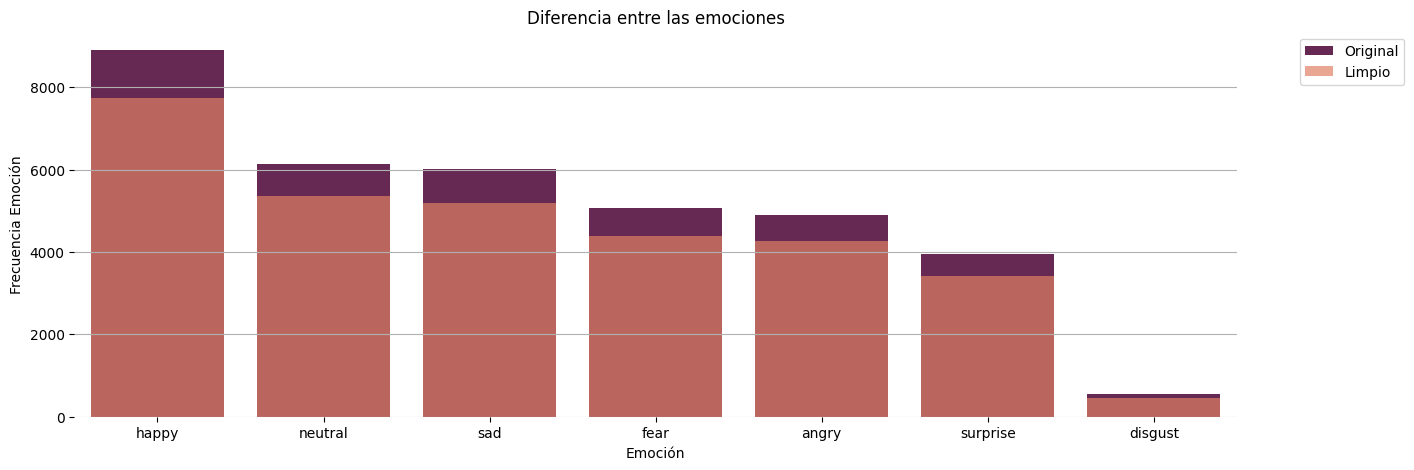

In [ ]:
plt.figure(figsize=(15,5))
colores = ['#701f57', '#f37651']
sns.barplot(x=df_emociones_totales["Emocion"], y=df_emociones_totales["conteo_emociones_original"], color=colores[0], label='Original')
sns.barplot(x=df_emociones_totales["Emocion"], y=df_emociones_totales["conteo_emociones_limpio"], color=colores[1], label='Limpio', alpha=0.7)

plt.legend(loc='upper right',bbox_to_anchor=(1.15, 1),fancybox=True)

plt.title('Diferencia entre las emociones')
plt.ylabel('Frecuencia Emoción')
plt.xlabel('Emoción')
plt.grid(axis='y')
plt.box(False)
plt.show();

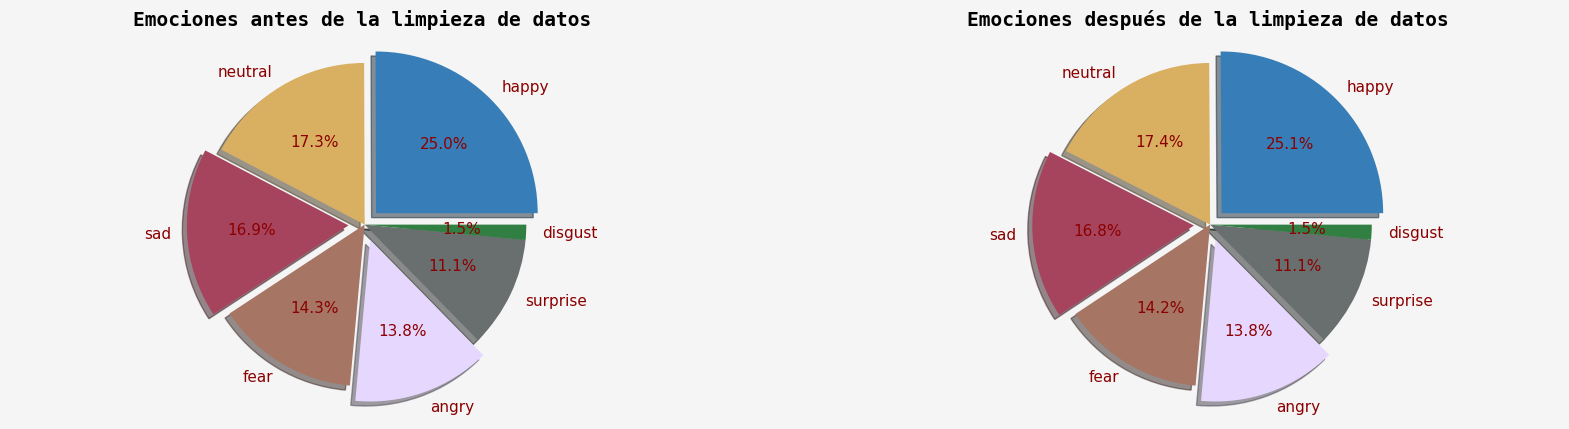

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), facecolor='#f5f5f5')
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#e6d7ff", "#696e6f", "#317f43"]

explode = (0.1, 0, 0.1, 0, 0.1, 0, 0)
ax[0].pie(df_emociones_totales["conteo_emociones_original"], labels=df_emociones_totales['Emocion'], autopct='%1.1f%%', colors=colores, explode=explode, shadow=True, textprops={'color': '#8B0000', 'fontsize': 11})
ax[0].set_title('Emociones antes de la limpieza de datos', fontsize=14, fontfamily="monospace", fontweight="bold")

explode = (0.1, 0, 0.1, 0, 0.1, 0, 0)
ax[1].pie(df_emociones_totales["conteo_emociones_limpio"], labels=df_emociones_totales['Emocion'], autopct='%1.1f%%', colors=colores, explode=explode, shadow=True, textprops={'color': '#8B0000', 'fontsize': 11})
ax[1].set_title('Emociones después de la limpieza de datos', fontsize=14, fontfamily="monospace", fontweight="bold")

ax[0].axis('equal')
ax[1].axis('equal')

plt.show();


#4. EXPLORATORY DATA ANALYSIS

In [ ]:
#librerias visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

#librerias preventivas

import warnings
warnings.filterwarnings('ignore')
import io

In [ ]:
%matplotlib inline

##Distribuciones

###Distribución de variables numéricas

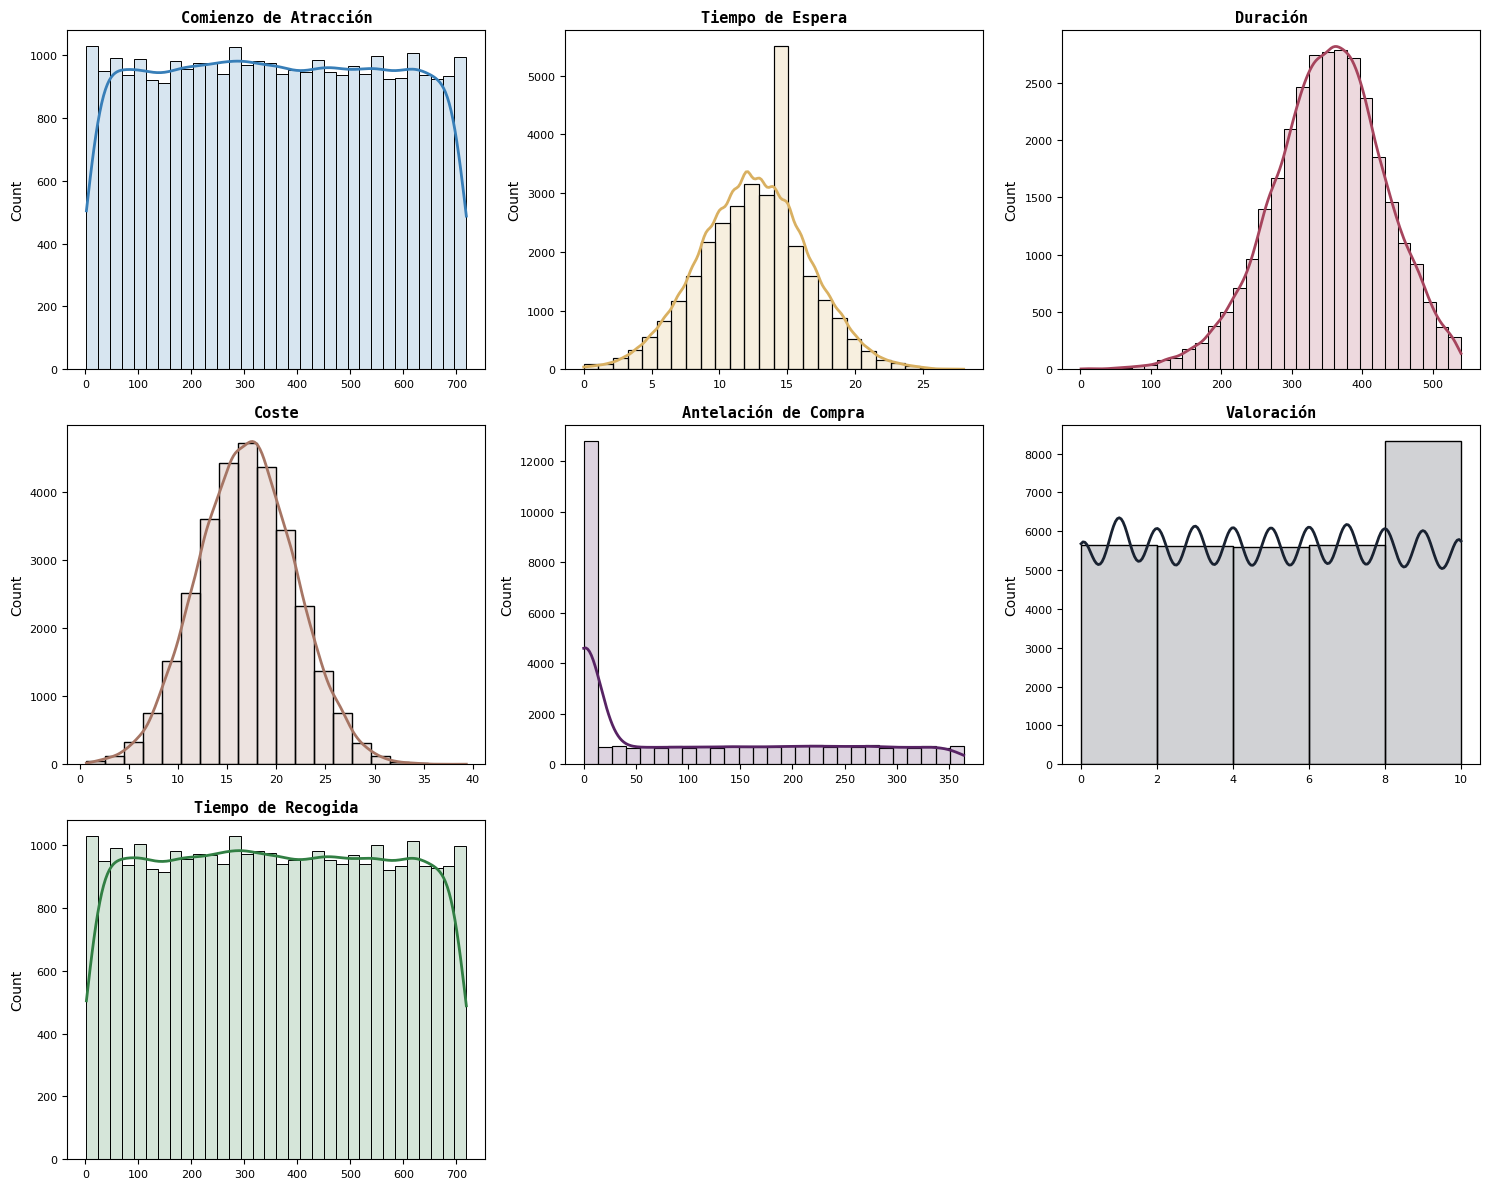

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flat

colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
titulos = ['Comienzo de Atracción', 'Tiempo de Espera', 'Duración', 'Coste', 'Antelación de Compra', 'Valoración', 'Tiempo de Recogida']
columnas_numeric = df_final[["comienzo_atraccion", "tiempo_espera","duracion","coste","antelacion_compra","valoracion","tiempo_recogida"]]

for i, colum in enumerate(columnas_numeric[:7]):
  if i == 1:
    sns.histplot(
        data=df_final,
        x=colum,
        kde=True,
        bins=26,
        color=colores[i],
        line_kws={"linewidth": 2},
        alpha=0.2,
        ax=axes[i]
        ),
  elif i == 2:
    sns.histplot(
        data=df_final,
        x=colum,
        kde=True,
        bins=30,
        color=colores[i],
        line_kws={"linewidth": 2},
        alpha=0.2,
        ax=axes[i]
        )
  elif i == 3:
    sns.histplot(
        data=df_final,
        x=colum,
        kde=True,
        bins=20,
        color=colores[i],
        line_kws={"linewidth": 2},
        alpha=0.2,
        ax=axes[i]
        )

  elif i == 5:
    sns.histplot(
        data=df_final,
        x=colum,
        kde=True,
        bins=5,
        color=colores[i],
        line_kws={"linewidth": 2},
        alpha=0.2,
        ax=axes[i]
        )
  else:
    sns.histplot(
        data=df_final,
        x=colum,
        kde=True,
        color=colores[i],
        line_kws={"linewidth": 2},
        alpha=0.2,
        ax=axes[i],
        )
  axes[i].set_title(titulos[i], fontsize=11, fontweight="bold", fontfamily="monospace")
  axes[i].tick_params(labelsize=8)
  axes[i].set_xlabel("")


# Ocultar los dos ultimos graficos
for ax in axes[7:]:
    ax.set_axis_off()

fig.tight_layout()
plt.show()

Distribución
1. Tanto el histograma de Comienzo de Atracción como el Tiempo de Recogida muestran una distribución rectangular, sugiriendo que los datos están uniformemente distribuidos en todo el rango del conjunto de datos en ambos casos.
2. El Tiempo de Espera muestra una distribución casi simétrica en su histograma, lo que sugiere que los datos están distribuidos de manera relativamente uniforme alrededor de la media. Esta simetría indica que la media es representativa de los datos y no hay una tendencia clara hacia valores más altos o más bajos. La forma de la distribución se asemeja a la de una campana, típica de una distribución normal. Con una media de 12.5, una mediana de 12 y una desviación estándar de 4, la variabilidad alrededor de la media podría ser pequeña. En general, el tiempo de espera para subirse a una atracción tiende a ser equitativo para diferentes observaciones, lo que podría tener implicaciones significativas en la planificación y gestión de recursos.
3. Duración:  dentro de la duración en el parque de atracciones, observamos una distribución normal. Sin embargo, es importante notar un leve sesgo a la izquierda en la muestra de datos. Con una media de 351.7, una mediana de 355 y una desviación estándar de 92, parece que la mayoría de las personas tienden a prolongar su estancia a más de 351 minutos en el parque, sugiriendo una preferencia por una experiencia más extensa.
4. Coste: en la variable de costo de la entrada al parque, nuevamente observamos una distribución que recuerda la forma de una campana, similar a las dos distribuciones anteriores. Sin embargo, en este caso, es importante señalar la existencia de un ligero sesgo a la derecha en la muestra de datos. La pequeña diferencia entre la media de 16.9 y la mediana de 17, combinada con una desviación estándar relativamente pequeña de 4.9, sugiere que el coste para entrar al parque se mantiene bastante constante alrededor de los 17 euros. Este patrón indica una cierta estabilidad en los precios de entrada.
5. Antelación compra: esta variable es la que indica el tiempo de antelación con el que los visitantes compran la entrada y muestra un evidente sesgo a la derecha. Este patrón podría sugerir que los visitantes tienden a comprar la entrada el mismo día en que van al parque en lugar de reservar con antelación. Con una media de 118, una mediana de 85 y una desviación estándar de 121, se evidencia una variabilidad significativa en los datos, indicando que hay una amplia gama de comportamientos en cuanto a la antelación en la compra de entradas.
6. Valoración: La valoración que los visitantes han dado al parque muestra una distribución bastante uniforme en el rango de 0 a 8. Sin embargo, se observa un claro sesgo a la izquierda en el rango de 8 a 10, lo que sugiere que la mayoría de los clientes tienden a estar extremadamente satisfechos tras salir del parque. No obstante, es importante señalar que las valoraciones del 0 al 4 se mantienen constantes y están al mismo nivel que las valoraciones del 5 al 8. Esto podría indicar una oportunidad de mejora, ya que idealmente esperaríamos que las valoraciones del 0 al 4 fueran más bajas que el resto. Con una media de 4, una mediana de 8 y una desviación estándar de 3, se confirma una variabilidad moderada en las valoraciones, destacando la diversidad de percepciones entre los visitantes.

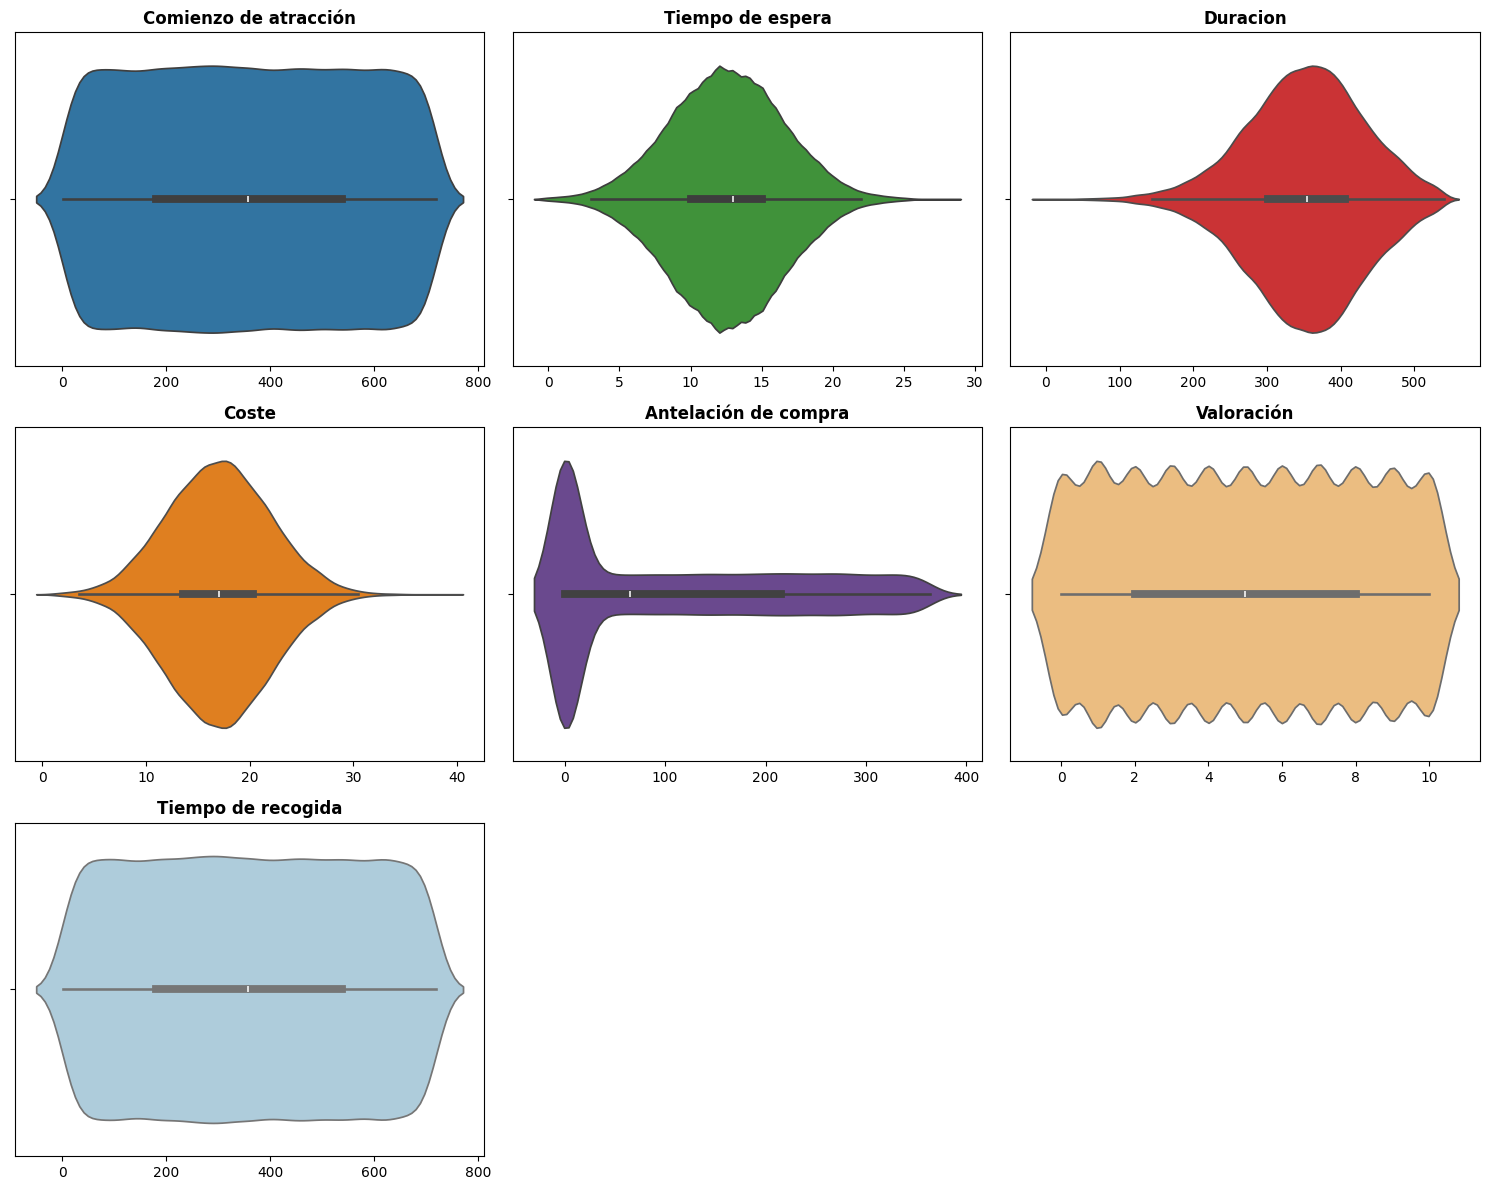

In [ ]:
#a continuación hacemos un violinplot con estas mismas variables numéricas; esto supone otra manera de ver la distribución de las mismas, combinándose con un boxplot para poder presenciar, entre otras métricas, la mediana y los cuartiles
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

sns.violinplot(data=df_final, x='comienzo_atraccion', ax=ax[0, 0], color= '#1f78b4').set_title("Comienzo de atracción", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='tiempo_espera', ax=ax[0, 1], color='#33a02c').set_title("Tiempo de espera", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='duracion', ax=ax[0, 2], color= '#e31a1c').set_title("Duracion", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='coste', ax=ax[1, 0], color= '#ff7f00').set_title("Coste", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='antelacion_compra', ax=ax[1, 1], color= '#6a3d9a').set_title("Antelación de compra", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='valoracion', ax=ax[1, 2], color= '#fdbf6f').set_title("Valoración", fontsize=12, fontweight='bold')
sns.violinplot(data=df_final, x='tiempo_recogida', ax=ax[2, 0], color= '#a6cee3').set_title("Tiempo de recogida", fontsize=12, fontweight='bold')

#elimino las subgráficos que se iban a generar en blanco
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])

# Ajusto la configuración del gráfico
for i in range(3):
    for j in range(3):
        ax[i, j].set_xlabel("")

fig.tight_layout()
plt.show()

###Distribución de variables categóricas

En este caso, generamos una tabla de frecuencia para las columnas categóricas y de esta forma poder entender mejor nuestro dataset.

In [ ]:
tabla_frecuencia_emocion = df_final.groupby("emocion").size().reset_index(name='count').sort_values(by='count', ascending=False)
tabla_frecuencia_emocion

emocion  count
3     happy   7733
4   neutral   5361
5       sad   5192
2      fear   4390
0     angry   4267
6  surprise   3418
1   disgust    463

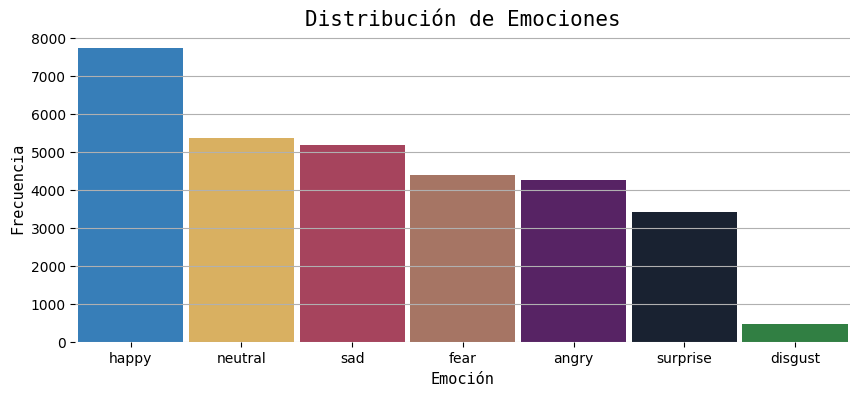

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x=tabla_frecuencia_emocion["emocion"], y=tabla_frecuencia_emocion["count"], palette=colores, saturation = 1.15, width=0.95)
plt.title('Distribución de Emociones', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Frecuencia', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()

In [ ]:
fig_discount_pie = px.pie(tabla_frecuencia_emocion,
                          names='emocion',
                          values='count',
                          title='Frecuencia de las emociones registradas en el parque',
                          color_discrete_sequence=colores,
                          hover_data=['count'],
                          labels={'emocion':'Emocion', 'count':'Cantidad'},
                          template='simple_white')

fig_discount_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_discount_pie.update_layout(
    font={
        'family':"monospace",
        'size':16
        },
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family':"monospace",
        'font_size':25,
        'font_color':'black'},
    showlegend=False,
    height=600,
    width=800
)
fig_discount_pie.show();

Como se puede observar, la emoción más registrada es la felicidad, seguida de cerca por las neutras y, en tercer lugar, la tristeza. Por lo tanto, sería importante revisar en qué atracciones se han identificado tantos momentos de tristeza como neutros, ya que puede indicar oportunidades de mejora, especialmente si la tristeza o neutralidad no es la emoción buscada para esa atracción proporcionando así una información valiosa para ajustar la experiencia en ciertas atracciones y garantizar que se alinee con la respuesta emocional deseada por los visitantes.

In [ ]:
tabla_frecuencia_tipo_entrada = df_final["tipo_entrada"].value_counts().sort_values(ascending=False)
#tabla_frecuencia_tipo_entrada

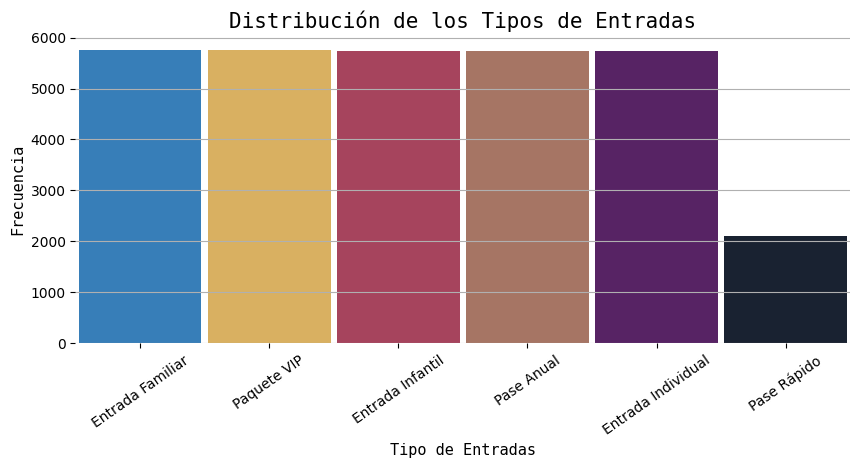

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x=tabla_frecuencia_tipo_entrada.index, y=tabla_frecuencia_tipo_entrada.values, palette=colores, saturation = 1.15, width=0.95)
plt.title('Distribución de los Tipos de Entradas', fontsize=15, fontfamily="monospace")
plt.xlabel('Tipo de Entradas', fontsize=11, fontfamily="monospace")
plt.ylabel('Frecuencia', fontsize=11, fontfamily="monospace")
plt.xticks(rotation=35)
plt.grid(axis='y')
plt.box(False)
plt.show()

En cuanto a la distribución de entradas no parece haber una clara preferencia por parte de los visitantes entre todas las entradas menos el pase Rápido que parece tener menos venta, ya que la frecuencia con la que se compran los diferentes tipos de entrada es bastante uniforme a lo largo de nuestros datos. Esta diferencia entre Pase Rápido y las demás entrada puede deberse a que el pase el rápido tiene una limitación de compra (no se puede comprar con más de tres días de antelación)

In [ ]:
tabla_frecuencia_atraccion = df_final["atraccion"].value_counts().sort_values(ascending=False)
#tabla_frecuencia_atraccion

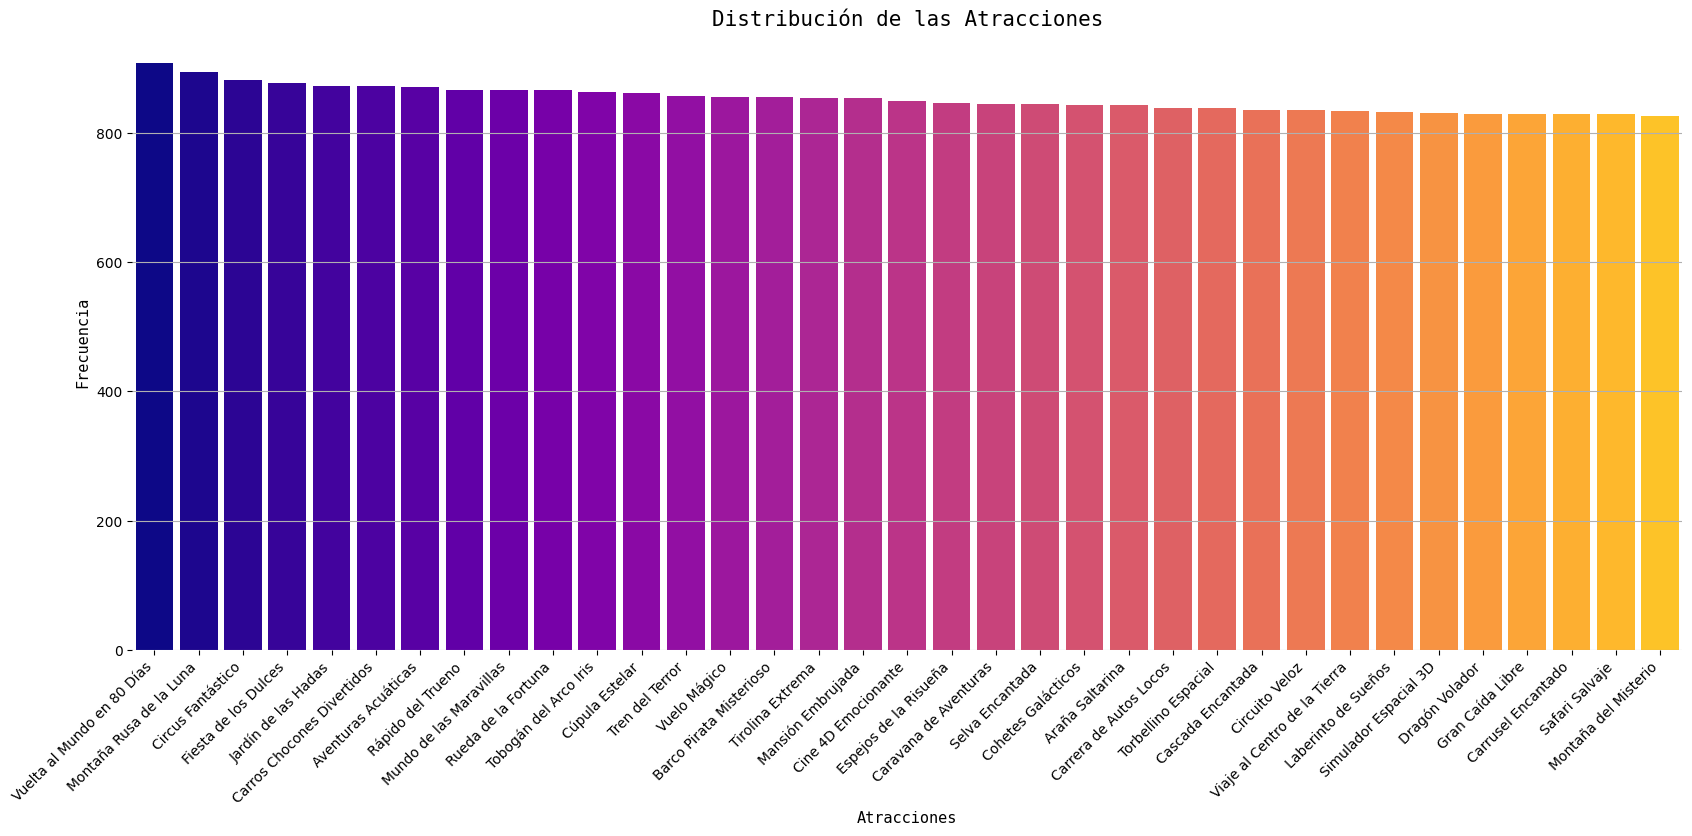

In [ ]:
plt.figure(figsize=(20, 8))
#con np generamos lista de 40 colores que siguen la secuencia de colores del colormap plasma
colores = plt.cm.plasma(np.linspace(0, 1, 40))
sns.barplot(x=tabla_frecuencia_atraccion.index, y=tabla_frecuencia_atraccion.values, palette=colores, saturation = 1.15, width=0.85)
plt.title('Distribución de las Atracciones', fontsize=15, fontfamily="monospace")
plt.xlabel('Atracciones', fontsize=11, fontfamily="monospace")
plt.ylabel('Frecuencia', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.box(False)
plt.show()

En el caso de las distintas atracciones del parque, parece haber una ligera preferencia por la atracción 'Vuelta al Mundo en 80 Días'. No obstante, en términos generales, la frecuencia con la que la gente se sube a las atracciones supera las 800 en todos los casos. Esto sugiere que, aunque pueda haber ligeras preferencias por ciertas atracciones, en general, todas las atracciones son bastante utilizadas por los visitantes.

In [ ]:
visitantes_por_paises = df_final.groupby('procedencia')['id_visitante'].nunique().reset_index().sort_values(by='id_visitante', ascending=False)

In [ ]:
visitantes_por_paises = visitantes_por_paises.rename(columns={'id_visitante': 'num_visitantes'})

In [ ]:
visitantes_por_paises

procedencia  num_visitantes
12                España            1413
0               Alemania              39
1              Argentina              32
3                 Brasil              25
2                Bolivia              22
6                  China              22
5                  Chile              21
7               Colombia              21
10               Ecuador              20
8             Costa Rica              16
4                 Canadá              15
11           El Salvador              14
9                   Cuba              12
24                México               9
14             Filipinas               9
17     Guinea Ecuatorial               7
13        Estados Unidos               7
16             Guatemala               6
23               Jamaica               6
30  República Dominicana               6
28                  Perú               6
25             Nicaragua               6
20              Honduras               6
15               Francia               5
18         Guinea-Bissau               5
26                Panamá               4
27              Paraguay               4
19                 Haití               4
29           Puerto Rico               4
32               Uruguay               4
21                 India               3
31     Trinidad y Tobago               3
22                Italia               2
33             Venezuela               1

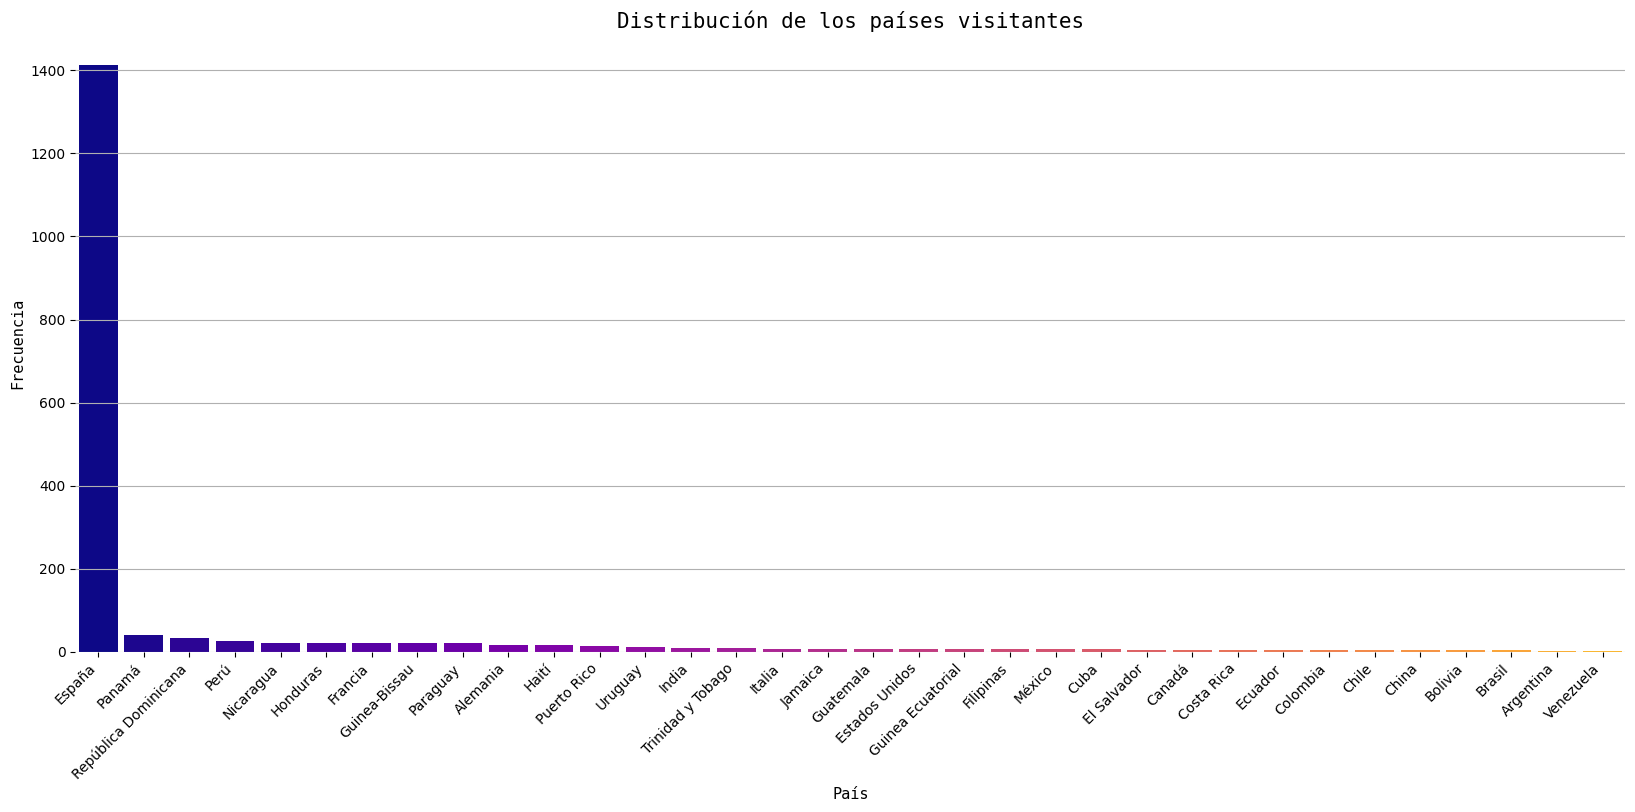

In [ ]:
plt.figure(figsize=(20, 8))
#con np generamos lista de 40 colores que siguen la secuencia de colores del colormap plasma
colores = plt.cm.plasma(np.linspace(0, 1, 40))
sns.barplot(x=visitantes_por_paises["procedencia"].value_counts().index, y=visitantes_por_paises["num_visitantes"], palette=colores, saturation = 1.15, width=0.85)
plt.title('Distribución de los países visitantes', fontsize=15, fontfamily="monospace")
plt.xlabel('País', fontsize=11, fontfamily="monospace")
plt.ylabel('Frecuencia', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.box(False)
plt.show()

Las siguientes líneas están basadas en la siguiente docu:
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html (apartado Control grouped column(s) placement with group_keys y Splitting an object into groups)
https://realpython.com/python-lambda/

In [ ]:
visitantes_por_paises["porcentaje_visitantes"] = visitantes_por_paises['num_visitantes']/visitantes_por_paises['num_visitantes'].sum()

In [ ]:
visitantes_por_paises["mercado"] = visitantes_por_paises["procedencia"].apply(lambda x: "España" if x == 'España' else 'Internacional')

In [ ]:
porcentaje_visitantes_paises = pd.DataFrame(visitantes_por_paises.groupby("mercado")["porcentaje_visitantes"].sum()).reset_index()

In [ ]:
porcentaje_visitantes_paises

mercado  porcentaje_visitantes
0         España               0.794266
1  Internacional               0.205734

In [ ]:
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#e6d7ff", "#696e6f", "#317f43"]

In [ ]:
fig_pie = px.pie(porcentaje_visitantes_paises,
                 names="mercado",
                 values="porcentaje_visitantes",
                 title="Porcentaje de visitantes según mercado",
                 color_discrete_sequence=colores,
                 hover_data=['porcentaje_visitantes'],
                 template='simple_white')

fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.update_layout(
    font={
        'family': "monospace",
        'size': 16
    },
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_family': "monospace",
        'font_size': 25,
        'font_color': 'black'
    },
    showlegend=False,
    height=600,
    width=800
)

fig_pie.show();

##Correlaciones

Para analizar la correlación, hemos decidido prescindir de los outliers en la matriz de correlación ya que estos pueden afectar de forma desproporcionada a la correlación, además, de esta forma buscamos que la correlación sea más robusta y mejoraremos la interpretabilidad.

In [ ]:
#calculamos rango intercuartilico para valores que sabemos que tienen outliers

print("Intervalo Rango Intercuartilico Tiempo de Espera:")
iqr_tiempo_espera = df_final["tiempo_espera"].quantile(0.75) - df_final["tiempo_espera"].quantile(0.25)
rango_tiempo_espera = df_final["tiempo_espera"].median() - 1.5*iqr_tiempo_espera, df_final["tiempo_espera"].median() + 1.5*iqr_tiempo_espera
print(rango_tiempo_espera)
print("------------------------------")

print("Intervalo Rango Intercuartilico Duracion:")
iqr_duracion = df_final["duracion"].quantile(0.75) - df_final["duracion"].quantile(0.25)
rango_duracion = df_final["duracion"].median() - 1.5*iqr_duracion, df_final["duracion"].median() + 1.5*iqr_duracion
print(rango_duracion)
print("------------------------------")


print("Intervalo Rango Intercuartilico Coste:")
iqr_coste = df_final["coste"].quantile(0.75) - df_final["coste"].quantile(0.25)
rango_coste = round(df_final["coste"].median() - 1.5*iqr_coste,2), round(df_final["coste"].median() + 1.5*iqr_coste,2)
print(rango_coste)
print("------------------------------")

Intervalo Rango Intercuartilico Tiempo de Espera:
(5.5, 20.5)
------------------------------
Intervalo Rango Intercuartilico Duracion:
(197.75, 511.25)
------------------------------
Intervalo Rango Intercuartilico Coste:
(6.91, 27.12)
------------------------------


In [ ]:
df_sin_outliers = df_final.copy()

In [ ]:
df_sin_outliers = df_sin_outliers[(df_sin_outliers["tiempo_espera"] >= 4.5) & (df_sin_outliers["tiempo_espera"] <= 19.5) &
                                  (df_sin_outliers["duracion"] >= 160) & (df_sin_outliers["duracion"] <= 550) &
                                  (df_sin_outliers["coste"] >= 6.93) & (df_sin_outliers["coste"] <= 27.09)]
df_sin_outliers.head(2)

t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   

   tiempo_espera procedencia id_visitante      tipo_entrada      coste  \
0              5      España            3        Pase Anual  14.003708   
1             11      España            3  Entrada Familiar  20.900902   

   antelacion_compra  valoracion emocion  tiempo_recogida  \
0                  0           2   angry              291   
1                  2           5   angry              180   

   tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  duracion  
0                   13                    10            2022-09-13     274.0  
1                    8                    19            2022-09-08     344.0

In [ ]:
corr_matrix = df_sin_outliers.corr()
corr_matrix

comienzo_atraccion  tiempo_espera     coste  \
comienzo_atraccion              1.000000       0.001629  0.008710   
tiempo_espera                   0.001629       1.000000  0.003572   
coste                           0.008710       0.003572  1.000000   
antelacion_compra               0.003940       0.005715  0.009656   
valoracion                     -0.000157       0.000690  0.010183   
tiempo_recogida                 0.997122       0.001561  0.007893   
tiempo_recogida_dia             0.996548       0.001546  0.008196   
tiempo_recogida_hora           -0.016327      -0.002064  0.009259   
duracion                       -0.006232       0.004999 -0.013530   

                      antelacion_compra  valoracion  tiempo_recogida  \
comienzo_atraccion             0.003940   -0.000157         0.997122   
tiempo_espera                  0.005715    0.000690         0.001561   
coste                          0.009656    0.010183         0.007893   
antelacion_compra              1.000000    0.013862         0.004032   
valoracion                     0.013862    1.000000        -0.001040   
tiempo_recogida                0.004032   -0.001040         1.000000   
tiempo_recogida_dia            0.004035   -0.000946         0.999437   
tiempo_recogida_hora           0.001815   -0.010450        -0.016548   
duracion                      -0.006034   -0.003268        -0.005720   

                      tiempo_recogida_dia  tiempo_recogida_hora  duracion  
comienzo_atraccion               0.996548             -0.016327 -0.006232  
tiempo_espera                    0.001546             -0.002064  0.004999  
coste                            0.008196              0.009259 -0.013530  
antelacion_compra                0.004035              0.001815 -0.006034  
valoracion                      -0.000946             -0.010450 -0.003268  
tiempo_recogida                  0.999437             -0.016548 -0.005720  
tiempo_recogida_dia              1.000000             -0.019169 -0.005970  
tiempo_recogida_hora            -0.019169              1.000000 -0.005527  
duracion                        -0.005970             -0.005527  1.000000

In [ ]:
#creamos mask para solo dejar el triangulo de abajo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

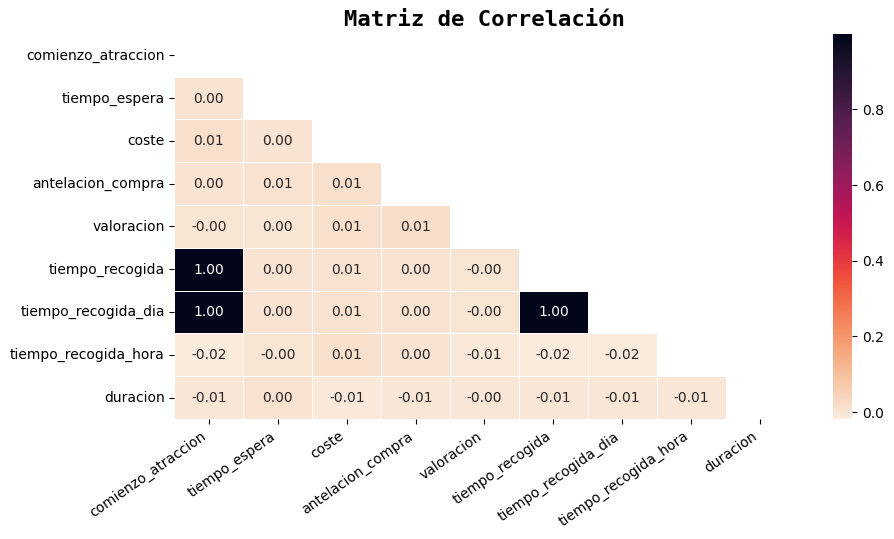

In [ ]:
plt.figure(figsize=(10, 5))

corr_heatmap = sns.heatmap(corr_matrix, cmap="rocket_r", annot=True, mask=mask, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación', fontsize=16, fontweight="bold",fontfamily="monospace")
corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.show()


Después de analizar la matriz de correlación, hemos llegado a la conclusión de que no existe correlación entre las métricas, a excepción del tiempo de recogida y el comienzo de la atracción. Si nos referimos a sus definiciones, el comienzo de la atracción es el momento en que el visitante se sube a la atracción de la que se tomó la foto, mientras que el tiempo de recogida es el momento en que se toma la fotografía. Por lo tanto, tiene sentido que el día en que se tomó la fotografía sea el mismo día en que el visitante se subió a la atracción, justificando así la correlación entre estas dos métricas.

En cuanto al tiempo de recogida del día y el tiempo de recogida, también tiene sentido que estén relacionados, ya que el tiempo de recogida del día es simplemente una extracción del día del tiempo de recogida.

##Cálculo de estadísticos significativos

En esta sección, nos enfocaremos principalmente en nuestra variable más significativa, que es la emoción. A través de análisis estadísticos, buscamos examinar cómo las emociones varían en función de las demás métricas.

###Emoción predominante por atracción

In [ ]:
df_concatenado = pd.concat([df_atraccion_limpio.set_index("t_id"),
                        df_emocion_limpio.set_index("t_id")], axis=1)

df_emocion_por_atraccion = df_concatenado.groupby('atraccion')['emocion'].agg(pd.Series.mode)
df_emocion_por_atraccion

atraccion
Araña Saltarina                 happy
Aventuras Acuáticas             happy
Barco Pirata Misterioso         happy
Caravana de Aventuras           happy
Carrera de Autos Locos          happy
Carros Chocones Divertidos      happy
Carrusel Encantado              happy
Cascada Encantada               happy
Cine 4D Emocionante             happy
Circuito Veloz                  happy
Circus Fantástico               happy
Cohetes Galácticos              happy
Cúpula Estelar                  happy
Dragón Volador                  happy
Espejos de la Risueña           happy
Fiesta de los Dulces            happy
Gran Caída Libre                happy
Jardín de las Hadas             happy
Laberinto de Sueños             happy
Mansión Embrujada               happy
Montaña Rusa de la Luna         happy
Montaña del Misterio            happy
Mundo de las Maravillas         happy
Rueda de la Fortuna             happy
Rápido del Trueno               happy
Safari Salvaje                  happy
Se

###Emociones de las Top 10 atracciones

In [ ]:
#size  porque intentamos contar datos no numericos
atracciones_por_emocion = df_final.groupby(["emocion", "atraccion"])["id_visitante"].size().reset_index(name="conteo_visitante")
atracciones_por_emocion

emocion                     atraccion  conteo_visitante
0       angry               Araña Saltarina               121
1       angry           Aventuras Acuáticas               132
2       angry       Barco Pirata Misterioso               119
3       angry         Caravana de Aventuras               124
4       angry        Carrera de Autos Locos               122
..        ...                           ...               ...
240  surprise           Torbellino Espacial                89
241  surprise               Tren del Terror               101
242  surprise  Viaje al Centro de la Tierra                89
243  surprise                  Vuelo Mágico                87
244  surprise    Vuelta al Mundo en 80 Días                83

[245 rows x 3 columns]

In [ ]:
atracciones_por_emocion["porcentajes"] = atracciones_por_emocion["conteo_visitante"]/atracciones_por_emocion["conteo_visitante"].sum()
atracciones_por_emocion

emocion                     atraccion  conteo_visitante  porcentajes
0       angry               Araña Saltarina               121     0.004054
1       angry           Aventuras Acuáticas               132     0.004423
2       angry       Barco Pirata Misterioso               119     0.003987
3       angry         Caravana de Aventuras               124     0.004155
4       angry        Carrera de Autos Locos               122     0.004088
..        ...                           ...               ...          ...
240  surprise           Torbellino Espacial                89     0.002982
241  surprise               Tren del Terror               101     0.003384
242  surprise  Viaje al Centro de la Tierra                89     0.002982
243  surprise                  Vuelo Mágico                87     0.002915
244  surprise    Vuelta al Mundo en 80 Días                83     0.002781

[245 rows x 4 columns]

In [ ]:
atracciones_por_emocion = atracciones_por_emocion.sort_values(by="conteo_visitante", ascending=False)[:10]
atracciones_por_emocion

emocion                   atraccion  conteo_visitante  porcentajes
139   happy  Vuelta al Mundo en 80 Días               246     0.008243
114   happy              Circuito Veloz               237     0.007941
134   happy       Tobogán del Arco Iris               236     0.007908
120   happy        Fiesta de los Dulces               235     0.007874
125   happy     Montaña Rusa de la Luna               234     0.007841
116   happy          Cohetes Galácticos               231     0.007740
115   happy           Circus Fantástico               223     0.007472
133   happy            Tirolina Extrema               222     0.007439
124   happy           Mansión Embrujada               220     0.007372
123   happy         Laberinto de Sueños               219     0.007338

In [ ]:
atracciones_por_emocion2 = atracciones_por_emocion.sort_values(by="porcentajes", ascending=False)[:10]
atracciones_por_emocion2

emocion                   atraccion  conteo_visitante  porcentajes
139   happy  Vuelta al Mundo en 80 Días               246     0.008243
114   happy              Circuito Veloz               237     0.007941
134   happy       Tobogán del Arco Iris               236     0.007908
120   happy        Fiesta de los Dulces               235     0.007874
125   happy     Montaña Rusa de la Luna               234     0.007841
116   happy          Cohetes Galácticos               231     0.007740
115   happy           Circus Fantástico               223     0.007472
133   happy            Tirolina Extrema               222     0.007439
124   happy           Mansión Embrujada               220     0.007372
123   happy         Laberinto de Sueños               219     0.007338

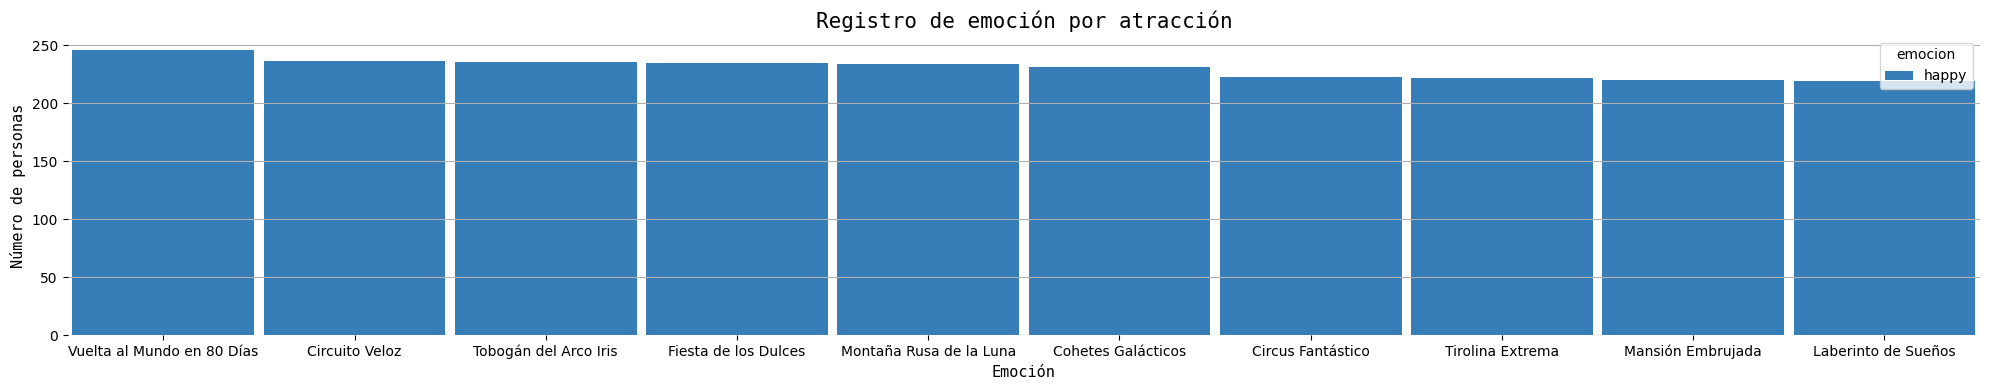

In [ ]:
plt.figure(figsize=(20, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="atraccion", y="conteo_visitante", hue="emocion", data=atracciones_por_emocion, palette = colores, saturation = 1.15, width=0.95)
plt.title('Registro de emoción por atracción', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Número de personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.tight_layout()
plt.show()

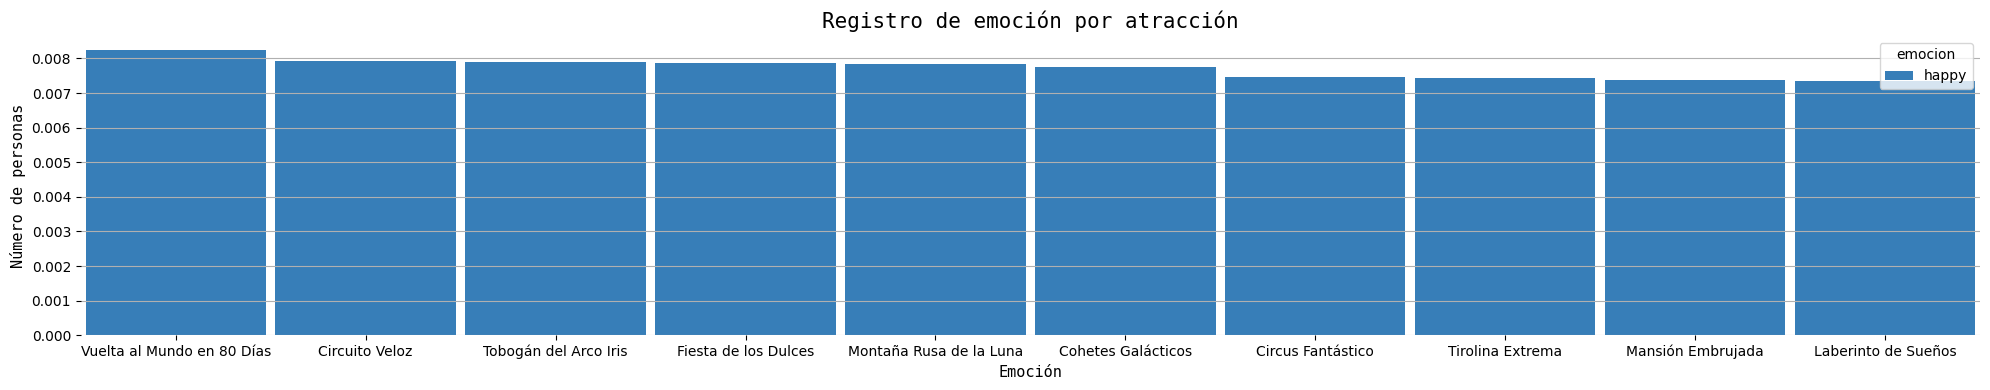

In [ ]:
plt.figure(figsize=(20, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="atraccion", y="porcentajes", hue="emocion", data=atracciones_por_emocion2, palette = colores, saturation = 1.15, width=0.95)
plt.title('Registro de emoción por atracción', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Número de personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.tight_layout()
plt.show()

A partir de estos gráficos, se puede concluir que de las 10 atracciones que más visitantes han recibido, a todos los visitantes se les registró la emoción de felicidad.

###Emoción por tiempo de espera

In [ ]:
espera_por_emocion = df_final.groupby(["emocion", "tiempo_espera"]).size().reset_index(name='count')
espera_por_emocion

emocion  tiempo_espera  count
0       angry              0      7
1       angry              1      6
2       angry              2     10
3       angry              3     21
4       angry              4     40
..        ...            ...    ...
181  surprise             22     27
182  surprise             23     13
183  surprise             24      5
184  surprise             25      4
185  surprise             26      1

[186 rows x 3 columns]

In [ ]:
espera_max = espera_por_emocion.groupby("emocion")['count'].idxmax()
espera_max

emocion
angry        12
disgust      38
fear         63
happy        91
neutral     118
sad         145
surprise    171
Name: count, dtype: int64

In [ ]:
emocion_por_tiempo_espera = espera_por_emocion.loc[espera_max].sort_values(by='count', ascending=False)
emocion_por_tiempo_espera

emocion  tiempo_espera  count
91      happy             13    758
118   neutral             12    594
145       sad             13    526
12      angry             12    447
63       fear             12    430
171  surprise             12    365
38    disgust             12     53

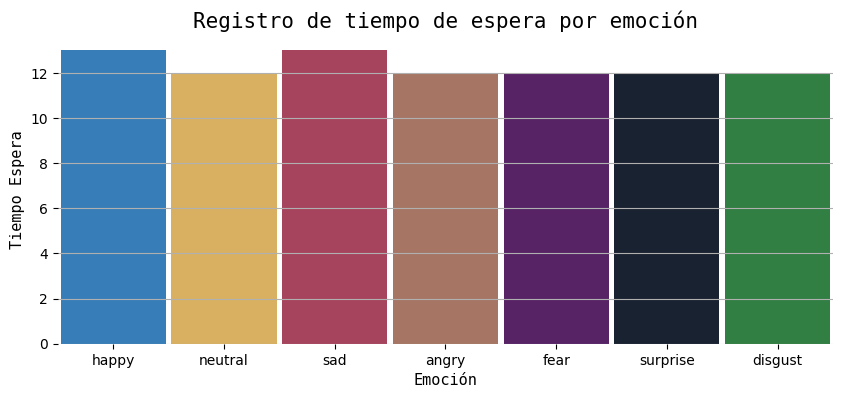

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="emocion", y= "tiempo_espera", data=emocion_por_tiempo_espera, palette = colores, saturation = 1.15, width=0.95)
plt.title('Registro de tiempo de espera por emoción', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Tiempo Espera', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()

A diferencia de la suposición inicial de que el tiempo de espera podría influir en la emoción percibida por los visitantes, no se observa un indicio claro que respalde esta hipótesis. Se han registrado diversas emociones incluso cuando el tiempo de espera es máximo, el cual se ha mantenido constante en 12, lo que sugiere que otros factores podrían estar influyendo en la experiencia emocional de los visitantes, independientemente del tiempo de espera.

###Las top 10 emociones recibidas por los diferentes países

In [ ]:
pais_por_emocion = pais_por_emocion = df_final[df_final["procedencia"] == "España"].groupby(["emocion", "procedencia"]).size().reset_index(name='count').sort_values(by='count', ascending=False)[:10]
pais_por_emocion

emocion procedencia  count
3     happy      España   7045
4   neutral      España   4733
5       sad      España   4483
2      fear      España   4081
0     angry      España   3987
6  surprise      España   2846
1   disgust      España    432

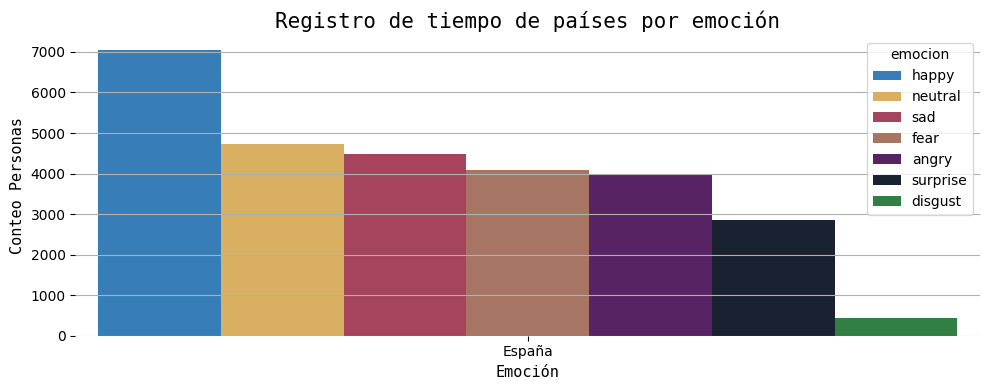

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="procedencia", y="count", hue="emocion", data=pais_por_emocion, palette = colores, saturation = 1.15, width=0.95)
plt.title('Registro de tiempo de países por emoción', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Conteo Personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.tight_layout()
plt.show()

In [ ]:
pais_por_emocion2 = df_final[df_final["procedencia"] != "España"].groupby(["emocion", "procedencia"]).size().reset_index(name='count').sort_values(by='count', ascending=False)[:10]
pais_por_emocion2


emocion procedencia  count
142       sad    Alemania    101
78      happy    Alemania     92
175  surprise    Alemania     80
110   neutral    Alemania     79
143       sad   Argentina     78
111   neutral   Argentina     60
79      happy   Argentina     56
85      happy    Colombia     55
176  surprise   Argentina     54
83      happy       Chile     54

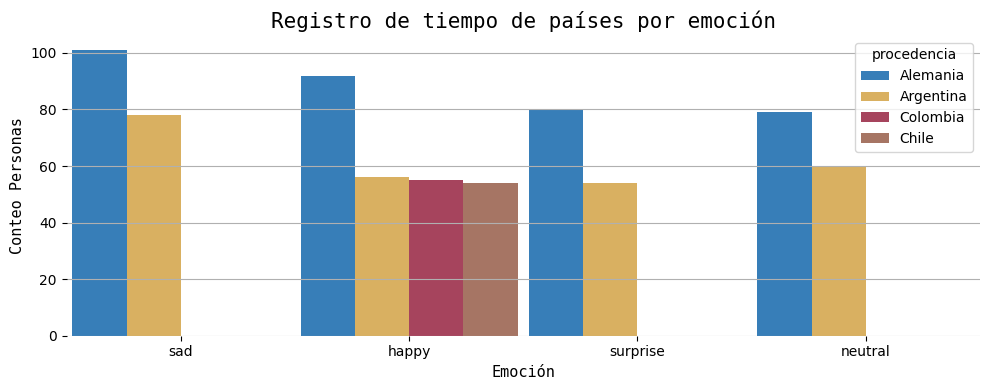

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="emocion", y="count", hue="procedencia", data=pais_por_emocion2, palette = colores, saturation = 1.15, width=0.95)
plt.title('Registro de tiempo de países por emoción', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Conteo Personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.tight_layout()
plt.show()

Dentro de nuestro dataset, el hecho de que España sea el país que más ha registrado todas las emociones no resulta sorprendente, dado que la mayoría de los visitantes provienen de España. Para comprender mejor las emociones registradas por visitantes de otros países, hemos explorado las emociones más frecuentes en aquellos que no son de España. Según el segundo gráfico, observamos que las personas que más han registrado felicidad provienen de Alemania al igual que las de tristeza y neutral seguido muy de cerca por Argentina.

###Dentro de valoración 0, cuáles han sido las emociones más repetidas

In [ ]:
emocion_0 = df_final[df_final["valoracion"] == 0].groupby(["emocion"]).size().reset_index(name='count').sort_values(by='count', ascending=False)
emocion_0

emocion  count
3     happy    654
4   neutral    497
5       sad    454
2      fear    379
0     angry    378
6  surprise    306
1   disgust     43

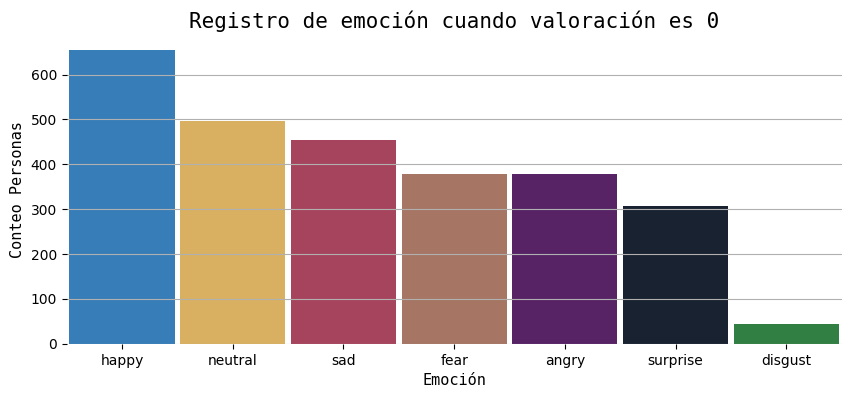

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="emocion", y="count", data=emocion_0, palette=colores, saturation=1.15, width=0.95)
plt.title('Registro de emoción cuando valoración es 0', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Conteo Personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()


In [ ]:
#creemos que es conveniente analizar esto de forma relativa. Procedemos a calcular el porcentaje de, por emoción, cuantos visitantes dieron una puntuación de 0
#primero contamos cuantos registros hay de cada emoción
conteo_emociones = df_final['emocion'].value_counts().reset_index()
conteo_emociones = conteo_emociones.rename(columns={'index': 'emocion', 'emocion': 'conteo_emocion'})
conteo_emociones

emocion  conteo_emocion
0     happy            7733
1   neutral            5361
2       sad            5192
3      fear            4390
4     angry            4267
5  surprise            3418
6   disgust             463

In [ ]:
#luego cuantos registros hay de cada una de estas emociones en los que la valoración haya sido 0
df_emociones_valoracion_0 = df_final[df_final["valoracion"] == 0].groupby("emocion")["valoracion"].count().reset_index(name='valoracion_0')
df_emociones_valoracion_0

emocion  valoracion_0
0     angry           378
1   disgust            43
2      fear           379
3     happy           654
4   neutral           497
5       sad           454
6  surprise           306

In [ ]:
df_conteo_emociones = pd.merge(conteo_emociones, df_emociones_valoracion_0, on='emocion')
df_conteo_emociones

emocion  conteo_emocion  valoracion_0
0     happy            7733           654
1   neutral            5361           497
2       sad            5192           454
3      fear            4390           379
4     angry            4267           378
5  surprise            3418           306
6   disgust             463            43

In [ ]:
df_conteo_emociones['porcentaje_valoracion_0'] = round((df_conteo_emociones['valoracion_0'] / df_conteo_emociones['conteo_emocion']) * 100, 2)
df_conteo_emociones

emocion  conteo_emocion  valoracion_0  porcentaje_valoracion_0
0     happy            7733           654                     8.46
1   neutral            5361           497                     9.27
2       sad            5192           454                     8.74
3      fear            4390           379                     8.63
4     angry            4267           378                     8.86
5  surprise            3418           306                     8.95
6   disgust             463            43                     9.29

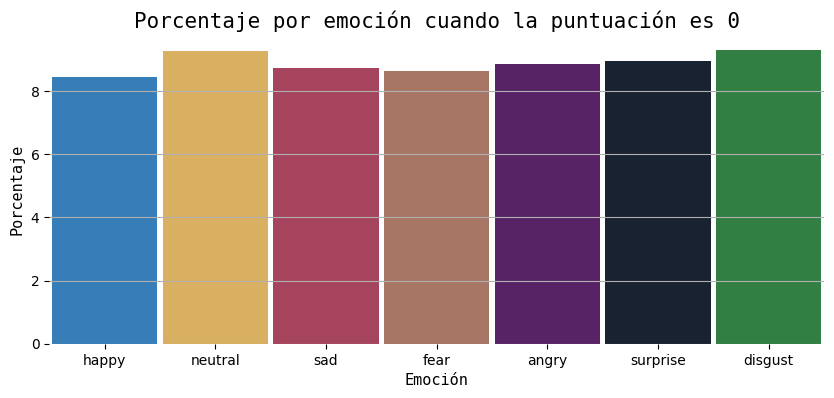

In [ ]:
#a continuacion vamos a hacer un grafico para ilustrar, en cada emoción cuanta proporción de visitantes dieron una puntuación de 0
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x=df_conteo_emociones["emocion"], y=df_conteo_emociones["porcentaje_valoracion_0"], palette=colores, saturation = 1.15, width=0.95)
plt.title('Porcentaje por emoción cuando la puntuación es 0', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Porcentaje', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()

Podemos observar, que en términos relativos, no se aprecian grandes diferencias en cuanto a las emociones. Esto es, centrándose en los visitantes que dieron una puntuación de 0, no hay emociones que destacan, al menos según nuestros registros. En el anterior gráfico, que estaba generado sobre los números absolutos, sí que se observaban diferencias, pero eso se debía a la mayor frecuencia de ciertas emociones sobre otras.

###Dentro de valoracion 10, cuales han sido las emociones mas repetidas

In [ ]:
emocion_10 = df_final[df_final["valoracion"] == 10].groupby(["emocion"]).size().reset_index(name='count').sort_values(by='count', ascending=False)
emocion_10

emocion  count
3     happy    701
4   neutral    462
5       sad    438
2      fear    428
0     angry    380
6  surprise    300
1   disgust     43

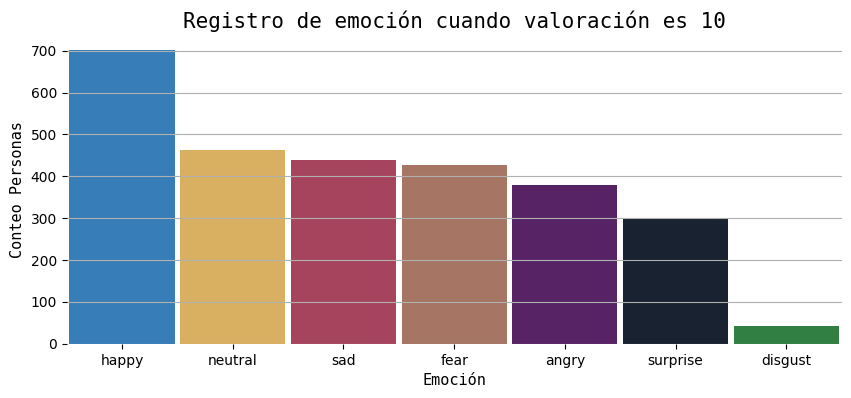

In [ ]:
plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x="emocion", y="count", data=emocion_10, palette=colores, saturation=1.15, width=0.95)
plt.title('Registro de emoción cuando valoración es 10', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Conteo Personas', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()


In [ ]:
#al igual que en el caso de la valoración 0, creemos que es conveniente analizar esto de forma relativa. Procedemos a calcular el porcentaje de, por emoción, cuantos visitantes dieron una puntuación de 0
df_emociones_valoracion_10 = df_final[df_final["valoracion"] == 10].groupby("emocion")["valoracion"].count().reset_index(name='valoracion_10')
df_emociones_valoracion_10

emocion  valoracion_10
0     angry            380
1   disgust             43
2      fear            428
3     happy            701
4   neutral            462
5       sad            438
6  surprise            300

In [ ]:
df_conteo_emociones_2 = pd.merge(conteo_emociones, df_emociones_valoracion_10, on='emocion')
df_conteo_emociones_2

emocion  conteo_emocion  valoracion_10
0     happy            7733            701
1   neutral            5361            462
2       sad            5192            438
3      fear            4390            428
4     angry            4267            380
5  surprise            3418            300
6   disgust             463             43

In [ ]:
df_conteo_emociones_2['porcentaje_valoracion_10'] = round((df_conteo_emociones_2['valoracion_10'] / df_conteo_emociones_2['conteo_emocion']) * 100, 2)
df_conteo_emociones_2

emocion  conteo_emocion  valoracion_10  porcentaje_valoracion_10
0     happy            7733            701                      9.07
1   neutral            5361            462                      8.62
2       sad            5192            438                      8.44
3      fear            4390            428                      9.75
4     angry            4267            380                      8.91
5  surprise            3418            300                      8.78
6   disgust             463             43                      9.29

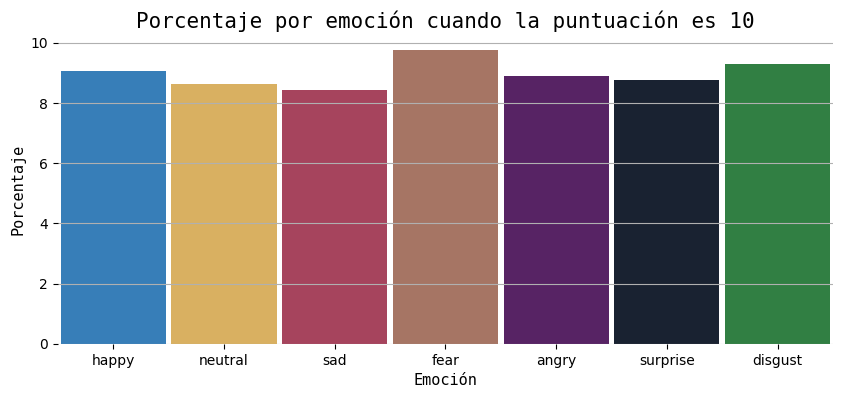

In [ ]:
#a continuacion vamos a hacer un grafico para ilustrar, en cada emoción cuanta proporción de visitantes dieron una puntuación de 10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
colores = ["#377eb8", "#d9b061", "#a6445d", "#a67564", "#572364", "#192231", "#317f43"]
sns.barplot(x=df_conteo_emociones_2["emocion"], y=df_conteo_emociones_2["porcentaje_valoracion_10"], palette=colores, saturation = 1.15, width=0.95)
plt.title('Porcentaje por emoción cuando la puntuación es 10', fontsize=15, fontfamily="monospace")
plt.xlabel('Emoción', fontsize=11, fontfamily="monospace")
plt.ylabel('Porcentaje', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.show()

Como sucede en los casos de las puntuaciones de 0, en términos relativos, no se aprecian grandes diferencias en cuanto a las emociones. Esto, volvemos a señalar, representa un notable contraste respecto a la anterior gráfica de datos absolutos, donde sí se dan grandes diferencias entre las emociones, que tienen que ver con la desigual frecuencia de cada una de estas.
Sí que es un tanto llamativo que fear sea, en porcentaje, la emoción más destacada de aquellos visitantes que puntuaron 10, pero lo cierto es que es una diferencia poco significativa.

###Estadísticos fuera de emociones

#####Tipos de entrada y precio

In [ ]:
df_sample = df_final.sample(6000)

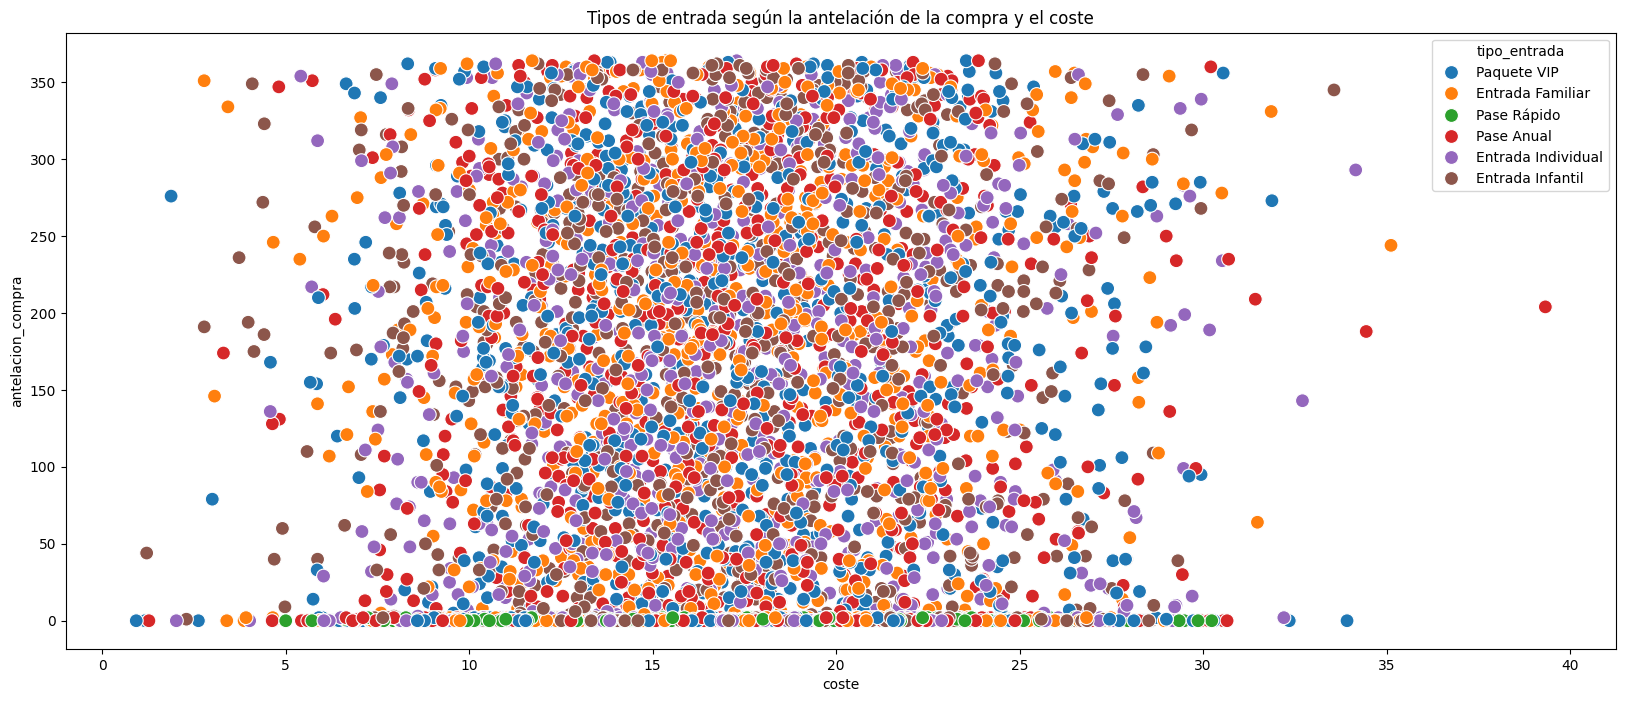

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='coste', y='antelacion_compra', data=df_sample,
                hue = "tipo_entrada",
                s=100)
plt.title('Tipos de entrada según la antelación de la compra y el coste')
plt.show()

#5. Exportación de tablas

##Creación de tabla maestra atracciones

In [ ]:
df_atraccion_merge["atraccion_code"] = df_atraccion_merge.groupby("atraccion").ngroup()+1

In [ ]:
df_atraccion_merge["atraccion_code"] = df_atraccion_merge["atraccion_code"].astype("Int64")

In [ ]:
df_atraccion_merge.head()

t_id                atraccion  comienzo_atraccion  \
0  Training_10118481.jpg  Montaña Rusa de la Luna                 291   
1  Training_15361067.jpg        Mansión Embrujada                 180   
2  Training_16232328.jpg    Simulador Espacial 3D                 384   
3  Training_27705571.jpg     Fiesta de los Dulces                 625   
4  Training_63766171.jpg         Gran Caída Libre                 613   

   tiempo_espera  atraccion_code  
0              5              21  
1             11              20  
2             19              28  
3              9              16  
4             17              17

In [ ]:
df_atraccion_copia = df_atraccion_merge.copy()

In [ ]:
df_atraccion_merge.drop("atraccion", axis = 1, inplace = True)
df_atraccion_merge

t_id  comienzo_atraccion  tiempo_espera  \
0        Training_10118481.jpg                 291              5   
1        Training_15361067.jpg                 180             11   
2        Training_16232328.jpg                 384             19   
3        Training_27705571.jpg                 625              9   
4        Training_63766171.jpg                 613             17   
...                        ...                 ...            ...   
35882   PublicTest_2529039.jpg                 421             18   
35883  PublicTest_27916929.jpg                 185             18   
35884  PublicTest_64107181.jpg                 106             16   
35885  PublicTest_81098275.jpg                 679             16   
35886  PublicTest_94828377.jpg                 417             13   

       atraccion_code  
0                  21  
1                  20  
2                  28  
3                  16  
4                  17  
...               ...  
35882              15  
35883              25  
35884               7  
35885              20  
35886            <NA>  

[35751 rows x 4 columns]

In [ ]:
df_atraccion_copia.drop_duplicates(subset="atraccion", inplace = True)
df_atraccion_copia

t_id                     atraccion  \
0       Training_10118481.jpg       Montaña Rusa de la Luna   
1       Training_15361067.jpg             Mansión Embrujada   
2       Training_16232328.jpg         Simulador Espacial 3D   
3       Training_27705571.jpg          Fiesta de los Dulces   
4       Training_63766171.jpg              Gran Caída Libre   
5       Training_66555113.jpg           Cine 4D Emocionante   
6       Training_81499267.jpg         Tobogán del Arco Iris   
7       Training_94007493.jpg                  Vuelo Mágico   
8       Training_12950225.jpg               Araña Saltarina   
11      Training_65820611.jpg       Mundo de las Maravillas   
18      Training_72798447.jpg            Cohetes Galácticos   
20      Training_83065372.jpg                Safari Salvaje   
21      Training_87355987.jpg       Barco Pirata Misterioso   
22      Training_88196061.jpg          Montaña del Misterio   
24      Training_36501565.jpg               Selva Encantada   
26      Training_53305606.jpg           Jardín de las Hadas   
28      Training_61325993.jpg         Espejos de la Risueña   
30      Training_75082078.jpg           Laberinto de Sueños   
31    PublicTest_43074366.jpg                Dragón Volador   
34   PrivateTest_92593957.jpg    Carros Chocones Divertidos   
36      Training_10120469.jpg            Carrusel Encantado   
37      Training_15848209.jpg  Viaje al Centro de la Tierra   
40       Training_2978709.jpg         Caravana de Aventuras   
41      Training_50449072.jpg             Cascada Encantada   
44       Training_8911067.jpg        Carrera de Autos Locos   
45      Training_19237812.jpg             Rápido del Trueno   
49      Training_99751984.jpg    Vuelta al Mundo en 80 Días   
54      Training_72647284.jpg                Cúpula Estelar   
56      Training_85932660.jpg                          None   
57      Training_91534280.jpg                Circuito Veloz   
66      Training_50683673.jpg           Aventuras Acuáticas   
77      Training_33408401.jpg              Tirolina Extrema   
78      Training_35899521.jpg             Circus Fantástico   
101     Training_21050219.jpg           Rueda de la Fortuna   
114     Training_51885310.jpg           Torbellino Espacial   
220     Training_40636222.jpg               Tren del Terror   

     comienzo_atraccion  tiempo_espera  atraccion_code  
0                   291              5              21  
1                   180             11              20  
2                   384             19              28  
3                   625              9              16  
4                   613             17              17  
5                   533             18               9  
6                   297             19              30  
7                    82              7              34  
8                   316              9               1  
11                  698              9              23  
18                  183              5              12  
20                  241             19              26  
21                  539             14               3  
22                  524             12              22  
24                  352             13              27  
26                  321             12              18  
28                  308              8              15  
30                  510             13              19  
31                  121             14              14  
34                  360             15               6  
36                  425             11               7  
37                  363             16              33  
40                  338             16               4  
41                  655              8               8  
44                  608              9               5  
45                  469             14              25  
49                   87              7              35  
54                  420             14              13  
56                  596              4  

In [ ]:
df_atraccion_copia.reset_index()

index                      t_id                     atraccion  \
0       0     Training_10118481.jpg       Montaña Rusa de la Luna   
1       1     Training_15361067.jpg             Mansión Embrujada   
2       2     Training_16232328.jpg         Simulador Espacial 3D   
3       3     Training_27705571.jpg          Fiesta de los Dulces   
4       4     Training_63766171.jpg              Gran Caída Libre   
5       5     Training_66555113.jpg           Cine 4D Emocionante   
6       6     Training_81499267.jpg         Tobogán del Arco Iris   
7       7     Training_94007493.jpg                  Vuelo Mágico   
8       8     Training_12950225.jpg               Araña Saltarina   
9      11     Training_65820611.jpg       Mundo de las Maravillas   
10     18     Training_72798447.jpg            Cohetes Galácticos   
11     20     Training_83065372.jpg                Safari Salvaje   
12     21     Training_87355987.jpg       Barco Pirata Misterioso   
13     22     Training_88196061.jpg          Montaña del Misterio   
14     24     Training_36501565.jpg               Selva Encantada   
15     26     Training_53305606.jpg           Jardín de las Hadas   
16     28     Training_61325993.jpg         Espejos de la Risueña   
17     30     Training_75082078.jpg           Laberinto de Sueños   
18     31   PublicTest_43074366.jpg                Dragón Volador   
19     34  PrivateTest_92593957.jpg    Carros Chocones Divertidos   
20     36     Training_10120469.jpg            Carrusel Encantado   
21     37     Training_15848209.jpg  Viaje al Centro de la Tierra   
22     40      Training_2978709.jpg         Caravana de Aventuras   
23     41     Training_50449072.jpg             Cascada Encantada   
24     44      Training_8911067.jpg        Carrera de Autos Locos   
25     45     Training_19237812.jpg             Rápido del Trueno   
26     49     Training_99751984.jpg    Vuelta al Mundo en 80 Días   
27     54     Training_72647284.jpg                Cúpula Estelar   
28     56     Training_85932660.jpg                          None   
29     57     Training_91534280.jpg                Circuito Veloz   
30     66     Training_50683673.jpg           Aventuras Acuáticas   
31     77     Training_33408401.jpg              Tirolina Extrema   
32     78     Training_35899521.jpg             Circus Fantástico   
33    101     Training_21050219.jpg           Rueda de la Fortuna   
34    114     Training_51885310.jpg           Torbellino Espacial   
35    220     Training_40636222.jpg               Tren del Terror   

    comienzo_atraccion  tiempo_espera  atraccion_code  
0                  291              5              21  
1                  180             11              20  
2                  384             19              28  
3                  625              9              16  
4                  613             17              17  
5                  533             18               9  
6                  297             19              30  
7                   82              7              34  
8                  316              9               1  
9                  698              9              23  
10                 183              5              12  
11                 241             19              26  
12                 539             14               3  
13                 524             12              22  
14                 352             13              27  
15                 321             12              18  
16                 308              8              15  
17                 510             13              19  
18                 121             14              14  
19                 360             15               6  
20                 425             11               7  
21                 363             16              33  
22                 338             16               4  
23                 655              8               8  
24                 608              9             

In [ ]:
df_atraccion_maestra = df_atraccion_copia[['atraccion', 'atraccion_code']].reset_index()
df_atraccion_maestra.drop("index", axis = 1, inplace = True)
df_atraccion_maestra

atraccion  atraccion_code
0        Montaña Rusa de la Luna              21
1              Mansión Embrujada              20
2          Simulador Espacial 3D              28
3           Fiesta de los Dulces              16
4               Gran Caída Libre              17
5            Cine 4D Emocionante               9
6          Tobogán del Arco Iris              30
7                   Vuelo Mágico              34
8                Araña Saltarina               1
9        Mundo de las Maravillas              23
10            Cohetes Galácticos              12
11                Safari Salvaje              26
12       Barco Pirata Misterioso               3
13          Montaña del Misterio              22
14               Selva Encantada              27
15           Jardín de las Hadas              18
16         Espejos de la Risueña              15
17           Laberinto de Sueños              19
18                Dragón Volador              14
19    Carros Chocones Divertidos               6
20            Carrusel Encantado               7
21  Viaje al Centro de la Tierra              33
22         Caravana de Aventuras               4
23             Cascada Encantada               8
24        Carrera de Autos Locos               5
25             Rápido del Trueno              25
26    Vuelta al Mundo en 80 Días              35
27                Cúpula Estelar              13
28                          None            <NA>
29                Circuito Veloz              10
30           Aventuras Acuáticas               2
31              Tirolina Extrema              29
32             Circus Fantástico              11
33           Rueda de la Fortuna              24
34           Torbellino Espacial              31
35               Tren del Terror              32

In [ ]:
df_atraccion_maestra_def = df_atraccion_maestra.sort_values(by = "atraccion_code")
df_atraccion_maestra_def

atraccion  atraccion_code
8                Araña Saltarina               1
30           Aventuras Acuáticas               2
12       Barco Pirata Misterioso               3
22         Caravana de Aventuras               4
24        Carrera de Autos Locos               5
19    Carros Chocones Divertidos               6
20            Carrusel Encantado               7
23             Cascada Encantada               8
5            Cine 4D Emocionante               9
29                Circuito Veloz              10
32             Circus Fantástico              11
10            Cohetes Galácticos              12
27                Cúpula Estelar              13
18                Dragón Volador              14
16         Espejos de la Risueña              15
3           Fiesta de los Dulces              16
4               Gran Caída Libre              17
15           Jardín de las Hadas              18
17           Laberinto de Sueños              19
1              Mansión Embrujada              20
0        Montaña Rusa de la Luna              21
13          Montaña del Misterio              22
9        Mundo de las Maravillas              23
33           Rueda de la Fortuna              24
25             Rápido del Trueno              25
11                Safari Salvaje              26
14               Selva Encantada              27
2          Simulador Espacial 3D              28
31              Tirolina Extrema              29
6          Tobogán del Arco Iris              30
34           Torbellino Espacial              31
35               Tren del Terror              32
21  Viaje al Centro de la Tierra              33
7                   Vuelo Mágico              34
26    Vuelta al Mundo en 80 Días              35
28                          None            <NA>

In [ ]:
df_atraccion_maestra_def.to_csv("tabla_maestra_atracciones.csv")

##Creación de tabla maestra tipo_entrada

In [ ]:
df_ticket_limpio["entrada_code"] = df_ticket_limpio.groupby("tipo_entrada").ngroup()+1

In [ ]:
df_ticket_limpio.head()


id_visitante                   t_id      tipo_entrada      coste  \
0            3  Training_10118481.jpg        Pase Anual  14.003708   
1            3  Training_15361067.jpg  Entrada Familiar  20.900902   
2            3  Training_16232328.jpg  Entrada Infantil  12.638039   
3            3  Training_27705571.jpg       Paquete VIP  18.491775   
4            3  Training_63766171.jpg  Entrada Familiar  18.233458   

   antelacion_compra  entrada_code  
0                  0             5  
1                  2             1  
2                218             3  
3                 39             4  
4                135             1

In [ ]:
df_ticket_copia = df_ticket_limpio.copy()

In [ ]:
df_ticket_limpio.drop("tipo_entrada", axis = 1, inplace = True)

In [ ]:
df_ticket_limpio

id_visitante                     t_id      coste  antelacion_compra  \
0                3    Training_10118481.jpg  14.003708                  0   
1                3    Training_15361067.jpg  20.900902                  2   
2                3    Training_16232328.jpg  12.638039                218   
3                3    Training_27705571.jpg  18.491775                 39   
4                3    Training_63766171.jpg  18.233458                135   
...            ...                      ...        ...                ...   
35882         1783   PublicTest_2529039.jpg  18.443278                265   
35883         1784  PublicTest_27916929.jpg  11.500348                 42   
35884         1785  PublicTest_64107181.jpg  13.871069                  0   
35885         1786  PublicTest_81098275.jpg  16.697862                 23   
35886         1787  PublicTest_94828377.jpg  21.836315                208   

       entrada_code  
0                 5  
1                 1  
2                 3  
3                 4  
4                 1  
...             ...  
35882             2  
35883             2  
35884             2  
35885             1  
35886             4  

[32090 rows x 5 columns]

In [ ]:
df_ticket_copia.drop_duplicates(subset="tipo_entrada", inplace = True)
df_ticket_copia

id_visitante                   t_id        tipo_entrada      coste  \
0             3  Training_10118481.jpg          Pase Anual  14.003708   
1             3  Training_15361067.jpg    Entrada Familiar  20.900902   
2             3  Training_16232328.jpg    Entrada Infantil  12.638039   
3             3  Training_27705571.jpg         Paquete VIP  18.491775   
12            3   Training_8397060.jpg         Pase Rápido  13.943190   
21            3  Training_87355987.jpg  Entrada Individual  18.957712   

    antelacion_compra  entrada_code  
0                   0             5  
1                   2             1  
2                 218             3  
3                  39             4  
12                  3             6  
21                  1             2

In [ ]:
df_ticket_copia.reset_index()

index id_visitante                   t_id        tipo_entrada      coste  \
0      0            3  Training_10118481.jpg          Pase Anual  14.003708   
1      1            3  Training_15361067.jpg    Entrada Familiar  20.900902   
2      2            3  Training_16232328.jpg    Entrada Infantil  12.638039   
3      3            3  Training_27705571.jpg         Paquete VIP  18.491775   
4     12            3   Training_8397060.jpg         Pase Rápido  13.943190   
5     21            3  Training_87355987.jpg  Entrada Individual  18.957712   

   antelacion_compra  entrada_code  
0                  0             5  
1                  2             1  
2                218             3  
3                 39             4  
4                  3             6  
5                  1             2

In [ ]:
df_tipo_entrada_maestra = df_ticket_copia[['tipo_entrada', 'entrada_code']].reset_index()
df_tipo_entrada_maestra.drop("index", axis = 1, inplace = True)
df_tipo_entrada_maestra

tipo_entrada  entrada_code
0          Pase Anual             5
1    Entrada Familiar             1
2    Entrada Infantil             3
3         Paquete VIP             4
4         Pase Rápido             6
5  Entrada Individual             2

In [ ]:
df_tipo_entrada_maestra_def = df_tipo_entrada_maestra.sort_values(by = "entrada_code")
df_tipo_entrada_maestra_def

tipo_entrada  entrada_code
1    Entrada Familiar             1
5  Entrada Individual             2
2    Entrada Infantil             3
3         Paquete VIP             4
0          Pase Anual             5
4         Pase Rápido             6

In [ ]:
df_tipo_entrada_maestra_def.to_csv("tabla_maestra_tipo_entrada.csv")

##Creación de tabla maestra procedencia

In [ ]:
df_procedencia_merge["procedencia_code"] = df_procedencia_merge.groupby("procedencia").ngroup()+1

In [ ]:
df_procedencia_merge.head()

t_id procedencia  procedencia_code
0  Training_10118481.jpg      España                13
1  Training_15361067.jpg      España                13
2  Training_16232328.jpg      España                13
3  Training_27705571.jpg      España                13
4  Training_63766171.jpg      España                13

In [ ]:
df_procedencia_copia = df_procedencia_merge.copy()

In [ ]:
df_procedencia_merge.drop("procedencia", axis = 1, inplace = True)
df_procedencia_merge

t_id  procedencia_code
0        Training_10118481.jpg                13
1        Training_15361067.jpg                13
2        Training_16232328.jpg                13
3        Training_27705571.jpg                13
4        Training_63766171.jpg                13
...                        ...               ...
35882   PublicTest_2529039.jpg                13
35883  PublicTest_27916929.jpg                15
35884  PublicTest_64107181.jpg                 1
35885  PublicTest_81098275.jpg                15
35886  PublicTest_94828377.jpg                16

[35883 rows x 2 columns]

In [ ]:
df_procedencia_copia.drop_duplicates(subset="procedencia", inplace = True)
df_procedencia_copia

t_id           procedencia  procedencia_code
0      Training_10118481.jpg                España                13
1111   Training_11175213.jpg               Bolivia                 3
2667   Training_12168970.jpg                Panamá                27
3246   Training_12776681.jpg            Costa Rica                 9
3266   Training_12812647.jpg                 Chile                 6
3881   Training_13790669.jpg           El Salvador                12
4649   Training_14566179.jpg                 India                22
4826   Training_14823194.jpg              Paraguay                28
6457   Training_18403526.jpg              Alemania                 1
8079   Training_23242376.jpg               Ecuador                11
9454   Training_26848938.jpg                 China                 7
11197    Training_332231.jpg             Nicaragua                26
11540  Training_35790553.jpg               Jamaica                24
13769  Training_48093772.jpg                Canadá                 5
14163  Training_50198953.jpg              Honduras                21
15869  Training_64706269.jpg             Filipinas                15
17572  Training_78857853.jpg           Puerto Rico                30
17696  Training_79677205.jpg             Argentina                 2
19015  Training_92579312.jpg                  Cuba                10
20933  Training_14603239.jpg                Brasil                 4
21034  Training_17137456.jpg        Estados Unidos                14
21362   Training_2120718.jpg             Guatemala                17
21415  Training_21639229.jpg              Colombia                 8
24829  Training_76404929.jpg     Guinea Ecuatorial                18
25271  Training_84941007.jpg               Uruguay                33
27224  Training_26746805.jpg                  Perú                29
27632  Training_36038825.jpg                México                25
28944  Training_56041772.jpg  República Dominicana                31
30039  Training_75818211.jpg               Francia                16
31608  Training_23119822.jpg             Venezuela                34
31809  Training_27926223.jpg                 Haití                20
31827  Training_28115268.jpg     Trinidad y Tobago                32
34097  Training_50512497.jpg         Guinea-Bissau                19
34879  Training_26017839.jpg                Italia                23

In [ ]:
df_procedencia_copia.reset_index()

index                   t_id           procedencia  procedencia_code
0       0  Training_10118481.jpg                España                13
1    1111  Training_11175213.jpg               Bolivia                 3
2    2667  Training_12168970.jpg                Panamá                27
3    3246  Training_12776681.jpg            Costa Rica                 9
4    3266  Training_12812647.jpg                 Chile                 6
5    3881  Training_13790669.jpg           El Salvador                12
6    4649  Training_14566179.jpg                 India                22
7    4826  Training_14823194.jpg              Paraguay                28
8    6457  Training_18403526.jpg              Alemania                 1
9    8079  Training_23242376.jpg               Ecuador                11
10   9454  Training_26848938.jpg                 China                 7
11  11197    Training_332231.jpg             Nicaragua                26
12  11540  Training_35790553.jpg               Jamaica                24
13  13769  Training_48093772.jpg                Canadá                 5
14  14163  Training_50198953.jpg              Honduras                21
15  15869  Training_64706269.jpg             Filipinas                15
16  17572  Training_78857853.jpg           Puerto Rico                30
17  17696  Training_79677205.jpg             Argentina                 2
18  19015  Training_92579312.jpg                  Cuba                10
19  20933  Training_14603239.jpg                Brasil                 4
20  21034  Training_17137456.jpg        Estados Unidos                14
21  21362   Training_2120718.jpg             Guatemala                17
22  21415  Training_21639229.jpg              Colombia                 8
23  24829  Training_76404929.jpg     Guinea Ecuatorial                18
24  25271  Training_84941007.jpg               Uruguay                33
25  27224  Training_26746805.jpg                  Perú                29
26  27632  Training_36038825.jpg                México                25
27  28944  Training_56041772.jpg  República Dominicana                31
28  30039  Training_75818211.jpg               Francia                16
29  31608  Training_23119822.jpg             Venezuela                34
30  31809  Training_27926223.jpg                 Haití                20
31  31827  Training_28115268.jpg     Trinidad y Tobago                32
32  34097  Training_50512497.jpg         Guinea-Bissau                19
33  34879  Training_26017839.jpg                Italia                23

In [ ]:
df_procedencia_maestra = df_procedencia_copia[['procedencia', 'procedencia_code']].reset_index()
df_procedencia_maestra.drop("index", axis = 1, inplace = True)
df_procedencia_maestra

procedencia  procedencia_code
0                 España                13
1                Bolivia                 3
2                 Panamá                27
3             Costa Rica                 9
4                  Chile                 6
5            El Salvador                12
6                  India                22
7               Paraguay                28
8               Alemania                 1
9                Ecuador                11
10                 China                 7
11             Nicaragua                26
12               Jamaica                24
13                Canadá                 5
14              Honduras                21
15             Filipinas                15
16           Puerto Rico                30
17             Argentina                 2
18                  Cuba                10
19                Brasil                 4
20        Estados Unidos                14
21             Guatemala                17
22              Colombia                 8
23     Guinea Ecuatorial                18
24               Uruguay                33
25                  Perú                29
26                México                25
27  República Dominicana                31
28               Francia                16
29             Venezuela                34
30                 Haití                20
31     Trinidad y Tobago                32
32         Guinea-Bissau                19
33                Italia                23

In [ ]:
df_procedencia_maestra_def = df_procedencia_maestra.sort_values(by = "procedencia_code")
df_procedencia_maestra_def

procedencia  procedencia_code
8               Alemania                 1
17             Argentina                 2
1                Bolivia                 3
19                Brasil                 4
13                Canadá                 5
4                  Chile                 6
10                 China                 7
22              Colombia                 8
3             Costa Rica                 9
18                  Cuba                10
9                Ecuador                11
5            El Salvador                12
0                 España                13
20        Estados Unidos                14
15             Filipinas                15
28               Francia                16
21             Guatemala                17
23     Guinea Ecuatorial                18
32         Guinea-Bissau                19
30                 Haití                20
14              Honduras                21
6                  India                22
33                Italia                23
12               Jamaica                24
26                México                25
11             Nicaragua                26
2                 Panamá                27
7               Paraguay                28
25                  Perú                29
16           Puerto Rico                30
27  República Dominicana                31
31     Trinidad y Tobago                32
24               Uruguay                33
29             Venezuela                34

In [ ]:
df_procedencia_maestra_def.to_csv("tabla_maestra_procedencia.csv")

##Creación de tabla maestra emoción

In [ ]:
df_emocion_limpio["emocion_code"] = df_emocion_limpio.groupby("emocion").ngroup()+1

In [ ]:
df_emocion_limpio.head()

t_id emocion  tiempo_recogida  tiempo_recogida_dia  \
0  Training_10118481.jpg   angry              291                   13   
1  Training_10120469.jpg   angry              425                   19   
2  Training_10131352.jpg   angry              499                   22   
3  Training_10161559.jpg   angry              715                   31   
4   Training_1021836.jpg   angry              301                   14   

   tiempo_recogida_hora fecha_tiempo_recogida  emocion_code  
0                    10            2022-09-13             1  
1                     1            2022-09-19             1  
2                     2            2022-09-22             1  
3                     2            2022-10-01             1  
4                    20            2022-09-14             1

In [ ]:
df_emocion_copia = df_emocion_limpio.copy()

In [ ]:
df_emocion_limpio.drop("emocion", axis = 1, inplace = True)
df_emocion_limpio

t_id  tiempo_recogida  tiempo_recogida_dia  \
0        Training_10118481.jpg              291                   13   
1        Training_10120469.jpg              425                   19   
2        Training_10131352.jpg              499                   22   
3        Training_10161559.jpg              715                   31   
4         Training_1021836.jpg              301                   14   
...                        ...              ...                  ...   
35880  PublicTest_98089595.jpg              469                   21   
35881  PublicTest_98567249.jpg              299                   13   
35882  PublicTest_98972870.jpg              255                   12   
35883  PublicTest_99242645.jpg              573                   25   
35884  PublicTest_99446963.jpg              466                   20   

       tiempo_recogida_hora fecha_tiempo_recogida  emocion_code  
0                        10            2022-09-13             1  
1                         1            2022-09-19             1  
2                         2            2022-09-22             1  
3                         2            2022-10-01             1  
4                        20            2022-09-14             1  
...                     ...                   ...           ...  
35880                    20            2022-09-21             7  
35881                    18            2022-09-13             7  
35882                    22            2022-09-12             7  
35883                     4            2022-09-25             7  
35884                    17            2022-09-20             7  

[35885 rows x 6 columns]

In [ ]:
df_emocion_copia.drop_duplicates(subset="emocion", inplace = True)
df_emocion_copia

t_id   emocion  tiempo_recogida  tiempo_recogida_dia  \
0      Training_10118481.jpg     angry              291                   13   
3303    Training_8475486.jpg  surprise              432                   19   
3995   Training_10371709.jpg   disgust              143                    7   
4431   Training_10018621.jpg      fear              156                    8   
8528   Training_10019449.jpg     happy              555                   24   
15743  Training_10002154.jpg   neutral               12                    2   
20708  Training_10022789.jpg       sad              519                   23   

       tiempo_recogida_hora fecha_tiempo_recogida  emocion_code  
0                        10            2022-09-13             1  
3303                      7            2022-09-19             7  
3995                      6            2022-09-07             2  
4431                     19            2022-09-08             3  
8528                     10            2022-09-24             4  
15743                    19            2022-09-02             5  
20708                    22            2022-09-23             6

In [ ]:
df_emocion_copia.reset_index()

index                   t_id   emocion  tiempo_recogida  \
0      0  Training_10118481.jpg     angry              291   
1   3303   Training_8475486.jpg  surprise              432   
2   3995  Training_10371709.jpg   disgust              143   
3   4431  Training_10018621.jpg      fear              156   
4   8528  Training_10019449.jpg     happy              555   
5  15743  Training_10002154.jpg   neutral               12   
6  20708  Training_10022789.jpg       sad              519   

   tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  \
0                   13                    10            2022-09-13   
1                   19                     7            2022-09-19   
2                    7                     6            2022-09-07   
3                    8                    19            2022-09-08   
4                   24                    10            2022-09-24   
5                    2                    19            2022-09-02   
6                   23                    22            2022-09-23   

   emocion_code  
0             1  
1             7  
2             2  
3             3  
4             4  
5             5  
6             6

In [ ]:
df_emocion_maestra = df_emocion_copia[['emocion', 'emocion_code']].reset_index()
df_emocion_maestra.drop("index", axis = 1, inplace = True)
df_emocion_maestra

emocion  emocion_code
0     angry             1
1  surprise             7
2   disgust             2
3      fear             3
4     happy             4
5   neutral             5
6       sad             6

In [ ]:
df_emocion_maestra_def = df_emocion_maestra.sort_values(by = "emocion_code")
df_emocion_maestra_def

emocion  emocion_code
0     angry             1
2   disgust             2
3      fear             3
4     happy             4
5   neutral             5
6       sad             6
1  surprise             7

In [ ]:
df_emocion_maestra_def.to_csv("tabla_maestra_emociones.csv")

##Creación de tabla principal

In [ ]:
df_tabla_principal = pd.merge(df_atraccion_merge, df_duracion_merge, on='t_id', how = 'inner') \
                 .merge(df_procedencia_merge, on='t_id', how = 'inner') \
                 .merge(df_ticket_limpio, on='t_id', how = 'inner') \
                 .merge(df_valoracion_limpio, on='t_id', how = 'inner') \
                 .merge(df_emocion_limpio, on='t_id', how = 'inner')

In [ ]:
df_tabla_principal

t_id  comienzo_atraccion  tiempo_espera  \
0        Training_10118481.jpg                 291              5   
1        Training_15361067.jpg                 180             11   
2        Training_16232328.jpg                 384             19   
3        Training_27705571.jpg                 625              9   
4        Training_63766171.jpg                 613             17   
...                        ...                 ...            ...   
30819   PublicTest_2529039.jpg                 421             18   
30820  PublicTest_27916929.jpg                 185             18   
30821  PublicTest_64107181.jpg                 106             16   
30822  PublicTest_81098275.jpg                 679             16   
30823  PublicTest_94828377.jpg                 417             13   

       atraccion_code  duracion  procedencia_code id_visitante      coste  \
0                  21       308                13            3  14.003708   
1                  20       344                13            3  20.900902   
2                  28       161                13            3  12.638039   
3                  16       260                13            3  18.491775   
4                  17       169                13            3  18.233458   
...               ...       ...               ...          ...        ...   
30819              15       419                13         1783  18.443278   
30820              25       206                15         1784  11.500348   
30821               7       368                 1         1785  13.871069   
30822              20       425                15         1786  16.697862   
30823            <NA>       464                16         1787  21.836315   

       antelacion_compra  entrada_code  valoracion  tiempo_recogida  \
0                      0             5           2              291   
1                      2             1           5              180   
2                    218             3           0              384   
3                     39             4           4              625   
4                    135             1           2              613   
...                  ...           ...         ...              ...   
30819                265             2           4              421   
30820                 42             2           8              185   
30821                  0             2          10              106   
30822                 23             1           0              679   
30823                208             4           6              417   

       tiempo_recogida_dia  tiempo_recogida_hora fecha_tiempo_recogida  \
0                       13                    10            2022-09-13   
1                        8                    19            2022-09-08   
2                       17                     7            2022-09-17   
3                       27                     8            2022-09-27   
4                       27                    20            2022-09-27   
...                    ...                   ...                   ...   
30819                   19                    20            2022-09-19   
30820                    9                     1            2022-09-09   
30821                    5                    17            2022-09-05   
30822                   29                    14            2022-09-29   
30823                   18                    16            2022-09-18   

       emocion_code  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
30819             7  
30820             7  
30821             7  
30822             7  
30823             7  

[30824 rows x 16 columns]

In [ ]:
df_tabla_principal.shape

(30824, 16)

In [ ]:
columnas_borrar = ["comienzo_atraccion", "tiempo_recogida", "tiempo_recogida_dia"]

In [ ]:
df_tabla_principal = df_tabla_principal.drop(columnas_borrar, axis=1)

In [ ]:
df_tabla_principal.head()

t_id  tiempo_espera  atraccion_code  duracion  \
0  Training_10118481.jpg              5              21       308   
1  Training_15361067.jpg             11              20       344   
2  Training_16232328.jpg             19              28       161   
3  Training_27705571.jpg              9              16       260   
4  Training_63766171.jpg             17              17       169   

   procedencia_code id_visitante      coste  antelacion_compra  entrada_code  \
0                13            3  14.003708                  0             5   
1                13            3  20.900902                  2             1   
2                13            3  12.638039                218             3   
3                13            3  18.491775                 39             4   
4                13            3  18.233458                135             1   

   valoracion  tiempo_recogida_hora fecha_tiempo_recogida  emocion_code  
0           2                    10            2022-09-13             1  
1           5                    19            2022-09-08             1  
2           0                     7            2022-09-17             1  
3           4                     8            2022-09-27             1  
4           2                    20            2022-09-27             1

In [ ]:
df_tabla_principal.isnull().sum()

t_id                       0
tiempo_espera              0
atraccion_code           980
duracion                   0
procedencia_code           0
id_visitante               0
coste                      0
antelacion_compra          0
entrada_code               0
valoracion                 0
tiempo_recogida_hora       0
fecha_tiempo_recogida      0
emocion_code               0
dtype: int64

In [ ]:
df_tabla_principal.to_csv('tabla_principal.csv', index = False)

#6. KPIs

Aunque las consulas las vamos a realizar también en SQL, hemos creído importante realizar las consultas de KPIs aquí también para asegurarnos que los resultados son los correctos. Adicionalmente, nosotros también hemos añadido algunas preguntas adiciones que nos parecían relevantes para el estudio

In [ ]:
import numpy as np

##KPI 1: Calcular la media diaria de visitantes

In [ ]:
agrupados_visitantes = pd.DataFrame(df_tabla_principal.groupby("fecha_tiempo_recogida")["id_visitante"].nunique().reset_index(name="visitantes_por_dia"))
media_visitantes = round(np.mean(agrupados_visitantes["visitantes_por_dia"]),2)
print(f'La media diaria de visitantes en el mes de Septiembre fue de {media_visitantes}')

La media diaria de visitantes en el mes de Septiembre fue de 714.35


##KPI 2: Calcular la cuantía total de visitantes

In [ ]:
total_visitantes = df_tabla_principal["id_visitante"].nunique()
print(f'El número totales de visitantes fue de {total_visitantes}')

El número totales de visitantes fue de 1779


##KPI 3: ¿Qué días del mes ha habido más visitas y cuántas?

In [ ]:
agrupados_visitantes = pd.DataFrame(df_tabla_principal.groupby("fecha_tiempo_recogida")["id_visitante"].nunique().reset_index(name="visitantes_por_dia").sort_values(by = "visitantes_por_dia",ascending = False))[:5]

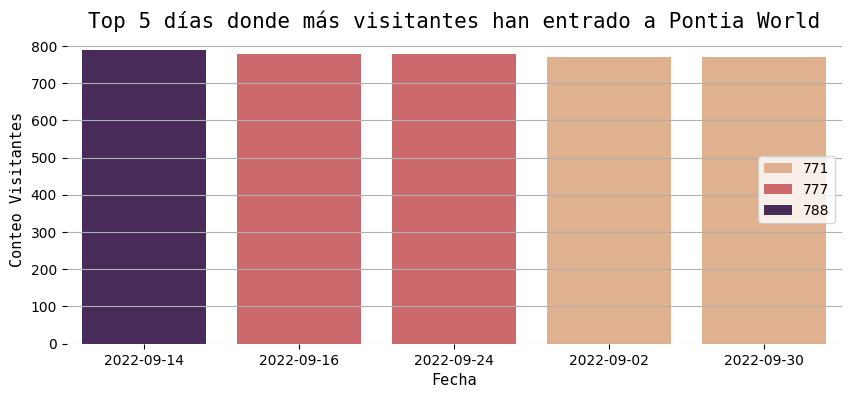

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(agrupados_visitantes, x="fecha_tiempo_recogida", y= "visitantes_por_dia", hue="visitantes_por_dia", palette = "flare")
plt.title('Top 5 días donde más visitantes han entrado a Pontia World', fontsize=15, fontfamily="monospace")
plt.xlabel('Fecha', fontsize=11, fontfamily="monospace")
plt.ylabel('Conteo Visitantes', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.box(False)
plt.legend(loc='right')
plt.show()


##KPI 4: ¿A qué horas del día sube más gente en la atracción más visitada?

In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
atraccion_popular = pd.DataFrame(df_principal_atracciones.groupby("atraccion")["id_visitante"].count().reset_index(name="visitantes_por_atraccion").sort_values(by="visitantes_por_atraccion", ascending=False)[:1])
atraccion_popular

atraccion  visitantes_por_atraccion
34  Vuelta al Mundo en 80 Días                       908

In [ ]:
tiempo_atraccion_popular = df_principal_atracciones.loc[df_principal_atracciones["atraccion"].isin(atraccion_popular["atraccion"].values)]
tiempo_atraccion_popular.drop(["t_id","duracion","valoracion","tiempo_espera"], axis = 1, inplace = True)

In [ ]:
visitantes_atraccion_popular = pd.DataFrame(tiempo_atraccion_popular.groupby(["atraccion","tiempo_recogida_hora"])["id_visitante"].count().reset_index(name="visitantes_por_hora").sort_values(by="visitantes_por_hora", ascending=False)[:5])
visitantes_atraccion_popular

atraccion  tiempo_recogida_hora  visitantes_por_hora
0   Vuelta al Mundo en 80 Días                     1                   71
14  Vuelta al Mundo en 80 Días                    15                   55
5   Vuelta al Mundo en 80 Días                     6                   46
9   Vuelta al Mundo en 80 Días                    10                   45
8   Vuelta al Mundo en 80 Días                     9                   43

Como se puede observar, la atracción más visitada es la Vuelta al Mundo en 80 Días, la cual han visitado un total de 908 veces. Dentro de esta atracción, las cinco horas en las que se ha subido más gente han sido, en orden descendente: la 1:00 recibiendo un total de 71 visitantes, las 15:00 recibiendo un total de 55 visitantes, las 6:00 recibiendo un total de 46 visitantes, las 10:00 horas que recibieron 45 visitantes, y por último las 9:00 que recibieron 43.

##KPI 5: ¿Cuáles son los 5 visitantes que se han subido en más atracciones y en cuántas?

In [ ]:
visitantes_mas_atracciones = pd.DataFrame(df_tabla_principal.groupby(["id_visitante"])["atraccion_code"].count().reset_index(name="total_atracciones").sort_values(by="total_atracciones", ascending=False)[:5])
visitantes_mas_atracciones

id_visitante  total_atracciones
512           146                 46
1147           43                 42
1158           44                 41
668           160                 41
1019          314                 41

##KPI 6: ¿Cuáles son los 5 visitantes que se han subido en menos atracciones y en cuántas?

In [ ]:
visitantes_menos_atracciones = pd.DataFrame(df_tabla_principal.groupby(["id_visitante"])["atraccion_code"].count().reset_index(name="total_atracciones").sort_values(by="total_atracciones")[:5])
visitantes_menos_atracciones

id_visitante  total_atracciones
867         1787                  0
659         1592                  1
866         1786                  1
865         1785                  1
864         1784                  1

##KPI 7: ¿Cuál es la recaudación total del parque de atracciones?

In [ ]:
ingresos_brutos = round(df_tabla_principal["coste"].sum(),2)
print(f'Los ingresos brutos de Pontia World en Septiembre de 2022 han sido de €{ingresos_brutos}')

Los ingresos brutos de Pontia World en Septiembre de 2022 han sido de €524169.36


##KPI 8: Por cada atracción, ¿cuál ha sido la emoción más frecuente?

In [ ]:
df_atracciones_emociones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner') \
                 .merge(df_emocion_maestra_def, on='emocion_code', how = 'inner')

In [ ]:
emocion_atraccion = pd.DataFrame(df_atracciones_emociones.groupby(["atraccion","emocion"])["emocion"].count().reset_index(name="conteo_emocion").sort_values(by=['atraccion', 'emocion']))
emocion_atraccion

atraccion   emocion  conteo_emocion
0               Araña Saltarina     angry             121
1               Araña Saltarina   disgust              15
2               Araña Saltarina      fear             127
3               Araña Saltarina     happy             197
4               Araña Saltarina   neutral             149
..                          ...       ...             ...
240  Vuelta al Mundo en 80 Días      fear             133
241  Vuelta al Mundo en 80 Días     happy             246
242  Vuelta al Mundo en 80 Días   neutral             166
243  Vuelta al Mundo en 80 Días       sad             155
244  Vuelta al Mundo en 80 Días  surprise              83

[245 rows x 3 columns]

In [ ]:
emocion_atraccion_unica = emocion_atraccion.loc[emocion_atraccion.groupby('atraccion')['conteo_emocion'].idxmax()].reset_index().sort_values(by="conteo_emocion", ascending = False)
emocion_atraccion_unica.drop("index", axis = 1, inplace = True)

In [ ]:
emocion_atraccion_unica

atraccion emocion  conteo_emocion
34    Vuelta al Mundo en 80 Días   happy             246
9                 Circuito Veloz   happy             237
29         Tobogán del Arco Iris   happy             236
15          Fiesta de los Dulces   happy             235
20       Montaña Rusa de la Luna   happy             234
11            Cohetes Galácticos   happy             231
10             Circus Fantástico   happy             223
28              Tirolina Extrema   happy             222
19             Mansión Embrujada   happy             220
1            Aventuras Acuáticas   happy             219
12                Cúpula Estelar   happy             219
18           Laberinto de Sueños   happy             219
23           Rueda de la Fortuna   happy             217
25                Safari Salvaje   happy             217
21          Montaña del Misterio   happy             215
16              Gran Caída Libre   happy             215
33                  Vuelo Mágico   happy             213
2        Barco Pirata Misterioso   happy             213
27         Simulador Espacial 3D   happy             212
17           Jardín de las Hadas   happy             212
5     Carros Chocones Divertidos   happy             211
22       Mundo de las Maravillas   happy             210
4         Carrera de Autos Locos   happy             210
24             Rápido del Trueno   happy             208
26               Selva Encantada   happy             208
6             Carrusel Encantado   happy             207
13                Dragón Volador   happy             206
14         Espejos de la Risueña   happy             203
32  Viaje al Centro de la Tierra   happy             203
30           Torbellino Espacial   happy             199
3          Caravana de Aventuras   happy             198
0                Araña Saltarina   happy             197
31               Tren del Terror   happy             193
7              Cascada Encantada   happy             192
8            Cine 4D Emocionante   happy             189

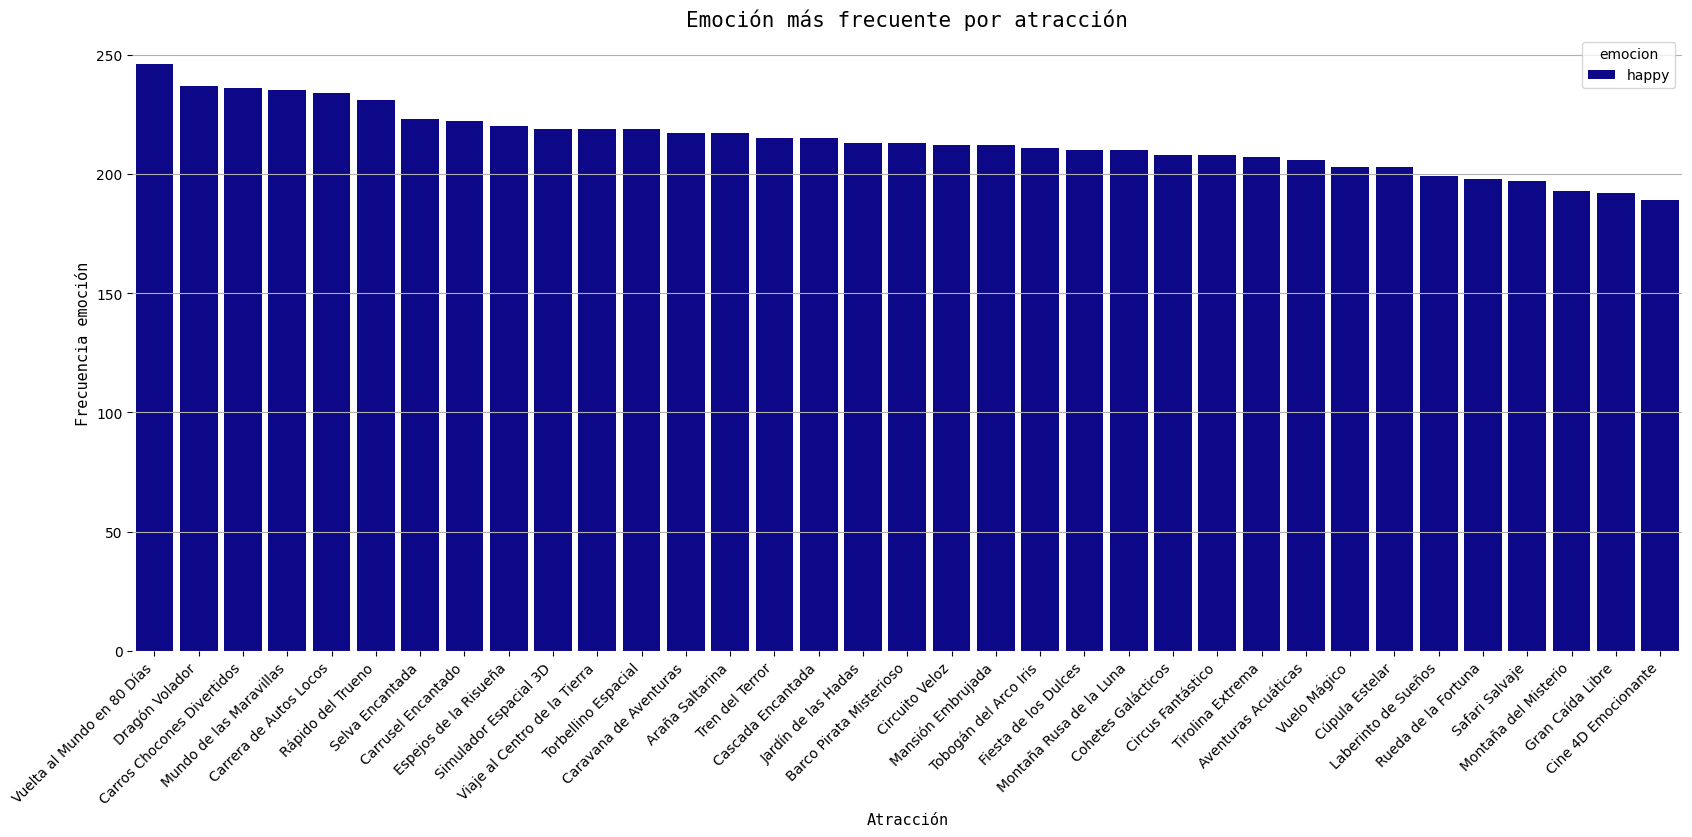

In [ ]:
plt.figure(figsize=(20, 8))
#Generamos lista de 34 colores
colores2 = plt.cm.plasma(np.linspace(0, 1, 34))
sns.barplot(x=emocion_atraccion_unica["atraccion"].value_counts().index,
            y=emocion_atraccion_unica["conteo_emocion"],
            hue=emocion_atraccion_unica["emocion"],
            palette=colores2,
            saturation=1.15,
            width=0.85)
plt.title('Emoción más frecuente por atracción', fontsize=15, fontfamily="monospace")
plt.xlabel('Atracción', fontsize=11, fontfamily="monospace")
plt.ylabel('Frecuencia emoción', fontsize=11, fontfamily="monospace")
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.box(False)
plt.show();

##KPI 9: ¿Cuál es la media de valoración de cada atracción?

In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
valoracion_media_atraccion = df_principal_atracciones.groupby("atraccion")["valoracion"].mean().round(1).reset_index(name='media_valoracion')

In [ ]:
valoracion_media_atraccion

atraccion  media_valoracion
0                Araña Saltarina               5.1
1            Aventuras Acuáticas               5.0
2        Barco Pirata Misterioso               5.0
3          Caravana de Aventuras               5.2
4         Carrera de Autos Locos               4.8
5     Carros Chocones Divertidos               4.8
6             Carrusel Encantado               5.1
7              Cascada Encantada               4.9
8            Cine 4D Emocionante               4.9
9                 Circuito Veloz               5.0
10             Circus Fantástico               5.0
11            Cohetes Galácticos               5.0
12                Cúpula Estelar               5.0
13                Dragón Volador               5.0
14         Espejos de la Risueña               5.1
15          Fiesta de los Dulces               5.0
16              Gran Caída Libre               5.0
17           Jardín de las Hadas               5.0
18           Laberinto de Sueños               4.9
19             Mansión Embrujada               4.9
20       Montaña Rusa de la Luna               5.2
21          Montaña del Misterio               5.1
22       Mundo de las Maravillas               4.9
23           Rueda de la Fortuna               4.8
24             Rápido del Trueno               5.1
25                Safari Salvaje               4.9
26               Selva Encantada               4.9
27         Simulador Espacial 3D               4.9
28              Tirolina Extrema               5.1
29         Tobogán del Arco Iris               5.1
30           Torbellino Espacial               5.0
31               Tren del Terror               5.1
32  Viaje al Centro de la Tierra               4.9
33                  Vuelo Mágico               5.1
34    Vuelta al Mundo en 80 Días               5.0

##KPI 10: ¿De dónde son los 3 visitantes que peores valoraciones de media han puesto (mercado doméstico)?

In [ ]:
df_principal_procedencia = pd.merge(df_tabla_principal, df_procedencia_maestra_def, on='procedencia_code', how = 'inner')

In [ ]:
visitantes_media_valoracion = df_principal_procedencia.groupby(["id_visitante", "procedencia"])["valoracion"].mean().round(1).reset_index(name='media_valoracion')
peor_valoracion_media_español = visitantes_media_valoracion.loc[visitantes_media_valoracion["procedencia"] == "España"].sort_values(by="media_valoracion", ascending=True)[:3]

In [ ]:
peor_valoracion_media_español

id_visitante procedencia  media_valoracion
819         1739      España               0.0
682         1612      España               0.0
729         1655      España               1.0

##KPI 11: ¿De dónde son los 3 visitantes que peores valoraciones de media han puesto (mercado internacional)?

In [ ]:
df_principal_procedencia = pd.merge(df_tabla_principal, df_procedencia_maestra_def, on='procedencia_code', how = 'inner')

In [ ]:
visitantes_media_valoracion = df_principal_procedencia.groupby(["id_visitante", "procedencia"])["valoracion"].mean().round(1).reset_index(name='media_valoracion')
peor_valoracion_media_internacional = visitantes_media_valoracion.loc[visitantes_media_valoracion["procedencia"] != "España"].sort_values(by="media_valoracion", ascending=True)[:3]

In [ ]:
peor_valoracion_media_internacional

id_visitante procedencia  media_valoracion
808         1729     Jamaica               0.0
866         1786   Filipinas               0.0
361         1323     Jamaica               0.5

##KPI 12: ¿Cuál es la antelación máxima con la que se adquiere cada tipo de entrada?

In [ ]:
df_principal_entrada = pd.merge(df_tabla_principal, df_tipo_entrada_maestra_def, on='entrada_code', how = 'inner')

In [ ]:
entrada_antelacion_maxima = df_principal_entrada.groupby("tipo_entrada")["antelacion_compra"].max().reset_index(name="antelacion_maxima")

In [ ]:
entrada_antelacion_maxima

tipo_entrada  antelacion_maxima
0    Entrada Familiar                364
1  Entrada Individual                364
2    Entrada Infantil                364
3         Paquete VIP                364
4          Pase Anual                364
5         Pase Rápido                  3

##KPI 13: ¿Qué día y hora del mes se producen los tiempos de espera máximos en cada atracción?

In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
espera_max_por_atraccion = df_principal_atracciones.groupby("atraccion")["tiempo_espera"].max().reset_index(name="tiempo_espera_maximo")
indices_maximos = df_principal_atracciones.groupby("atraccion")["tiempo_espera"].idxmax()
filas_maximas = df_principal_atracciones.loc[indices_maximos, ["atraccion", "fecha_tiempo_recogida", "tiempo_recogida_hora"]]

In [ ]:
espera_max_por_atraccion_hora_fecha = espera_max_por_atraccion.merge(filas_maximas, on="atraccion")
espera_max_por_atraccion_hora_fecha

atraccion  tiempo_espera_maximo fecha_tiempo_recogida  \
0                Araña Saltarina                    27            2022-09-22   
1            Aventuras Acuáticas                    25            2022-09-05   
2        Barco Pirata Misterioso                    24            2022-09-17   
3          Caravana de Aventuras                    25            2022-09-07   
4         Carrera de Autos Locos                    26            2022-09-28   
5     Carros Chocones Divertidos                    26            2022-09-02   
6             Carrusel Encantado                    27            2022-09-06   
7              Cascada Encantada                    24            2022-09-27   
8            Cine 4D Emocionante                    25            2022-09-01   
9                 Circuito Veloz                    24            2022-09-09   
10             Circus Fantástico                    26            2022-09-01   
11            Cohetes Galácticos                    24            2022-09-19   
12                Cúpula Estelar                    25            2022-09-15   
13                Dragón Volador                    25            2022-09-24   
14         Espejos de la Risueña                    24            2022-09-08   
15          Fiesta de los Dulces                    25            2022-09-30   
16              Gran Caída Libre                    24            2022-09-15   
17           Jardín de las Hadas                    25            2022-09-22   
18           Laberinto de Sueños                    24            2022-09-30   
19             Mansión Embrujada                    23            2022-09-15   
20       Montaña Rusa de la Luna                    27            2022-09-18   
21          Montaña del Misterio                    24            2022-09-17   
22       Mundo de las Maravillas                    23            2022-09-05   
23           Rueda de la Fortuna                    25            2022-09-30   
24             Rápido del Trueno                    25            2022-09-19   
25                Safari Salvaje                    28            2022-09-10   
26               Selva Encantada                    26            2022-09-29   
27         Simulador Espacial 3D                    27            2022-09-28   
28              Tirolina Extrema                    24            2022-09-07   
29         Tobogán del Arco Iris                    25            2022-09-18   
30           Torbellino Espacial                    24            2022-09-22   
31               Tren del Terror                    25            2022-09-26   
32  Viaje al Centro de la Tierra                    27            2022-09-23   
33                  Vuelo Mágico                    25            2022-09-23   
34    Vuelta al Mundo en 80 Días                    22            2022-09-29   

    tiempo_recogida_hora  
0                     10  
1                      2  
2                      1  
3                     23  
4                      7  
5                     16  
6                     17  
7                     22  
8                     12  
9                      6  
10                    18  
11                    17  
12                     9  
13                     1  
14                    17  
15                     4  
16                    16  
17                    15  
18                    13  
19                    18  
20                    10  
21                    13  
22                    14  
23                    21  
24                    13  
25                    14  
26                    15  
27                     1  
28                    16  
29                    11  
30                     8  
31                    22  
32                    13  
33                    12  
34                    13

##KPI 14: Para cada cliente, calcular el tiempo que no ha estado esperando durante su estancia en el parque.

In [ ]:
visitante_espera = df_tabla_principal.groupby("id_visitante")["duracion", "tiempo_espera"].sum().reset_index()

In [ ]:
visitante_espera

id_visitante  duracion  tiempo_espera
0               1     10430            352
1              10     10242            344
2             100      9316            325
3            1000      6712            205
4            1001      6135            217
...           ...       ...            ...
1774          995      4124            165
1775          996      7226            223
1776          997      5734            178
1777          998      7175            200
1778          999      4737            154

[1779 rows x 3 columns]

In [ ]:
visitante_espera["visitante_no_espera"] = visitante_espera["duracion"] - visitante_espera["tiempo_espera"]

In [ ]:
visitante_espera

id_visitante  duracion  tiempo_espera  visitante_no_espera
0               1     10430            352                10078
1              10     10242            344                 9898
2             100      9316            325                 8991
3            1000      6712            205                 6507
4            1001      6135            217                 5918
...           ...       ...            ...                  ...
1774          995      4124            165                 3959
1775          996      7226            223                 7003
1776          997      5734            178                 5556
1777          998      7175            200                 6975
1778          999      4737            154                 4583

[1779 rows x 4 columns]

##KPI 15: El tiempo total de espera de las 3 atracciones mejor valoradas.




In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
espera_atracciones = df_principal_atracciones.groupby("atraccion")["valoracion"].mean().reset_index(name='media_valoracion')
mejores_atracciones = espera_atracciones.sort_values(by="media_valoracion", ascending=False)[:3]

In [ ]:
atracciones_espera = mejores_atracciones.merge(df_principal_atracciones, on="atraccion")
tiempo_total_espera_mejores_atracciones = atracciones_espera.groupby("atraccion").agg({"tiempo_espera": "sum", "media_valoracion": "first"}).reset_index().sort_values(by="media_valoracion", ascending=False)

In [ ]:
tiempo_total_espera_mejores_atracciones

atraccion  tiempo_espera  media_valoracion
2  Montaña Rusa de la Luna          11281          5.173378
0    Caravana de Aventuras          10418          5.156213
1       Carrusel Encantado          10613          5.127711

##KPI 16: El tiempo total de espera de las 3 atracciones peor valoradas.


In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
espera_atracciones = df_principal_atracciones.groupby("atraccion")["valoracion"].mean().reset_index(name='media_valoracion')
peores_atracciones = espera_atracciones.sort_values(by="media_valoracion")[:3]

In [ ]:
atracciones_espera_2 = peores_atracciones.merge(df_principal_atracciones, on="atraccion")
tiempo_total_espera_peores_atracciones = atracciones_espera_2.groupby("atraccion").agg({"tiempo_espera": "sum", "media_valoracion": "first"}).reset_index().sort_values(by="media_valoracion")

In [ ]:
tiempo_total_espera_peores_atracciones

atraccion  tiempo_espera  media_valoracion
2         Rueda de la Fortuna          10907          4.763279
0      Carrera de Autos Locos          10539          4.841478
1  Carros Chocones Divertidos          11142          4.848624

##KPI 17: De los visitantes que compraron la entrada en taquilla, ¿cuál fue la atracción a la que más se subieron?

In [ ]:
df_principal_atracciones = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner')

In [ ]:
entrada_taquilla = df_principal_atracciones[df_principal_atracciones["antelacion_compra"] == 0]
entrada_taquilla.head()

t_id  tiempo_espera  atraccion_code  duracion  \
0   Training_10118481.jpg              5              21       308   
13  Training_64065407.jpg             13              21       426   
17  Training_35195553.jpg             10              21       374   
20  Training_10899258.jpg              5              21       413   
28  Training_26384574.jpg             21              21       245   

    procedencia_code id_visitante      coste  antelacion_compra  entrada_code  \
0                 13            3  14.003708                  0             5   
13                13           21  18.967904                  0             3   
17                13           25  18.121271                  0             3   
20                13           29  19.150959                  0             4   
28                 3           35  17.642395                  0             3   

    valoracion  tiempo_recogida_hora fecha_tiempo_recogida  emocion_code  \
0            2                    10            2022-09-13             1   
13           6                     5            2022-09-22             4   
17           0                    14            2022-09-03             1   
20           2                     7            2022-09-30             1   
28          10                     2            2022-09-16             4   

                  atraccion  
0   Montaña Rusa de la Luna  
13  Montaña Rusa de la Luna  
17  Montaña Rusa de la Luna  
20  Montaña Rusa de la Luna  
28  Montaña Rusa de la Luna

In [ ]:
atraccion_compra_taquilla = entrada_taquilla.groupby("atraccion").size().sort_values(ascending=False).index[0]

In [ ]:
print(f'La atracción en la que se subieron más visitantes que compraron las entradas en taquilla fue la {atraccion_compra_taquilla}')

La atracción en la que se subieron más visitantes que compraron las entradas en taquilla fue la Tirolina Extrema


##KPI 18: ¿Cuál es la atracción que tiene más número de visitantes con entrada de tipo fast-pass?

In [ ]:
df_atracciones_entradas = pd.merge(df_tabla_principal, df_atraccion_maestra_def, on='atraccion_code', how = 'inner') \
                 .merge(df_tipo_entrada_maestra_def, on='entrada_code', how = 'inner')

In [ ]:
entrada_rapida = df_atracciones_entradas[df_atracciones_entradas["tipo_entrada"] == "Pase Rápido"]
entrada_rapida.head()

t_id  tiempo_espera  atraccion_code  duracion  \
28718    Training_19104128.jpg             13              21       262   
28719    Training_60943669.jpg             18              21       429   
28720    Training_59757551.jpg              5              21       269   
28721  PublicTest_68126601.jpg             13              21       300   
28722    Training_35915103.jpg             13              21       414   

       procedencia_code id_visitante      coste  antelacion_compra  \
28718                13           57  13.909586                  2   
28719                13           69  10.274395                  0   
28720                13           73  10.364729                  2   
28721                13           77  22.904670                  0   
28722                13           81  13.303775                  0   

       entrada_code  valoracion  tiempo_recogida_hora fecha_tiempo_recogida  \
28718             6           8                     3            2022-09-07   
28719             6           6                     5            2022-09-07   
28720             6           9                     1            2022-09-15   
28721             6           1                    16            2022-09-12   
28722             6           5                    22            2022-09-14   

       emocion_code                atraccion tipo_entrada  
28718             1  Montaña Rusa de la Luna  Pase Rápido  
28719             4  Montaña Rusa de la Luna  Pase Rápido  
28720             4  Montaña Rusa de la Luna  Pase Rápido  
28721             3  Montaña Rusa de la Luna  Pase Rápido  
28722             1  Montaña Rusa de la Luna  Pase Rápido

In [ ]:
atraccion_entrada_rapida = entrada_rapida.groupby("atraccion").size().sort_values(ascending=False).index[0]

In [ ]:
print(f'La atracción que tiene más visitantes que compraron la entrada fast-pass es la {atraccion_entrada_rapida}')

La atracción que tiene más visitantes que compraron la entrada fast-pass es la Rueda de la Fortuna


##KPI 19: ¿Cuál es la nacionalidad que más acude al parque?

In [ ]:
df_principal_procedencia = pd.merge(df_tabla_principal, df_procedencia_maestra_def, on='procedencia_code', how = 'inner')

In [ ]:
nacionalidad_destacada = df_principal_procedencia.groupby("procedencia").size().sort_values(ascending=False).index[0]

In [ ]:
print(f'La nacionalidad que más acude al parque es {nacionalidad_destacada}')

La nacionalidad que más acude al parque es España


##KPI 20: De las distintas nacionalidades que han visitado el parque, ¿cuál ha sido la menos frecuente?

In [ ]:
df_principal_procedencia = pd.merge(df_tabla_principal, df_procedencia_maestra_def, on='procedencia_code', how = 'inner')

In [ ]:
nacionalidad_menos_frecuente = df_principal_procedencia.groupby("procedencia").size().sort_values().index[0]

In [ ]:
print(f'De las nacionalidades que han visitado el parque, le menos frecuente es {nacionalidad_menos_frecuente}')

De las nacionalidades que han visitado el parque, le menos frecuente es Venezuela


##KPI 21: ¿Cuál es el tipo de entrada más vendida, y cuál es su precio medio?

In [ ]:
df_principal_entradas = pd.merge(df_tabla_principal, df_tipo_entrada_maestra_def, on='entrada_code', how = 'inner')

In [ ]:
entrada_mas_vendida = df_principal_entradas.groupby("tipo_entrada").size().sort_values(ascending = False).index[0]

In [ ]:
entrada_mas_vendida

'Entrada Familiar'

In [ ]:
precio_medio_pase_rapido = df_principal_entradas[df_principal_entradas["tipo_entrada"] == "Entrada Familiar"]["coste"].mean().round(2)

In [ ]:
precio_medio_pase_rapido

17.08

In [ ]:
print(f'El tipo de entrada más vendida es la {entrada_mas_vendida} y su precio medio es {precio_medio_pase_rapido}')

El tipo de entrada más vendida es la Entrada Familiar y su precio medio es 17.08
